# CAP Sleep Dataset: Exploratory Data Analysis

### Tasks included:
- Reading and organising annotations from the text file
- Reading and exploring edf (data file)
- Reading and exploring edf.st (annotation file) - [Not done]
- Saving annotations in csv
- Calculate transition matrices

## Imports and system info

In [1496]:
import HumachLab_Global 
HumachLab_Global.get_system_info()


List of OS platforms and codes
___________________________________________
0 Darwin
1 Windows
2 Linux
===> "1 - Windows" OS is detected.

Processor (CPU) details: 
___________________________________________
{'python_version': '3.7.10.final.0 (64 bit)', 'cpuinfo_version': [8, 0, 0], 'cpuinfo_version_string': '8.0.0', 'arch': 'X86_64', 'bits': 64, 'count': 40, 'arch_string_raw': 'AMD64', 'vendor_id_raw': 'GenuineIntel', 'brand_raw': 'Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz', 'hz_advertised_friendly': '2.2000 GHz', 'hz_actual_friendly': '2.2010 GHz', 'hz_advertised': [2200000000, 0], 'hz_actual': [2201000000, 0], 'l2_cache_size': 2621440, 'stepping': 1, 'model': 79, 'family': 6, 'l3_cache_size': 26214400, 'flags': ['3dnow', '3dnowprefetch', 'abm', 'acpi', 'adx', 'aes', 'apic', 'avx', 'avx2', 'bmi1', 'bmi2', 'clflush', 'cmov', 'cx16', 'cx8', 'dca', 'de', 'ds_cpl', 'dtes64', 'dts', 'erms', 'est', 'f16c', 'fma', 'fpu', 'fxsr', 'hle', 'ht', 'ia64', 'intel_pt', 'invpcid', 'lahf_lm', 'mca',

(1,
 'Windows',
 {'brand_raw': 'Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz',
  'arch_string_raw': 'AMD64',
  'arch': 'X86_64',
  'count': 40,
  'python_version': '3.7.10.final.0 (64 bit)',
  'CPU_usage': 19.8,
  'RAM_usage': 68.7,
  'Total_RAM': 127.9,
  'Used_RAM': 87.9,
  'Available_RAM': 40.0},
 [1, 2, 3, 4, 5, 6],
 1)

In [1497]:
'''
Importing necessary modules
'''

import os
import sys
import datetime

print(os.getcwd())
os.chdir(os.getcwd())
print(f"{os.getcwd()}\HumachLab")
sys.path.append(f"{os.getcwd()}\HumachLab")
sys.path.insert(0, os.path.abspath('./HumachLab'))

import re
import pickle
import json

import copy
from pprint import pprint

import glob

import math
import numbers

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc, rcParams
%matplotlib inline
import seaborn as sns

import HumachLab_Global
from HumachLab import * 
# from HumachLab.HumachLab_Global import *
# import HumachLab_Global
HumachLab_Global.get_system_info()

import mne

# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (20,6)

C:\Users\aliem\OneDrive - Deakin University\_MyResearch\PhD_Research\HML_IHC_Sleep_Data_Analysis
C:\Users\aliem\OneDrive - Deakin University\_MyResearch\PhD_Research\HML_IHC_Sleep_Data_Analysis\HumachLab

List of OS platforms and codes
___________________________________________
0 Darwin
1 Windows
2 Linux
===> "1 - Windows" OS is detected.

Processor (CPU) details: 
___________________________________________
{'python_version': '3.7.10.final.0 (64 bit)', 'cpuinfo_version': [8, 0, 0], 'cpuinfo_version_string': '8.0.0', 'arch': 'X86_64', 'bits': 64, 'count': 40, 'arch_string_raw': 'AMD64', 'vendor_id_raw': 'GenuineIntel', 'brand_raw': 'Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz', 'hz_advertised_friendly': '2.2000 GHz', 'hz_actual_friendly': '2.2010 GHz', 'hz_advertised': [2200000000, 0], 'hz_actual': [2201000000, 0], 'l2_cache_size': 2621440, 'stepping': 1, 'model': 79, 'family': 6, 'l3_cache_size': 26214400, 'flags': ['3dnow', '3dnowprefetch', 'abm', 'acpi', 'adx', 'aes', 'apic', 'avx', 

## Get directory list

In [1498]:
'''
Explore the contents/files in the directory
'''

def get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None):
    '''
    directory: valid path string, path_type: p_file|p_dir, containes: string, extension: valid string file extension 
    '''
    os_path = os.path
    list_of_paths = []
        
    path_keywords = "*"
    if containes:
        path_keywords = f"{path_keywords}{containes}*"
    
    if extension:
        path_keywords = f"{path_keywords}.{extension}"
        
    complete_path = f"{directory}/{path_keywords}"
    print(f"============> {path_keywords}, {path_type}, {complete_path}")
    
    all_paths = glob.glob(complete_path) 
    all_temp_paths = None
    list_of_paths = None
    
    if path_type:
        if path_type=="p_file":
            all_temp_paths = [path.replace("\\", "/") for path in all_paths if (os_path.exists(path) and os_path.isfile(path))]
        if path_type=="p_dir":
            all_temp_paths = [path.replace("\\", "/") for path in all_paths if (os_path.exists(path) and os_path.isdir(path))]   
    else:
        all_temp_paths = [path.replace("\\", "/") for path in all_paths]
        
    if exclude:
        # print(all_temp_paths)
        # print(len(all_temp_paths), exclude)
        # list_of_paths = [path for path in all_temp_paths for ex in exclude if ex not in path]
        # list_of_paths = [path for ex in exclude for path in all_temp_paths if ex not in path]
        list_of_paths = [path for path in all_temp_paths if not any((ex in path) for ex in exclude)]
        # list_of_paths = [path for ex in exclude if any(ex not in path for path in all_temp_paths)]
        # any(substring in string for substring in substring_list)
        # print(len(list_of_paths))
    else:
        list_of_paths = all_temp_paths.copy()
    
    return list_of_paths

In [1561]:
dataset_directory = "D:/aliem/SDRC_Dataset" 
prob_cal_from_all = True 
result_subdirectory = ['STP_From_Same_Stages', 'STP_From_All_Stages'][int(prob_cal_from_all)]
result_directory = f"./Results/SDRC/{result_subdirectory}" 
dataset_subdirectory = "/Metadata" 
trimW_states = True #run the normal or the trim version of W->W for leading/trailing W->W sequences 
exclude_contents_in_dataset_directory = ["ANNOTATORS", "CAP-sequence", "CAP.m", "gender-age", "SHA256SUMS", "ScoringReader", "DATASET_CHANGELOG", "RECORDS"]
exclude_contents_in_result_directory = ["ANNOTATORS", "CAP-sequence", "CAP.m", "Demography", "gender-age", "SHA256SUMS", "all_annotations", "annot_sequence", "transition_sequence", "hypno", "DATASET_CHANGELOG"]
# sleep_stage_labels = ['W', 'S1', 'S2', 'S3', 'S4', 'REM', 'MT', 'A']
# sleep_stage_labels_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'REM':5, 'MT':6, 'A':7}
# sleep_stage_names_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'R':5, 'MT':6, 'A':7}
tran_step = 3 

sleep_stage_labels = ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
sleep_stage_labels_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'REM':5}
sleep_stage_names_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'R':5}
list_of_paths = None 

In [1375]:
directory = dataset_directory
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_file", containes=None, extension=None, exclude=None) 
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type="p_dir", containes=None, extension=None, exclude=None) 
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes="nfle", extension=None, exclude=None) 
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension="edf", exclude=None) 
list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=exclude_contents_in_dataset_directory) 
# list_of_paths = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension=None, exclude=None) 
# pprint(list_of_paths)
list_of_paths

============> *, None, D:/aliem/SDRC/*


['D:/aliem/SDRC/Demography.csv',
 'D:/aliem/SDRC/Demography_Details.csv',
 'D:/aliem/SDRC/Demography_Details2.csv',
 'D:/aliem/SDRC/Demography_Details3.csv',
 'D:/aliem/SDRC/ins1101.edf',
 'D:/aliem/SDRC/ins1102.edf',
 'D:/aliem/SDRC/ins1103.edf',
 'D:/aliem/SDRC/ins1104.edf',
 'D:/aliem/SDRC/ins1105.edf',
 'D:/aliem/SDRC/ins1106.edf',
 'D:/aliem/SDRC/ins1107.edf',
 'D:/aliem/SDRC/ins1108.edf',
 'D:/aliem/SDRC/ins1109.edf',
 'D:/aliem/SDRC/ins1110.edf',
 'D:/aliem/SDRC/ins1111.edf',
 'D:/aliem/SDRC/Matlab_Codes.rar',
 'D:/aliem/SDRC/Metadata',
 'D:/aliem/SDRC/Metadata - Old1',
 'D:/aliem/SDRC/n1101.edf',
 'D:/aliem/SDRC/n1102.edf',
 'D:/aliem/SDRC/n1103.edf',
 'D:/aliem/SDRC/n1104.edf',
 'D:/aliem/SDRC/n1105.edf',
 'D:/aliem/SDRC/n1106.edf',
 'D:/aliem/SDRC/n1107.edf',
 'D:/aliem/SDRC/n1108.edf',
 'D:/aliem/SDRC/n1109.edf',
 'D:/aliem/SDRC/n1110.edf',
 'D:/aliem/SDRC/n1111.edf',
 'D:/aliem/SDRC/Normal_Subject_01.edf',
 'D:/aliem/SDRC/Normal_Subject_02.edf',
 'D:/aliem/SDRC/Normal_Subje

## Sample data exploration

### Explore data EDF

In [1376]:
# directory = dataset_directory
# list_of_edfs = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension="edf", exclude=exclude_contents_in_dataset_directory) 
# list_of_edfs

In [1377]:
# test_edf = list_of_edfs[0]
# raw_signal_data = mne.io.read_raw_edf(test_edf)
# raw_signal_data

In [1378]:
# raw_signal_data_info = raw_signal_data.__dict__
# raw_signal_data_info

In [1379]:
# edf_signal_df = raw_signal_data.to_data_frame()
# edf_signal_df

### Explore annotation EDF.ST

In [1380]:
# directory = dataset_directory
# list_of_stedfs = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension="edf.st") 
# list_of_stedfs

In [1381]:
# test_stedf = list_of_stedfs[0]
# # test_stedf =  f"{dataset_directory}/brux1.st.edf"
# raw_annotation_data = mne.io.read_raw_edf(test_stedf)
# raw_annotation_data

In [1382]:
# raw_annotation_data_info = raw_annotation_data.__dict__
# raw_annotation_data_info

In [1383]:
# edf_annotation_df = raw_annotation_data.to_data_frame()
# edf_annotation_df

### Explore annotation TXT: Convert and save text annotation to csv

***
##### Changes made in the dataset (txt file annotation)
- brux1: Containes "REM" as "Sleep Stage" instead of "R", coz "R" has been used throughout other files, thus changed  
- n12: Contans "1S3" as "Sleep Stage", it's a mistake and should be "S3", thus changed
- n16: Containes a blank line at the end which couses problem, thus removed
***

In [1384]:
directory = dataset_directory+dataset_subdirectory
list_of_annot_txts = get_list_of_paths_from_a_directory(directory, path_type=None, containes=None, extension="txt", exclude=exclude_contents_in_dataset_directory) 
list_of_annot_txts

============> *.txt, None, D:/aliem/SDRC/Metadata/*.txt


['D:/aliem/SDRC/Metadata/ins1101.txt',
 'D:/aliem/SDRC/Metadata/ins1102.txt',
 'D:/aliem/SDRC/Metadata/ins1103.txt',
 'D:/aliem/SDRC/Metadata/ins1104.txt',
 'D:/aliem/SDRC/Metadata/ins1105.txt',
 'D:/aliem/SDRC/Metadata/ins1106.txt',
 'D:/aliem/SDRC/Metadata/ins1107.txt',
 'D:/aliem/SDRC/Metadata/ins1108.txt',
 'D:/aliem/SDRC/Metadata/ins1109.txt',
 'D:/aliem/SDRC/Metadata/ins1110.txt',
 'D:/aliem/SDRC/Metadata/ins1111.txt',
 'D:/aliem/SDRC/Metadata/n1101.txt',
 'D:/aliem/SDRC/Metadata/n1102.txt',
 'D:/aliem/SDRC/Metadata/n1103.txt',
 'D:/aliem/SDRC/Metadata/n1104.txt',
 'D:/aliem/SDRC/Metadata/n1105.txt',
 'D:/aliem/SDRC/Metadata/n1106.txt',
 'D:/aliem/SDRC/Metadata/n1107.txt',
 'D:/aliem/SDRC/Metadata/n1108.txt',
 'D:/aliem/SDRC/Metadata/n1109.txt',
 'D:/aliem/SDRC/Metadata/n1110.txt',
 'D:/aliem/SDRC/Metadata/n1111.txt']

In [1385]:
# list_of_annot_txts[0]

In [1386]:
def parse_annotation_from_text_to_CSV(annot_txt, annot_directory, extras=False, show=False):
    print(f"Annotation conversion for file: {annot_txt} \n")
    annot_f = annot_txt.split('.')[-2]
    file_name = annot_f.split("/")[-1] 
    annot_csv = f"{annot_directory}/{file_name}_annot.csv"
    annot_csv

    contents = ""
    less_cnt = 0
    
    with open(annot_txt, "r") as in_file, open(annot_csv, "w") as out_file:
        line = in_file.readline() 
        line_cnt = 0 
        while line:
            line = in_file.readline()
            line_cnt += 1 
            if line_cnt<7:
                continue 
            sem_cnt = line.count(";")
#             print('NNNNN ', line, sem_cnt)
            # if sem_cnt!=(5-less_cnt):
            if sem_cnt!=1:
                continue
#             line = line.replace("; A", "; ART")
#             line = line.replace(";A", "; ART")
            line = line.replace(";", ",")
            
            arr = [it.strip() for it in line.split(",")] 
            # File_Name	Category	Subject_ID	Sleep_Stage	Position	Time	Event	Duration	Location	Event_Type	Event_Level	Signal_Type	Channel 
            # 'Unknown' 
            if ("A" in arr) or ("ART" in arr):
                first_line = "File_Name,Category,Subject_ID,Sleep_Stage,Position,Time,Event,Duration,Location,Event_Type,Event_Level,Signal_Type,Channel\n" 
#                 print(first_line)
                contents += first_line 
                writer = out_file.writelines(first_line)
                    
            match = re.match(r"([a-z]+)([0-9]+)", file_name, re.I)
            if match:
                items = match.groups()
            arr.insert(0, items[1])
            arr.insert(0, items[0])
            arr.insert(0, file_name)
            
            ### Adding new columns 
            slp_val = arr[5] 
            arr.pop(4) 
            arr.insert(3, arr[4]) 
            full_type_stg = 'ART' if slp_val=='A' else 'SLEEP'
            arr[3] = full_type_stg if slp_val=='A' else arr[3] 
            arr[3] = 'REM' if slp_val=='R' else arr[3] 
            arr.pop() 
            arr.insert(4, 'Unknown') 
            arr.append(f'{full_type_stg}-{slp_val}')
            arr.append(str(30))
            arr.append('Unknown')
            arr.append(full_type_stg)
            arr.append(slp_val)
            arr.append('Unknown')
            arr.append('Unknown')
            
            
            #print("==->", arr)
            # Newly added
            new_cols = [col[:(col.index("["))-1] if "[" in col else col.replace(" ", "_") for col in arr] 
#             print("=====>", arr, new_cols, line)
            line = ",".join(new_cols) 
            line = line+'\n'
            #print("===>", line)
            contents += line
            writer = out_file.writelines(line)
    if show:
        print(contents)
    print(f"Annotation saved to file: {annot_csv} \n")

# annot_directory = f"{result_directory}/Annotations"
# annot_txt = list_of_annot_txts[0]
# parse_annotation_from_text_to_CSV(annot_txt, annot_directory, show=True)

In [1387]:
# annot_directory = f"{result_directory}/Annotations"
# annot_txt = list_of_annot_txts[0]
# annot_txt = list_of_annot_txts[7]
# annot_txt = list_of_annot_txts[18]
# parse_annotation_from_text_to_CSV(annot_txt, annot_directory, extras=True, show=True)

In [1388]:
def parse_all_annotation_from_text_to_CSV(list_of_annot_txts, annot_directory, extras=False, show=False):
    for annot_txt in list_of_annot_txts:
        parse_annotation_from_text_to_CSV(annot_txt, annot_directory, extras=extras, show=show)
#         break 
    
annot_directory = f"{result_directory}/Annotations"
parse_all_annotation_from_text_to_CSV(list_of_annot_txts, annot_directory, extras=True, show=False)


Annotation conversion for file: D:/aliem/SDRC/Metadata/ins1101.txt 

Annotation saved to file: ./Results/SDRC/STP_From_Same_Stages/Annotations/ins1101_annot.csv 

Annotation conversion for file: D:/aliem/SDRC/Metadata/ins1102.txt 

Annotation saved to file: ./Results/SDRC/STP_From_Same_Stages/Annotations/ins1102_annot.csv 

Annotation conversion for file: D:/aliem/SDRC/Metadata/ins1103.txt 

Annotation saved to file: ./Results/SDRC/STP_From_Same_Stages/Annotations/ins1103_annot.csv 

Annotation conversion for file: D:/aliem/SDRC/Metadata/ins1104.txt 

Annotation saved to file: ./Results/SDRC/STP_From_Same_Stages/Annotations/ins1104_annot.csv 

Annotation conversion for file: D:/aliem/SDRC/Metadata/ins1105.txt 

Annotation saved to file: ./Results/SDRC/STP_From_Same_Stages/Annotations/ins1105_annot.csv 

Annotation conversion for file: D:/aliem/SDRC/Metadata/ins1106.txt 

Annotation saved to file: ./Results/SDRC/STP_From_Same_Stages/Annotations/ins1106_annot.csv 

Annotation conversion 

### Combine all annotations

##### Read annotation csv, draw & save hypnogram

In [1389]:
def split_array_based_on_same_stages(data, stepsize=0):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

In [1390]:
def trim_additional_leadingAndTrailing_Wake_stages(file_n, data_f): 
    print(f'Triming leading and trailing W for data shape: {data_f.shape} file: {file_n}')
    data_f
    sleep_stage_name_dict = {'W':'W', 'S1':'S', 'S2':'S', 'S3':'S', 'S4':'S', 'R':'S', 'REM':'S', 'MT':'S', 'ART':'S', 'A':'S'}
    sleep_stage_dict = {'W':0, 'S':1}

    data_f['Sleep_Stage'].replace(sleep_stage_name_dict, inplace=True)
    data_f['stgs'] = data_f['Sleep_Stage'].values
    data_f['stgs'].replace(sleep_stage_dict, inplace=True)
    data_f 

    stgs = data_f['stgs'].values
    stgs
    stg_lbls = data_f['Sleep_Stage'].values
    stg_lbls
    # print('QQQQ-> ', stgs, data_f['stgs'].unique())

    splitted_array = split_array_based_on_same_stages(stgs, stepsize=0) 
    splitted_array 
    

    indx = 0 
    dat_list = [] 

    for arr in splitted_array:
        # print(len(arr), end=' ')
        count = len(arr)
        row = {'stage':stg_lbls[indx], 'indx':indx, 'count':count} 
        dat_list.append(row)
        indx += len(arr)

    tdf = pd.DataFrame(dat_list)
    tdf 
#     print(tdf.sort_values(by=['stage', 'count']))

#     tmp_indxs = sorted( tdf[(tdf['stage']=='W')].sort_values(by=['count'], ascending=[False])[:2]['indx'].values.tolist() )
#     cnts = sorted( tdf[(tdf['stage']=='W')].sort_values(by=['count'], ascending=[False])[:2]['count'].values.tolist() )
    tmp = tdf[(tdf['stage']=='W')].sort_values(by=['count'], ascending=[False])[:2].sort_values(by=['indx'])
    tmp_indxs = tmp['indx'].values.tolist()
    cnts = tmp['count'].values.tolist()
    print(tmp_indxs, cnts)
    indxs = tmp_indxs.copy() 
    indxs.insert(1,indxs[0]+cnts[0]-1)
    indxs
    indxs.append(indxs[-1]+cnts[1]-1)
    indxs
    indxs.insert(0,0)
    indxs
    indxs.append(len(data_f)-1)
    print(indxs)

    st_ind, en_ind = 0, len(data_f)-1
    
    # check condition if the Wake is 1.5hr=90min or more then consider otherwise keep them | Average sleep cycle duration 90-110 (>1.5hr) minutes
    if cnts[0]>=1*90*2 and cnts[1]>=1*90*2:
        st, md, en = indxs[1]-indxs[0], indxs[3]-indxs[2], indxs[5]-indxs[4] 
        print('Both gaps >90 mins', st, md, en) 
        if st>=md and st>=en: 
            st_ind, en_ind = indxs[0], indxs[1]  
        elif md>=st and md>=en: 
            st_ind, en_ind = indxs[2]+1, indxs[3] 
        elif en>=st and en>=md: 
            st_ind, en_ind = indxs[4]+1, indxs[5]+1  
    elif  cnts[0]>=1*90*2:        
        st, en = indxs[3]-indxs[0], indxs[5]-indxs[4] 
        print('First gap >90 mins', st, en) 
        if st>=en: 
            st_ind, en_ind = indxs[0],  indxs[3] 
        else: 
            st_ind, en_ind = indxs[4]+1, indxs[5]+1  
    elif  cnts[1]>=1*90*2:      
        st, en = indxs[1]-indxs[0], indxs[5]-indxs[2] 
        print('Last gap >90 mins', st, en) 
        if st>=en: 
            st_ind, en_ind = indxs[0],  indxs[1] 
        else: 
            st_ind, en_ind = indxs[2]+1, indxs[5]+1  
    else:
        print('Both gaps <90 mins, thus taking the entire signal')

    print('--->', st_ind, en_ind)
    # take max 20 minutes of Wake from leading and trailing Wakes | 20 minutes = 40 ea, 30sec segments or 40 samples | Average people sleep between 10-20 minutes 
    st_ind, en_ind = st_ind-20*2, en_ind+20*2 
    if st_ind<0:
        st_ind = 0
    if en_ind>len(data_f)-1:
        en_ind = len(data_f)-1
    
    print('===>', st_ind, en_ind)
    return st_ind, en_ind

In [1391]:
# annot_csv = './Results/CAP_Sleep/STP_From_All_Stages/Annotations/ins4_annot.csv'
# annot_df = pd.read_csv(annot_csv)
# trim_additional_leadingAndTrailing_Wake_stages(annot_csv, annot_df)

In [1392]:
# save_file_name_test, annot_df_test = get_annot_data_for_hypnogram(all_annot_df, "nfle15") 
# draw_hypnogram(save_file_name_test, annot_df_test) 

In [1393]:
all_annot_df = None 
result_directory

'./Results/SDRC/STP_From_Same_Stages'

In [1394]:
annot_directory = f"{result_directory}/Annotations" 
list_of_annot_csvs = get_list_of_paths_from_a_directory(annot_directory, path_type=None, containes=None, extension="csv", exclude=exclude_contents_in_result_directory) 
list_of_annot_csvs

============> *.csv, None, ./Results/SDRC/STP_From_Same_Stages/Annotations/*.csv


['./Results/SDRC/STP_From_Same_Stages/Annotations/ins1101_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/ins1102_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/ins1103_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/ins1104_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/ins1105_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/ins1106_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/ins1107_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/ins1108_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/ins1109_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/ins1110_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/ins1111_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/n1101_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/n1102_annot.csv',
 './Results/SDRC/STP_From_Same_Stages/Annotations/n1103_annot.csv',
 './Results/SDRC/STP_From_

In [1395]:
def get_all_annotations(list_of_annot_csvs):
    all_annot_df = pd.DataFrame()
    for annot_csv in list_of_annot_csvs:
        annot_df = pd.read_csv(annot_csv)
        ## trimW_states: pre-process to remove leading and trailing Ws {'_TrimW' if trimW_states else ''}
        if trimW_states:
            st_ind, en_ind = trim_additional_leadingAndTrailing_Wake_stages(annot_csv, annot_df.copy())
            annot_df = annot_df[st_ind : en_ind]
        all_annot_df = pd.concat([all_annot_df, annot_df], axis=0)

    return all_annot_df

In [1396]:
all_annot_df = get_all_annotations(list_of_annot_csvs)
all_annot_df

File_Name Category  Subject_ID Sleep_Stage Position      Time      Event  \
0     ins1101      ins        1101         ART  Unknown  23:54:00      ART-A   
1     ins1101      ins        1101          S1  Unknown  23:54:30   SLEEP-S1   
2     ins1101      ins        1101         REM  Unknown  23:55:00  SLEEP-REM   
3     ins1101      ins        1101         REM  Unknown  23:55:30  SLEEP-REM   
4     ins1101      ins        1101         REM  Unknown  23:56:00  SLEEP-REM   
..        ...      ...         ...         ...      ...       ...        ...   
954     n1111        n        1111          S1  Unknown  07:11:30   SLEEP-S1   
955     n1111        n        1111           W  Unknown  07:12:00    SLEEP-W   
956     n1111        n        1111           W  Unknown  07:12:30    SLEEP-W   
957     n1111        n        1111           W  Unknown  07:13:00    SLEEP-W   
958     n1111        n        1111          S1  Unknown  07:13:30   SLEEP-S1   

     Duration Location Event_Type Event_Level Signal_Type  Channel  
0          30  Unknown        ART           A     Unknown  Unknown  
1          30  Unknown      SLEEP          S1     Unknown  Unknown  
2          30  Unknown      SLEEP         REM     Unknown  Unknown  
3          30  Unknown      SLEEP         REM     Unknown  Unknown  
4          30  Unknown      SLEEP         REM     Unknown  Unknown  
..        ...      ...        ...         ...         ...      ...  
954        30  Unknown      SLEEP          S1     Unknown  Unknown  
955        30  Unknown      SLEEP           W     Unknown  Unknown  
956        30  Unknown      SLEEP           W     Unknown  Unknown  
957        30  Unknown      SLEEP           W     Unknown  Unknown  
958        30  Unknown      SLEEP          S1     Unknown  Unknown  

[21185 rows x 13 columns]

In [1397]:
all_annot_df.to_csv(f"{result_directory}/all_annotations_withART{'_TrimW' if trimW_states else ''}.csv", index=False)

In [1398]:
# Remove the movement artifact 'MT' or 'ART' 
all_annot_df = all_annot_df[~(all_annot_df['Sleep_Stage'].isin(['MT', 'ART']))] 
all_annot_df 

File_Name Category  Subject_ID Sleep_Stage Position      Time      Event  \
1     ins1101      ins        1101          S1  Unknown  23:54:30   SLEEP-S1   
2     ins1101      ins        1101         REM  Unknown  23:55:00  SLEEP-REM   
3     ins1101      ins        1101         REM  Unknown  23:55:30  SLEEP-REM   
4     ins1101      ins        1101         REM  Unknown  23:56:00  SLEEP-REM   
5     ins1101      ins        1101         REM  Unknown  23:56:30  SLEEP-REM   
..        ...      ...         ...         ...      ...       ...        ...   
954     n1111        n        1111          S1  Unknown  07:11:30   SLEEP-S1   
955     n1111        n        1111           W  Unknown  07:12:00    SLEEP-W   
956     n1111        n        1111           W  Unknown  07:12:30    SLEEP-W   
957     n1111        n        1111           W  Unknown  07:13:00    SLEEP-W   
958     n1111        n        1111          S1  Unknown  07:13:30   SLEEP-S1   

     Duration Location Event_Type Event_Level Signal_Type  Channel  
1          30  Unknown      SLEEP          S1     Unknown  Unknown  
2          30  Unknown      SLEEP         REM     Unknown  Unknown  
3          30  Unknown      SLEEP         REM     Unknown  Unknown  
4          30  Unknown      SLEEP         REM     Unknown  Unknown  
5          30  Unknown      SLEEP         REM     Unknown  Unknown  
..        ...      ...        ...         ...         ...      ...  
954        30  Unknown      SLEEP          S1     Unknown  Unknown  
955        30  Unknown      SLEEP           W     Unknown  Unknown  
956        30  Unknown      SLEEP           W     Unknown  Unknown  
957        30  Unknown      SLEEP           W     Unknown  Unknown  
958        30  Unknown      SLEEP          S1     Unknown  Unknown  

[20546 rows x 13 columns]

In [1399]:
all_annot_df['Sleep_Stage'].unique()

array(['S1', 'REM', 'W', 'S2', 'S3', 'S4'], dtype=object)

In [1400]:
all_annot_df.to_csv(f"{result_directory}/all_annotations{'_TrimW' if trimW_states else ''}.csv", index=False)

In [1401]:
all_annot_df = pd.read_csv(f"{result_directory}/all_annotations{'_TrimW' if trimW_states else ''}.csv")
all_annot_df

File_Name Category  Subject_ID Sleep_Stage Position      Time  \
0       ins1101      ins        1101          S1  Unknown  23:54:30   
1       ins1101      ins        1101         REM  Unknown  23:55:00   
2       ins1101      ins        1101         REM  Unknown  23:55:30   
3       ins1101      ins        1101         REM  Unknown  23:56:00   
4       ins1101      ins        1101         REM  Unknown  23:56:30   
...         ...      ...         ...         ...      ...       ...   
20541     n1111        n        1111          S1  Unknown  07:11:30   
20542     n1111        n        1111           W  Unknown  07:12:00   
20543     n1111        n        1111           W  Unknown  07:12:30   
20544     n1111        n        1111           W  Unknown  07:13:00   
20545     n1111        n        1111          S1  Unknown  07:13:30   

           Event  Duration Location Event_Type Event_Level Signal_Type  \
0       SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   
1      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
2      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
3      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
4      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
...          ...       ...      ...        ...         ...         ...   
20541   SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   
20542    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20543    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20544    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20545   SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   

       Channel  
0      Unknown  
1      Unknown  
2      Unknown  
3      Unknown  
4      Unknown  
...        ...  
20541  Unknown  
20542  Unknown  
20543  Unknown  
20544  Unknown  
20545  Unknown  

[20546 rows x 13 columns]

In [1402]:
all_annot_df['Sleep_Stage'].unique()

array(['S1', 'REM', 'W', 'S2', 'S3', 'S4'], dtype=object)

In [1403]:
# all_annot_df[all_annot_df['Sleep_Stage']=='R']
all_annot_df[all_annot_df['Sleep_Stage']=='S4']

File_Name Category  Subject_ID Sleep_Stage Position      Time     Event  \
848     ins1101      ins        1101          S4  Unknown  07:01:00  SLEEP-S4   
1689    ins1102      ins        1102          S4  Unknown  06:08:00  SLEEP-S4   
1690    ins1102      ins        1102          S4  Unknown  06:08:30  SLEEP-S4   
1691    ins1102      ins        1102          S4  Unknown  06:09:00  SLEEP-S4   
1692    ins1102      ins        1102          S4  Unknown  06:09:30  SLEEP-S4   
1693    ins1102      ins        1102          S4  Unknown  06:10:00  SLEEP-S4   
5885    ins1107      ins        1107          S4  Unknown  01:31:00  SLEEP-S4   
8839    ins1110      ins        1110          S4  Unknown  05:14:30  SLEEP-S4   
9009    ins1110      ins        1110          S4  Unknown  06:41:00  SLEEP-S4   
9797    ins1111      ins        1111          S4  Unknown  05:36:00  SLEEP-S4   
13294     n1104        n        1104          S4  Unknown  01:17:30  SLEEP-S4   
13295     n1104        n        1104          S4  Unknown  01:18:00  SLEEP-S4   
13297     n1104        n        1104          S4  Unknown  01:19:00  SLEEP-S4   
13305     n1104        n        1104          S4  Unknown  01:23:00  SLEEP-S4   
13311     n1104        n        1104          S4  Unknown  01:26:00  SLEEP-S4   
13312     n1104        n        1104          S4  Unknown  01:26:30  SLEEP-S4   
13315     n1104        n        1104          S4  Unknown  01:28:00  SLEEP-S4   
13320     n1104        n        1104          S4  Unknown  01:30:30  SLEEP-S4   
13321     n1104        n        1104          S4  Unknown  01:31:00  SLEEP-S4   
13322     n1104        n        1104          S4  Unknown  01:31:30  SLEEP-S4   
13323     n1104        n        1104          S4  Unknown  01:32:00  SLEEP-S4   
13330     n1104        n        1104          S4  Unknown  01:35:30  SLEEP-S4   
13335     n1104        n        1104          S4  Unknown  01:38:00  SLEEP-S4   
13338     n1104        n        1104          S4  Unknown  01:39:30  SLEEP-S4   
13368     n1104        n        1104          S4  Unknown  01:54:30  SLEEP-S4   
13386     n1104        n        1104          S4  Unknown  02:03:30  SLEEP-S4   
13413     n1104        n        1104          S4  Unknown  02:19:00  SLEEP-S4   
13433     n1104        n        1104          S4  Unknown  02:32:30  SLEEP-S4   
13435     n1104        n        1104          S4  Unknown  02:35:30  SLEEP-S4   
13687     n1104        n        1104          S4  Unknown  04:58:00  SLEEP-S4   
13688     n1104        n        1104          S4  Unknown  04:58:30  SLEEP-S4   
13689     n1104        n        1104          S4  Unknown  04:59:00  SLEEP-S4   
13708     n1104        n        1104          S4  Unknown  05:08:30  SLEEP-S4   
13709     n1104        n        1104          S4  Unknown  05:09:00  SLEEP-S4   
13710     n1104        n        1104          S4  Unknown  05:09:30  SLEEP-S4   
19553     n1110        n        1110          S4  Unknown  06:52:30  SLEEP-S4   

       Duration Location Event_Type Event_Level Signal_Type  Channel  
848          30  Unknown      SLEEP          S4     Unknown  Unknown  
1689         30  Unknown      SLEEP          S4     Unknown  Unknown  
1690         30  Unknown      SLEEP          S4     Unknown  Unknown  
1691         30  Unknown      SLEEP          S4     Unknown  Unknown  
1692         30  Unknown      SLEEP          S4     Unknown  Unknown  
1693         30  Unknown      SLEEP          S4     Unknown  Unknown  
5885         30  Unknown      SLEEP          S4     Unknown  Unknown  
8839         30  Unknown      SLEEP          S4     Unknown  Unknown  
9009         30  Unknown      SLEEP          S4     Unknown  Unknown  
9797         30  Unknown      SLEEP          S4     Unknown  Unknown  
13294        30  Unknown      SLEEP          S4     Unknown  Unknown  
13295        30  Unknown      SLEEP          S4     Unknown  Unknown  
13297        30  Unknown      SLEEP          S4     Unknown  Unknown  
13305        3

In [1404]:
### FOR OBSERVATION

In [1405]:
# all_annot_df[all_annot_df['Category']=='n']['Sleep_Stage'].value_counts()

In [1406]:
# all_annot_df[all_annot_df['Category']!='n']['Sleep_Stage'].value_counts()

In [1407]:
### Minimum and maximum duration of records
ffiles = all_annot_df['File_Name'].unique().tolist() 
ffiles

minh, maxh = 0, 0 
for i, f in enumerate(ffiles):
    timeh = (all_annot_df[all_annot_df['File_Name']==f].shape[0]*30)/3600 
#     print( f, timeh ) 
    if i==0:
        minh, maxh = timeh, timeh  
    if timeh<minh: 
        minh = timeh
    if timeh>maxh:
        maxh = timeh 
        
print(minh, maxh) 

5.516666666666667 8.691666666666666


In [1408]:
### Minimum and maximum duration of records without wake
ffiles = all_annot_df['File_Name'].unique().tolist() 
ffiles

minh, maxh = 0, 0 
for i, f in enumerate(ffiles):
    timeh = (all_annot_df[ (all_annot_df['Sleep_Stage']!='W') & (all_annot_df['File_Name']==f) ].shape[0]*30)/3600 
#     print( f, timeh ) 
    if i==0:
        minh, maxh = timeh, timeh  
    if timeh<minh: 
        minh = timeh
    if timeh>maxh:
        maxh = timeh 
        
print(minh, maxh) 

1.325 7.95


##### Read metadata- Demography details

In [1409]:
demography_df = pd.read_csv(f"{result_directory}/Demography.csv")
demography_df

#            Category_Name Category  Total_Count  Male_Count  \
0   1                 Insomnia      ins           11           2   
1   8  No Pathology (Controls)        n           11           6   
2  10                    Total      NaN           22           8   
3  11          Sleep Disorders      dis           11           2   
4  12  No Pathology (Controls)        n           11           6   

   Female_Count Total_AgeRange Male_AgeRange Female_AgeRange  
0             9          28-62         41-53           29-62  
1             5          18-63         18-63           19-57  
2            14          18-63         18-63           19-62  
3             9          28-62         41-53           29-62  
4             5          18-63         18-63           19-57

In [1410]:
demography_details_df = pd.read_csv(f"{result_directory}/Demography_Details.csv")
demography_details_df

File_Name Category  Subject_ID Gender  Age
0      n1101        n           1      F   57
1      n1102        n           2      M   59
2      n1103        n           3      M   18
3      n1104        n           4      M   24
4      n1105        n           5      F   19
5      n1106        n           6      M   43
6      n1107        n           7      F   51
7      n1108        n           8      M   63
8      n1109        n           9      F   45
9      n1110        n          10      F   43
10     n1111        n          11      M   44
11   ins1101      ins           1      F   31
12   ins1102      ins           2      F   62
13   ins1103      ins           3      M   53
14   ins1104      ins           4      F   28
15   ins1105      ins           5      F   39
16   ins1106      ins           6      F   29
17   ins1107      ins           7      F   62
18   ins1108      ins           8      F   57
19   ins1109      ins           9      F   32
20   ins1110      ins          10      M   41
21   ins1111      ins          11      F   50

In [1411]:
demography_details_df['Category'].unique()

array(['n', 'ins'], dtype=object)

## Draw hypnogram - All hypnograms

In [1412]:
sleep_stage_labels, sleep_stage_labels_dict, sleep_stage_names_dict

(['W', 'S1', 'S2', 'S3', 'S4', 'REM'],
 {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5},
 {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'R': 5})

In [1413]:
def plot_hypnogram(sleep_stage_pattern, yticks=list(sleep_stage_labels_dict.keys()), ytick_labels=list(sleep_stage_labels_dict.values()), 
                   title="Whole night sleep hypnogram", xlabel="Time duration [s]", ylabel="Sleep Stage", graph_save_filename=f"./Results/Hypnograms{'_TrimW' if trimW_states else ''}"):    
    plt.rcParams["figure.figsize"] = (20,6) 
    fig, ax = plt.subplots()
    plt.plot(sleep_stage_pattern)
    ax.set_yticks( yticks )
    ax.set_yticklabels( ytick_labels )
#     plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(f'{graph_save_filename}.png')
    plt.savefig(f'{graph_save_filename}_hypno.pdf')
    plt.show()
    

In [1414]:
def draw_hypnogram(save_file_name, annot_df):
    graph_name = f"{(save_file_name.split('/')[-1])}"
    
    # sleep_stage_labels_dict = {'W':0, 'S1':1, 'S2':2, 'S3':3, 'S4':4, 'REM':5, 'MT':6}
    sleep_stage_pattern = annot_df["Sleep_Stage_Number"].values
    
    yticks = list(sleep_stage_labels_dict.values())
    ytick_labels = list(sleep_stage_labels_dict.keys())
    # Remove movement artifact 'MT' or 'ART'
    yticks = yticks#[:-1]
    ytick_labels = ytick_labels#[:-1]
    
    title=f"Whole night sleep hypnogram for- {graph_name}"
    xlabel = "Time duration [s]"
    ylabel = "Sleep Stage"
    plot_hypnogram(sleep_stage_pattern, yticks=yticks, ytick_labels=ytick_labels, title=title, xlabel=xlabel, ylabel=ylabel, graph_save_filename=save_file_name)

In [1415]:
def sleep_stage_name_to_value_conversion(stage_names):
    tmp_stage_names = {'w':0, 'W':0, 'WAKE':0, 'Wake':0, 'wake':0,
                      's1':1, 'S1':1, 'n1':1, 'N1':1,
                       's2':2, 'S2':2, 'n2':2, 'N2':2, 
                       's3':3, 'S3':3, 'n3':3, 'N3':3, 
                       's4':4, 'S4':4, 'n4':4, 'N4':4, 'sws':4, 'SWS':4,
                       'rem':5, 'REM':5, 'r':5, 'R':5,
                        'MT':6, 'M':6, 'ART':6
                       }
    for sname in stage_names:
        # print(sname)
        if sname not in list(tmp_stage_names.keys()):
            tmp_stage_names[sname] = 6
    return tmp_stage_names
        

In [1416]:
list_of_annot_csvs[0]

'./Results/SDRC/STP_From_Same_Stages/Annotations/ins1101_annot.csv'

In [1417]:
def get_annot_data_for_hypnogram(all_annot_df, annot_file_name):
    annot_exist = all_annot_df is not None         
    if annot_exist:
        annot_df = all_annot_df[(all_annot_df["File_Name"]==annot_file_name)].copy() 
    else:
        annot_csv = f"{annot_directory}/{annot_file_name}_annot.csv" 
        annot_df = pd.read_csv(annot_csv)
    annot_df["Sleep_Stage_Number"] = annot_df["Sleep_Stage"]
    
    tmp_stage_names = sleep_stage_name_to_value_conversion(list(annot_df["Sleep_Stage_Number"].unique()))
    # pprint(tmp_stage_names)
    annot_df.replace({"Sleep_Stage_Number": tmp_stage_names}, inplace=True)
    
#     ## trimW_states: pre-process to remove leading and trailing Ws {'_TrimW' if trimW_states else ''}
#     ## This is not required since the triming is done already
#     if trimW_states:
#         st_ind, en_ind = trim_additional_leadingAndTrailing_Wake_stages(annot_file_name, annot_df.copy())
#         annot_df = annot_df[st_ind : en_ind]
    save_file_name = f"{result_directory}/Hypnograms{'_TrimW' if trimW_states else ''}/{annot_file_name}_hypno" 
    #print('======', save_file_name)
    return save_file_name, annot_df


In [1418]:
list_of_files = demography_details_df["File_Name"].tolist() 
list_of_files

['n1101',
 'n1102',
 'n1103',
 'n1104',
 'n1105',
 'n1106',
 'n1107',
 'n1108',
 'n1109',
 'n1110',
 'n1111',
 'ins1101',
 'ins1102',
 'ins1103',
 'ins1104',
 'ins1105',
 'ins1106',
 'ins1107',
 'ins1108',
 'ins1109',
 'ins1110',
 'ins1111']

In [1419]:
'''
Defining graph properties
'''
def setup_mpl_graph_properties(
    show_grid=True, border_top=True, border_bottom=True, border_left=True, border_right=True,
    plot_style='seaborn-whitegrid', fig_size=(16, 8), font_size=30, font_family='serif', font_style='normal', font_weight='bold', text_color='black', bg_face_color='white' 
):
    plt.close('all')
    print(f'Font size: {font_size}')

    # What format to use, pgf is the LaTeX friendly format
    use_latex = False #True #False #True

#     if use_latex:
#         matplotlib.use('pgf')
#     else:
#         matplotlib.use('nbagg')

    # Plot style:
    # str: 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark',
    # 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white',
    # 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test_patch'
    plt.style.use(plot_style)
#     plt.style.use('classic')

    # Parameter dictionary
    params = {} #dict()

    # Remove/show grid lines
    params['axes.grid'] = show_grid  #bool: true/false

    # Graph frame lines setup
    params['axes.spines.top'] = border_top  #bool: true/false
    params['axes.spines.bottom'] = border_bottom  #bool: true/false
    params['axes.spines.left'] = border_left  #bool: true/false
    params['axes.spines.right'] = border_right  #bool: true/false

    # Axis setup
    params['axes.facecolor'] = bg_face_color #str: white (background color)
#     params['axes.titlecolor'] = text_color #str: black, red, green, etc
    params['axes.titlesize'] = (font_size+5) #int(points): 30p
    params['axes.titleweight'] = 'normal' #font_weight #str: normal, bold
#     params['axes.labelcolor'] = text_color #str: black, red, green, etc
    params['axes.labelsize'] = (font_size+5) #font_size #int(points): 30p
    params['axes.labelweight'] = 'normal' #font_weight #str: normal, bold

    # Figure and dimension setup
    params['figure.figsize'] = fig_size #touple: (width, height) - (16, 8)

    # Legend setup
    params['legend.fontsize'] = (font_size*0.70)

    # Font setup
    params['font.size'] = font_size     #int(points): 30p
    params['font.family'] = font_family  #str: serif, sens-serif
    params['font.style'] = font_style    #str: normal, italic
#     params['font.weight'] = 'normal'  #str: normal, bold
    params['font.weight'] = 'normal' #font_weight  #str: normal, bold

    # Text color setup
#     params['text.color'] = text_color #str: black, red, green, etc

#     # Tick setup
#     params['xtick.color'] = text_color #str: black, red, green, etc
    params['xtick.labelsize'] = (font_size)     #int(points): 30p
#     params['ytick.color'] = text_color #str: black, red, green, etc
    params['ytick.labelsize'] = (font_size)     #int(points): 30p

    # Setup for latex components
    if use_latex:
        params['pgf.texsystem'] = 'pdflatex'
        params['text.usetex'] = True
        params['pgf.rcfonts'] = False
# #         rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
#         params['pgf.preamble'] = r'\usepackage{sfmath} \boldmath'
#         params['pgf.preamble'] = r'\usepackage{amsmath} \unboldmath'

    # Setup all parameters
    matplotlib.rcParams.update(params)

    return

In [1420]:
# Graph settings
graph_font = 25 #35 #30
setup_mpl_graph_properties(
plot_style='seaborn-whitegrid', fig_size=(16, 12), font_size=graph_font, bg_face_color='white', 
show_grid=False, border_top=True, border_bottom=True, border_left=True, border_right=True)

Font size: 25


In [1421]:
def draw_all_hypnograms():
    for file in list_of_files:
        save_file_name, annot_df = get_annot_data_for_hypnogram(all_annot_df, file) 
        print('======', save_file_name, "shape", annot_df.shape)
        draw_hypnogram(save_file_name, annot_df)

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/n1101_hypno shape (920, 14)


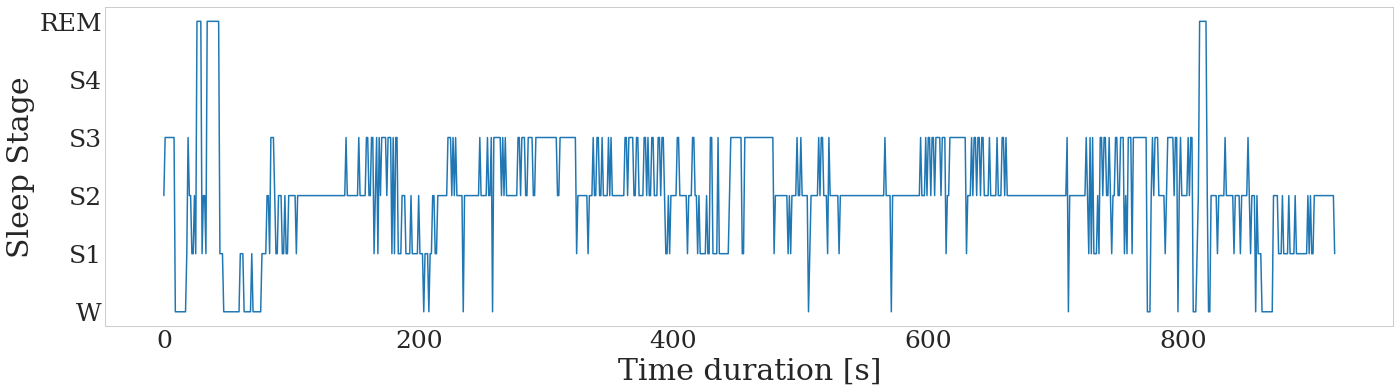

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/n1102_hypno shape (922, 14)


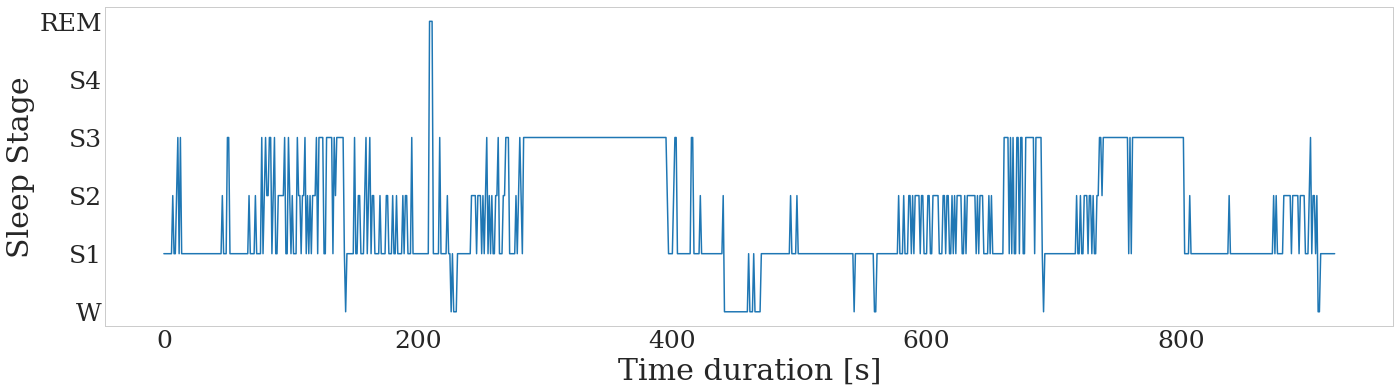

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/n1103_hypno shape (1043, 14)


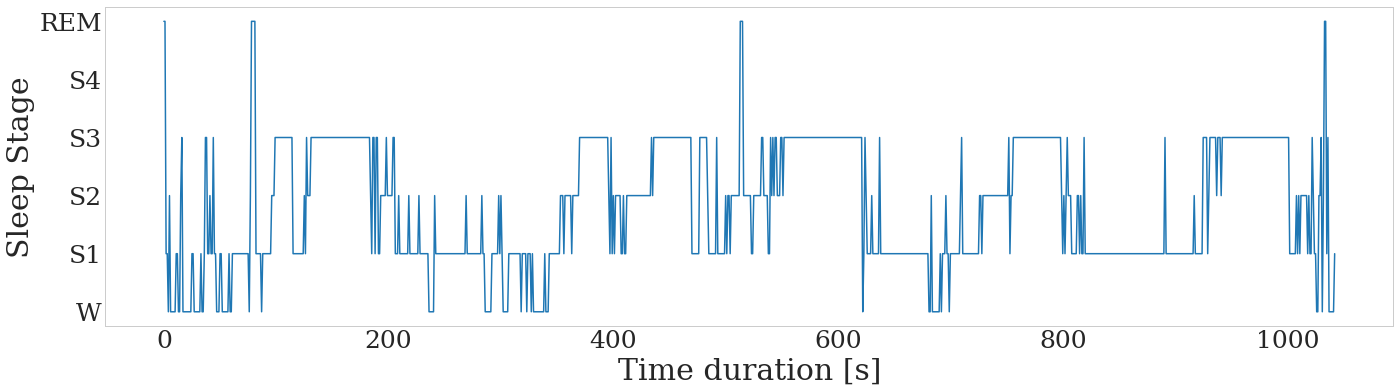

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/n1104_hypno shape (874, 14)


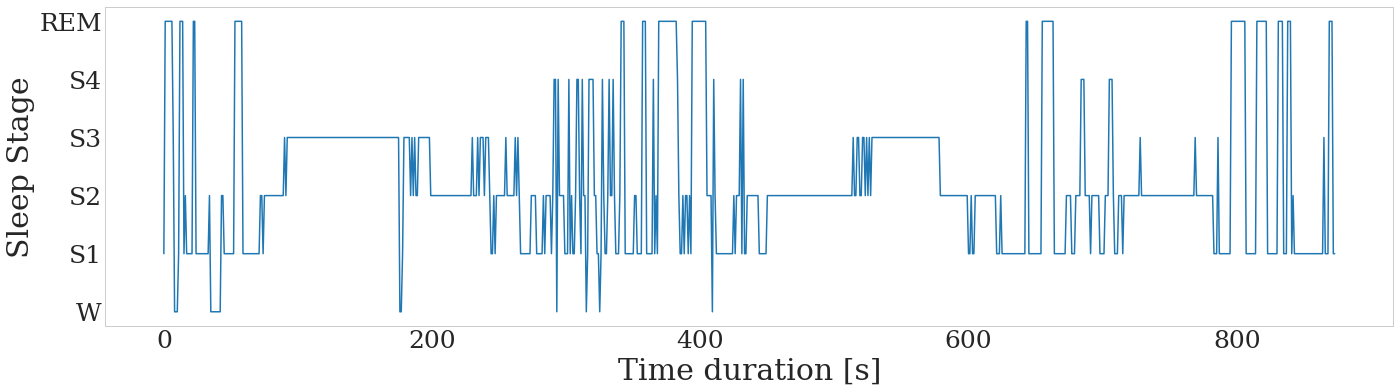

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/n1105_hypno shape (957, 14)


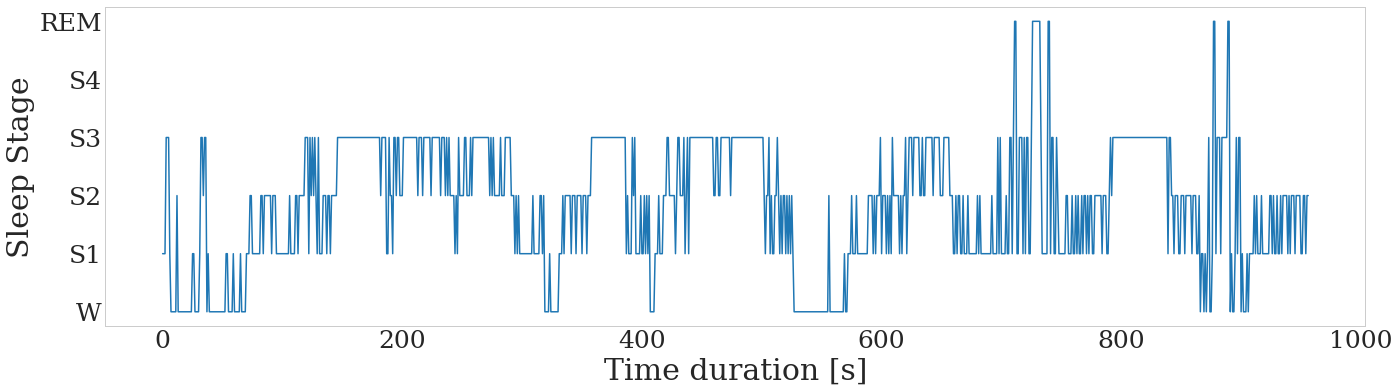

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/n1106_hypno shape (949, 14)


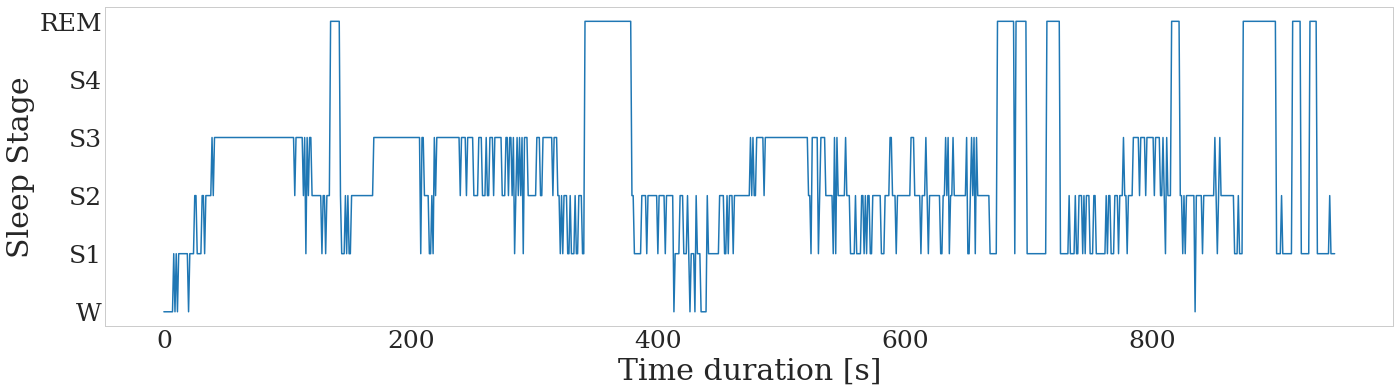

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/n1107_hypno shape (959, 14)


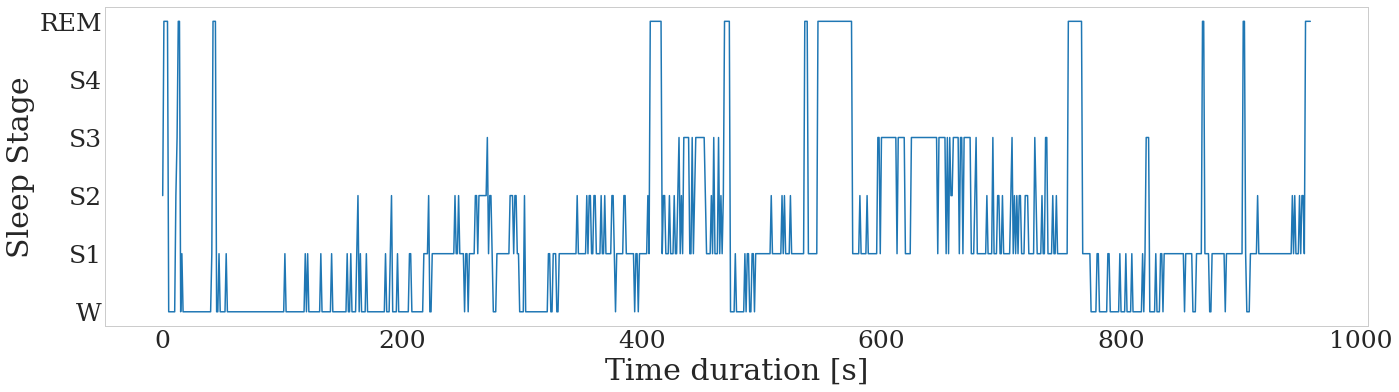

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/n1108_hypno shape (937, 14)


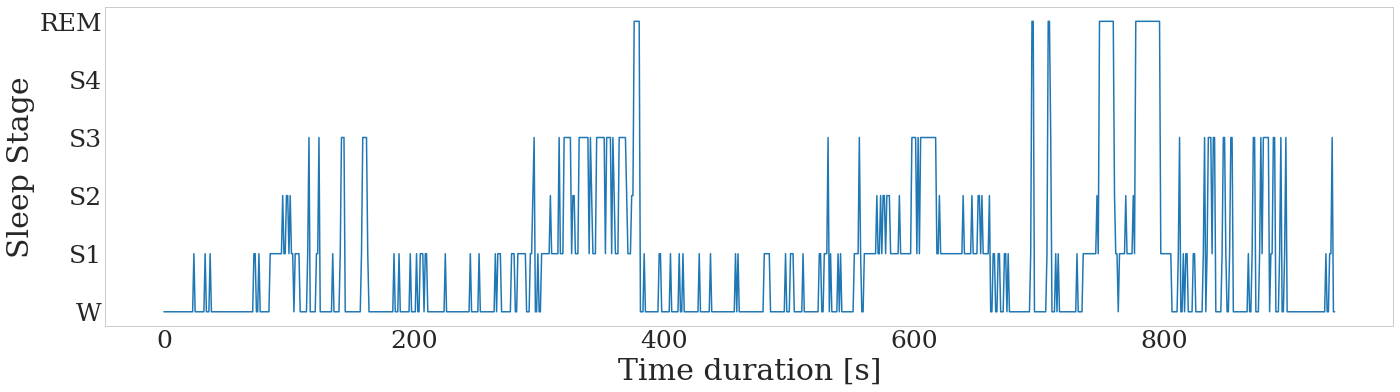

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/n1109_hypno shape (968, 14)


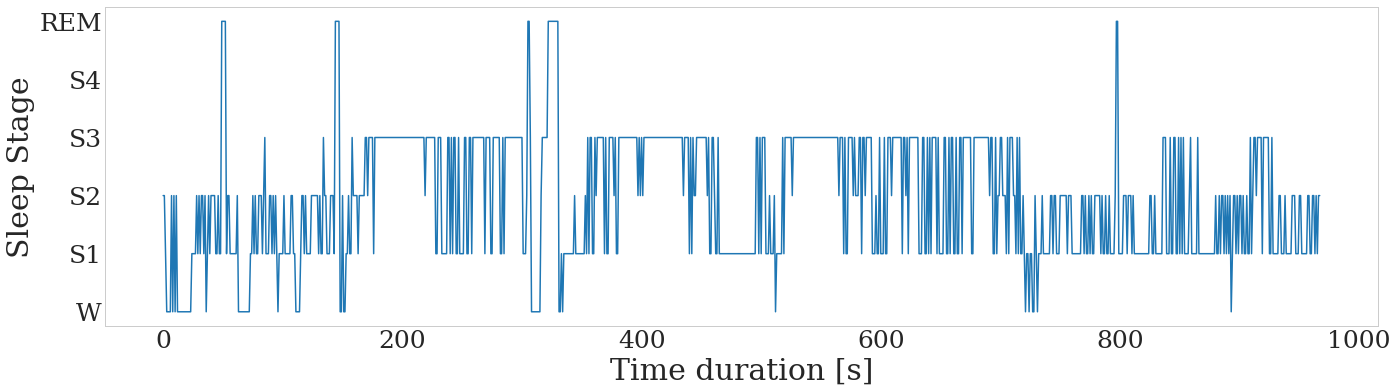

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/n1110_hypno shape (953, 14)


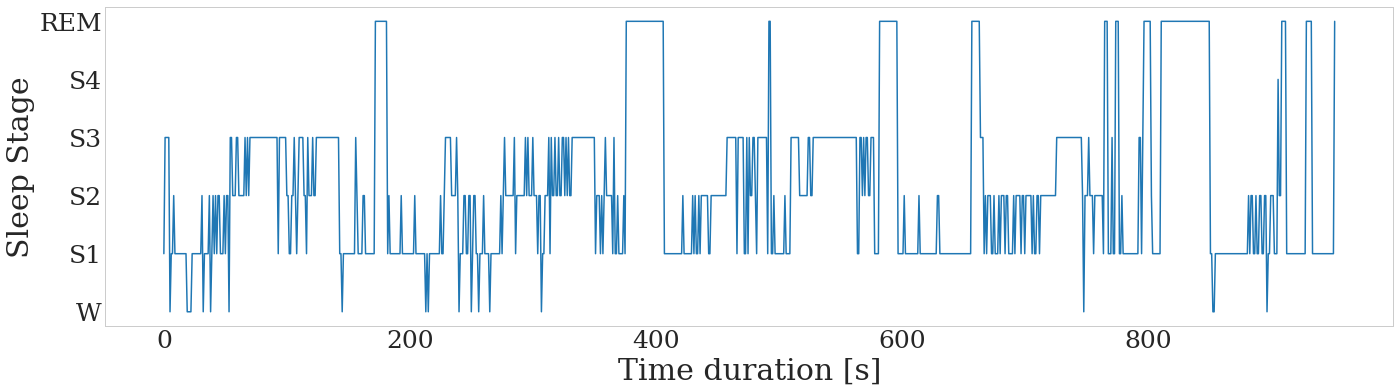

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/n1111_hypno shape (946, 14)


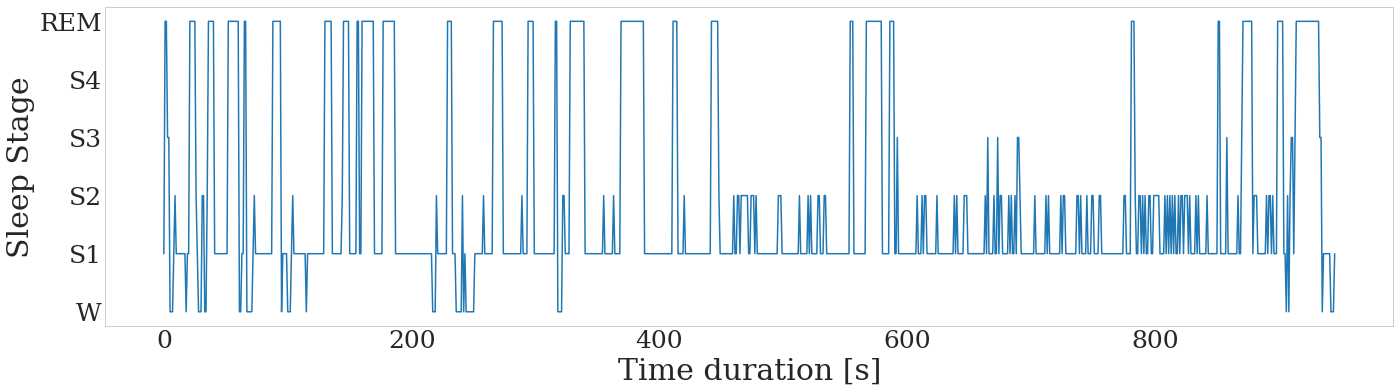

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/ins1101_hypno shape (954, 14)


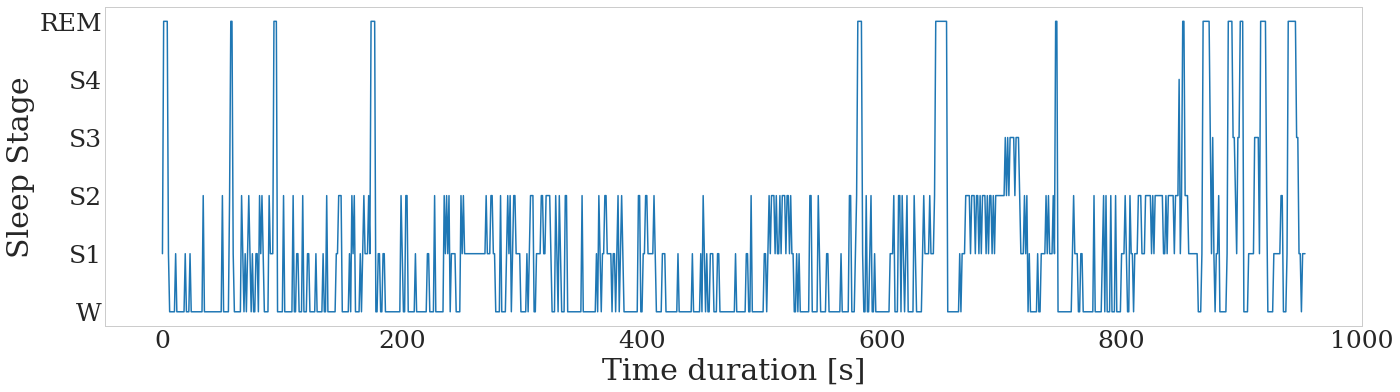

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/ins1102_hypno shape (873, 14)


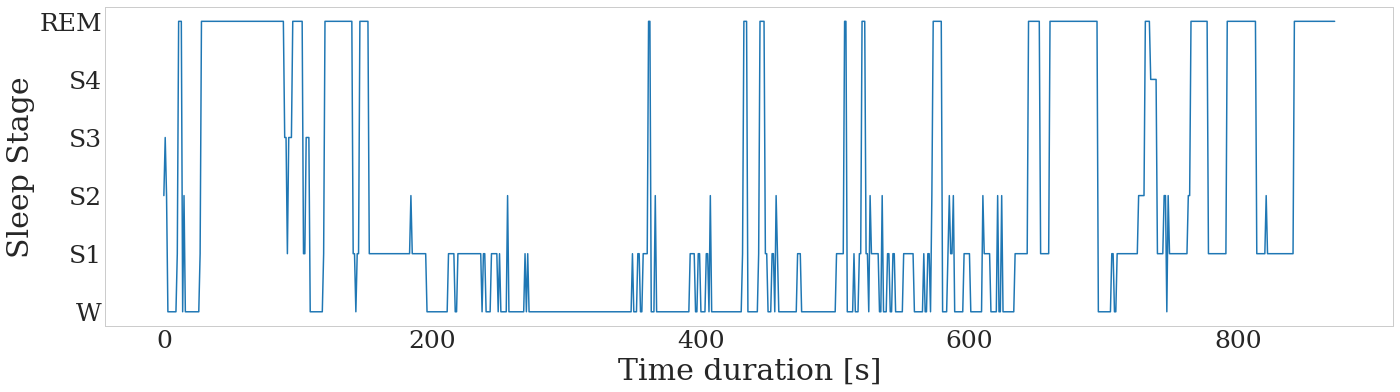

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/ins1103_hypno shape (959, 14)


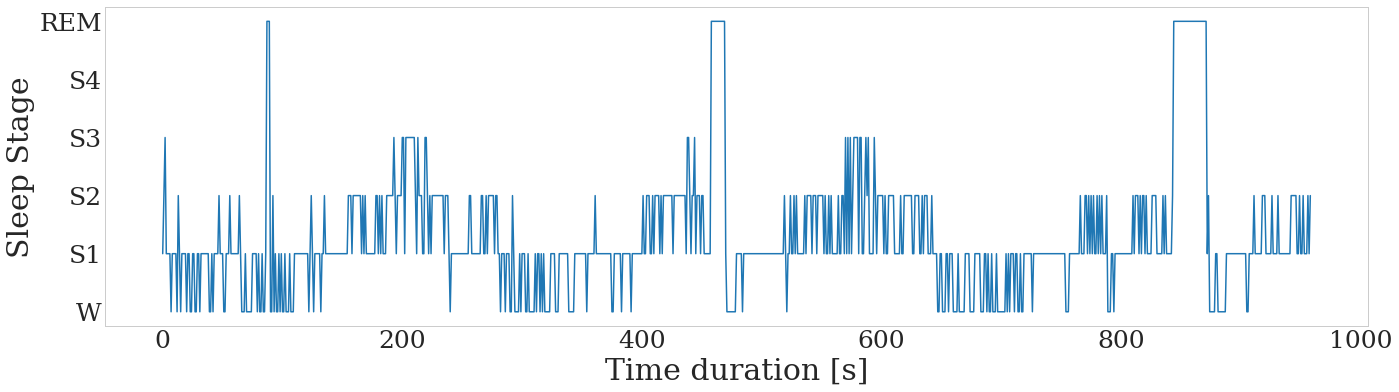

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/ins1104_hypno shape (954, 14)


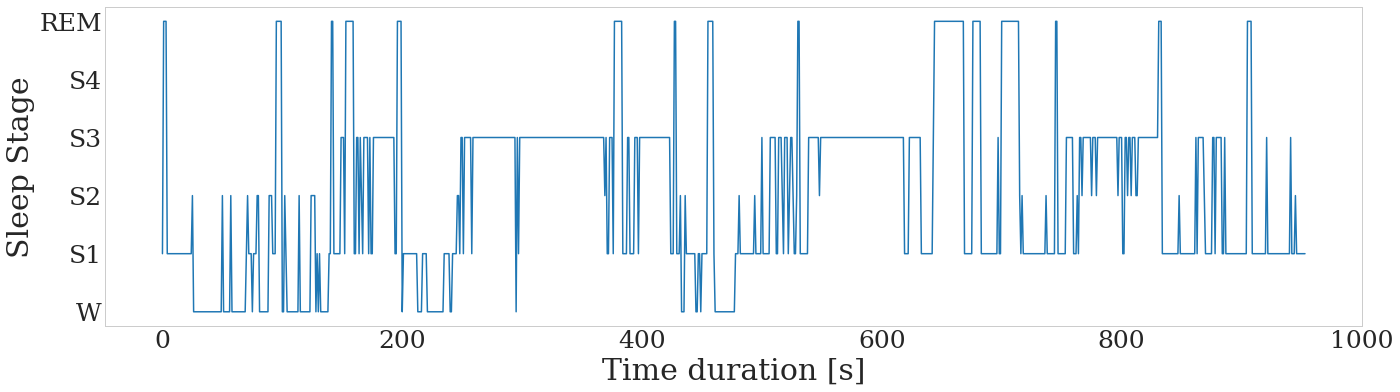

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/ins1105_hypno shape (905, 14)


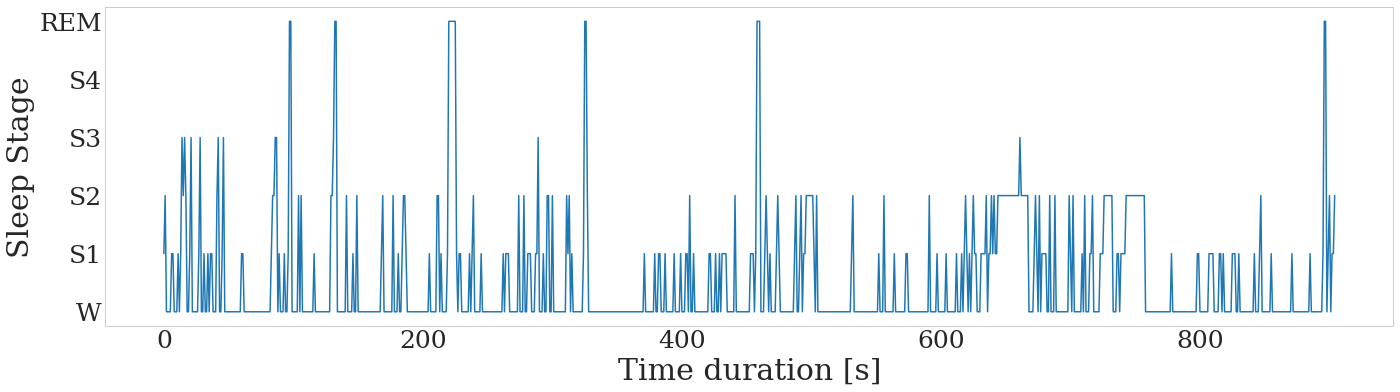

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/ins1106_hypno shape (919, 14)


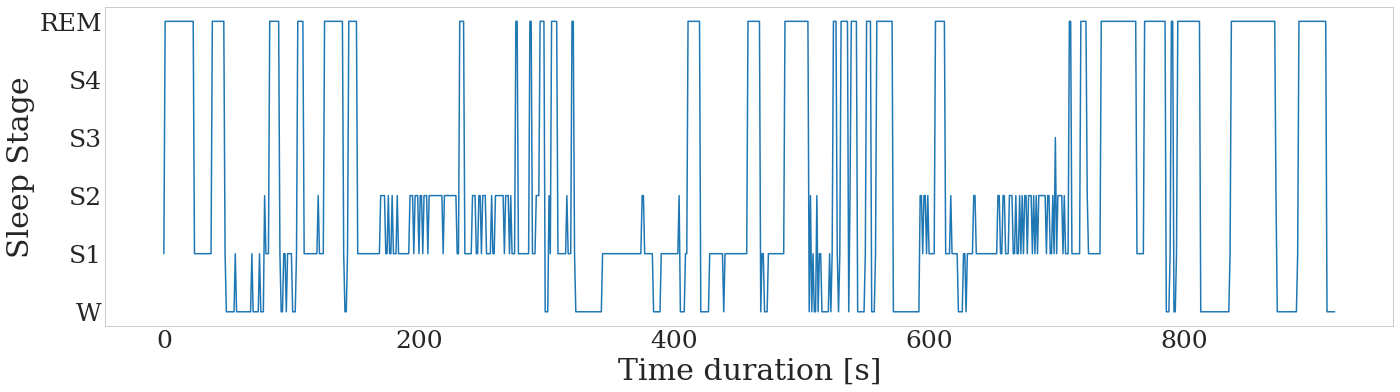

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/ins1107_hypno shape (958, 14)


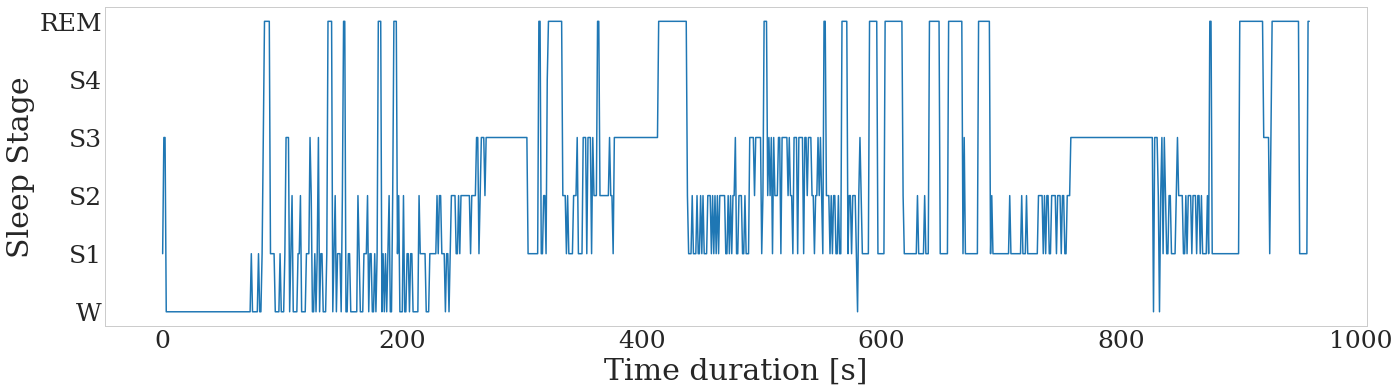

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/ins1108_hypno shape (952, 14)


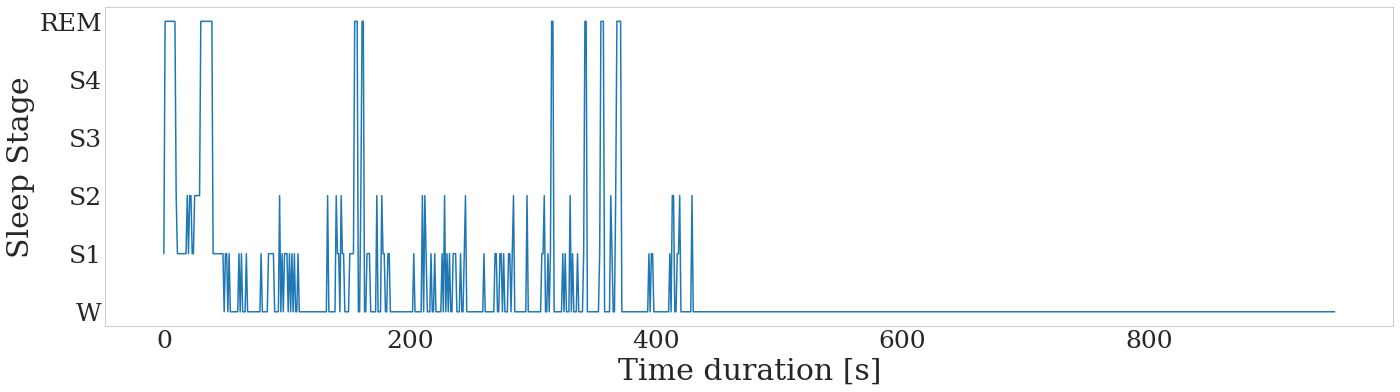

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/ins1109_hypno shape (662, 14)


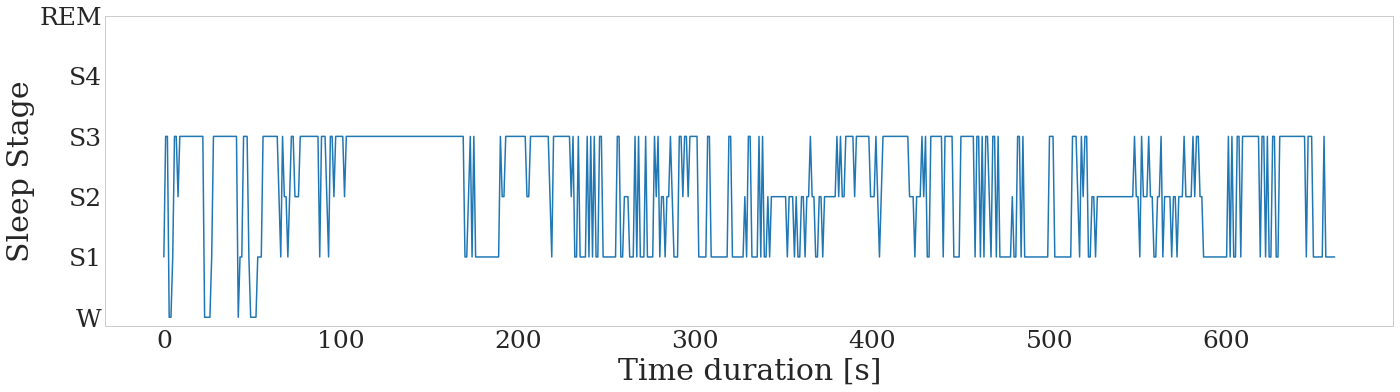

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/ins1110_hypno shape (939, 14)


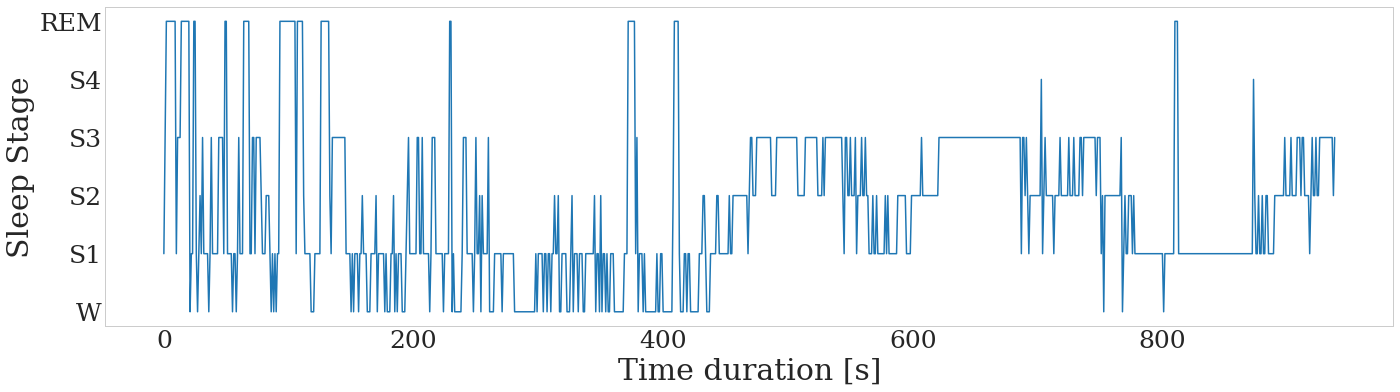

====== ./Results/SDRC/STP_From_Same_Stages/Hypnograms/ins1111_hypno shape (1043, 14)


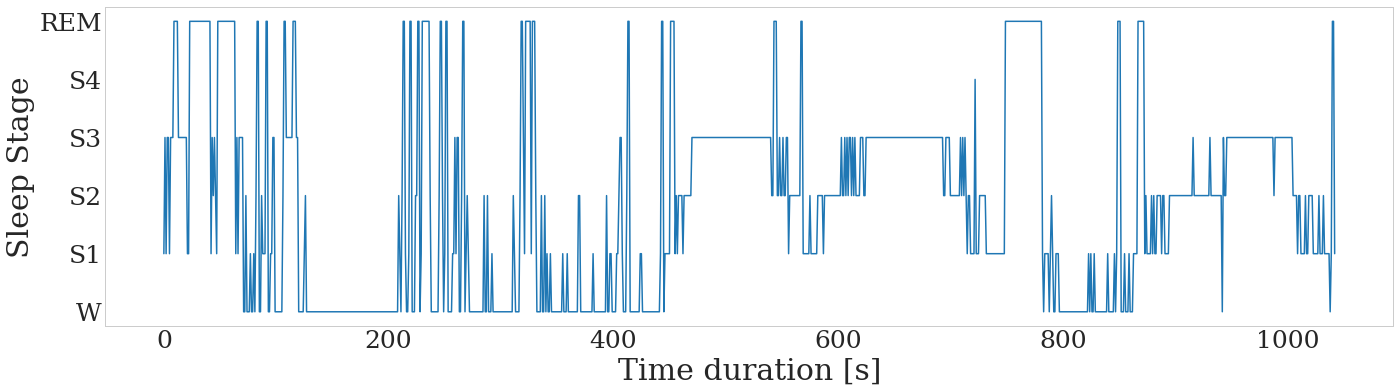

In [1422]:
draw_all_hypnograms()

##### Check the annotation symbols in all files

In [1423]:
# for annot_csv in list_of_annot_csvs:
#     annot_df = pd.read_csv(annot_csv)
#     print(annot_csv, annot_df["Sleep Stage"].unique())

### Sample hypnogram

In [1424]:
# list_of_files[0]
# save_file_name_test, annot_df_test = get_annot_data_for_hypnogram(all_annot_df, "brux1") 
# draw_hypnogram(save_file_name_test, annot_df_test) 

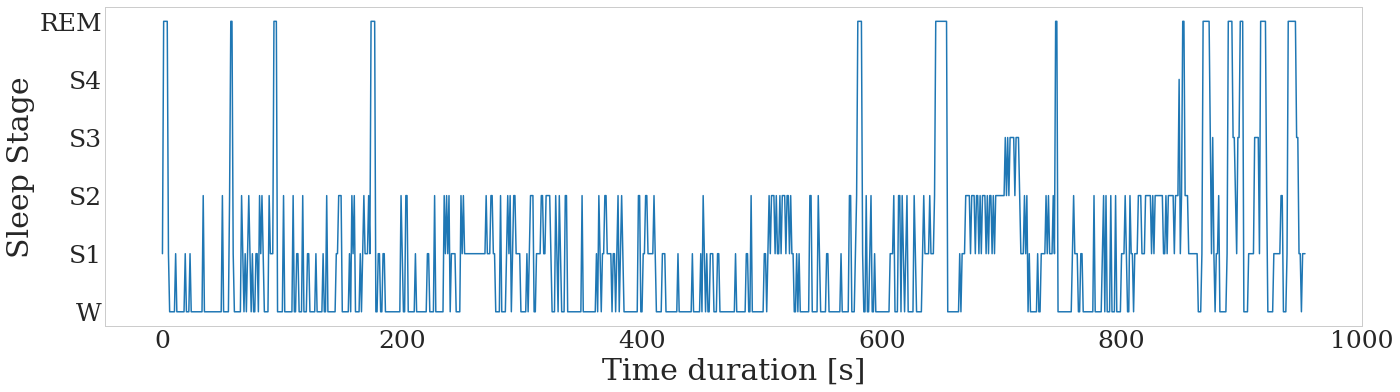

In [1425]:
# list_of_files[3]
save_file_name_test, annot_df_test = get_annot_data_for_hypnogram(all_annot_df, "ins1101") 
draw_hypnogram(save_file_name_test, annot_df_test) 

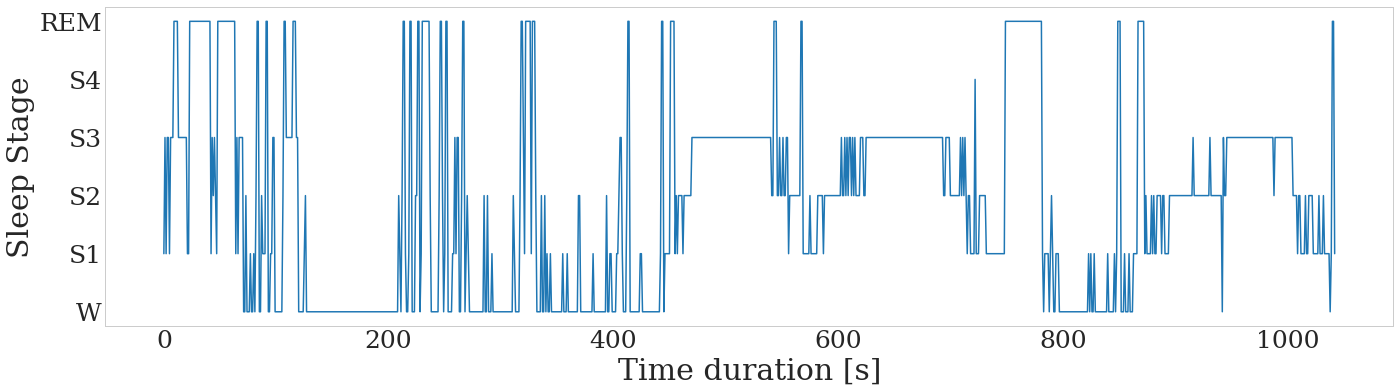

In [1426]:
# list_of_files[3]
save_file_name_test, annot_df_test = get_annot_data_for_hypnogram(all_annot_df, "ins1111") 
annot_df_test
draw_hypnogram(save_file_name_test, annot_df_test) 

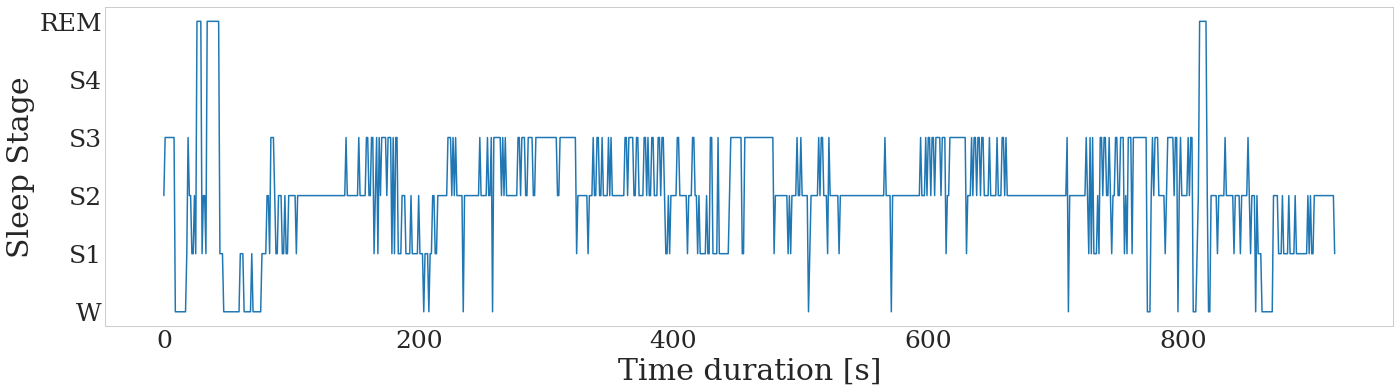

In [1427]:
# list_of_files[92]
save_file_name_test, annot_df_test = get_annot_data_for_hypnogram(all_annot_df, "n1101") 
draw_hypnogram(save_file_name_test, annot_df_test) 

## Sequence calculation - Save annotation sequence

In [1428]:
all_annot_df

File_Name Category  Subject_ID Sleep_Stage Position      Time  \
0       ins1101      ins        1101          S1  Unknown  23:54:30   
1       ins1101      ins        1101         REM  Unknown  23:55:00   
2       ins1101      ins        1101         REM  Unknown  23:55:30   
3       ins1101      ins        1101         REM  Unknown  23:56:00   
4       ins1101      ins        1101         REM  Unknown  23:56:30   
...         ...      ...         ...         ...      ...       ...   
20541     n1111        n        1111          S1  Unknown  07:11:30   
20542     n1111        n        1111           W  Unknown  07:12:00   
20543     n1111        n        1111           W  Unknown  07:12:30   
20544     n1111        n        1111           W  Unknown  07:13:00   
20545     n1111        n        1111          S1  Unknown  07:13:30   

           Event  Duration Location Event_Type Event_Level Signal_Type  \
0       SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   
1      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
2      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
3      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
4      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
...          ...       ...      ...        ...         ...         ...   
20541   SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   
20542    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20543    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20544    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20545   SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   

       Channel  
0      Unknown  
1      Unknown  
2      Unknown  
3      Unknown  
4      Unknown  
...        ...  
20541  Unknown  
20542  Unknown  
20543  Unknown  
20544  Unknown  
20545  Unknown  

[20546 rows x 13 columns]

In [1429]:
def sequencer_func(x):
    result = {"File_Name":x["File_Name"].head(1).values[0], "Category":x["Category"].head(1).values[0], "Subject_ID":x["Subject_ID"].head(1).values[0], "Sleep_Stage":x["Sleep_Stage_Number"].head(1).values[0], "Stage_Count": x.shape[0], "Duration": x["Duration"].sum()}
    return pd.Series(result, name="index")


def get_annotation_sequence(annot_df):
    # print(annot_df.columns)
    annot_df["Sleep_Stage_Number"] = annot_df["Sleep_Stage"]
    annot_df["Count"] = (annot_df["Sleep_Stage_Number"] != annot_df["Sleep_Stage_Number"].shift(1)).cumsum()
    annot_seq_df = annot_df.groupby("Count",as_index=False).apply(sequencer_func)
    annot_seq_df.insert(loc=4, column="Sequence", value=annot_seq_df["Count"].values.tolist())
    annot_seq_df = annot_seq_df.drop("Count", axis=1)
    return annot_seq_df

In [1430]:
def get_all_annotation_sequence():
    all_annot_seq_df = pd.DataFrame()
    for file in list_of_files:
        save_file_name, annot_df = get_annot_data_for_hypnogram(all_annot_df, file) 
        annot_seq_df = get_annotation_sequence(annot_df.copy()) 
        
        # print('======', save_file_name, "shape", annot_seq_df.shape)
        all_annot_seq_df = pd.concat([all_annot_seq_df, annot_seq_df], axis=0)
    return all_annot_seq_df

In [1431]:
all_annot_seq_df = get_all_annotation_sequence()
all_annot_seq_df

index File_Name Category  Subject_ID  Sequence Sleep_Stage  Stage_Count  \
0         n1101        n        1101         1          S2            1   
1         n1101        n        1101         2          S3            8   
2         n1101        n        1101         3           W            9   
3         n1101        n        1101         4          S1            1   
4         n1101        n        1101         5          S3            1   
..          ...      ...         ...       ...         ...          ...   
254     ins1111      ins        1111       255          S1            5   
255     ins1111      ins        1111       256           W            1   
256     ins1111      ins        1111       257          S1            1   
257     ins1111      ins        1111       258         REM            2   
258     ins1111      ins        1111       259          S1            1   

index  Duration  
0            30  
1           240  
2           270  
3            30  
4            30  
..          ...  
254         150  
255          30  
256          30  
257          60  
258          30  

[5653 rows x 7 columns]

In [1432]:
all_annot_seq_df

index File_Name Category  Subject_ID  Sequence Sleep_Stage  Stage_Count  \
0         n1101        n        1101         1          S2            1   
1         n1101        n        1101         2          S3            8   
2         n1101        n        1101         3           W            9   
3         n1101        n        1101         4          S1            1   
4         n1101        n        1101         5          S3            1   
..          ...      ...         ...       ...         ...          ...   
254     ins1111      ins        1111       255          S1            5   
255     ins1111      ins        1111       256           W            1   
256     ins1111      ins        1111       257          S1            1   
257     ins1111      ins        1111       258         REM            2   
258     ins1111      ins        1111       259          S1            1   

index  Duration  
0            30  
1           240  
2           270  
3            30  
4            30  
..          ...  
254         150  
255          30  
256          30  
257          60  
258          30  

[5653 rows x 7 columns]

In [1433]:
all_annot_seq_df.to_csv(f"{result_directory}/annot_sequence{'_TrimW' if trimW_states else ''}.csv", index=False)

## Transition analysis

### Annotation to transition sequence (successive annotations are merged) conversion

In [1434]:
all_annot_seq_df = pd.read_csv(f"{result_directory}/annot_sequence{'_TrimW' if trimW_states else ''}.csv")
all_annot_seq_df

File_Name Category  Subject_ID  Sequence Sleep_Stage  Stage_Count  \
0        n1101        n        1101         1          S2            1   
1        n1101        n        1101         2          S3            8   
2        n1101        n        1101         3           W            9   
3        n1101        n        1101         4          S1            1   
4        n1101        n        1101         5          S3            1   
...        ...      ...         ...       ...         ...          ...   
5648   ins1111      ins        1111       255          S1            5   
5649   ins1111      ins        1111       256           W            1   
5650   ins1111      ins        1111       257          S1            1   
5651   ins1111      ins        1111       258         REM            2   
5652   ins1111      ins        1111       259          S1            1   

      Duration  
0           30  
1          240  
2          270  
3           30  
4           30  
...        ...  
5648       150  
5649        30  
5650        30  
5651        60  
5652        30  

[5653 rows x 7 columns]

In [1435]:
all_annot_seq_df.Sleep_Stage.unique()

array(['S2', 'S3', 'W', 'S1', 'REM', 'S4'], dtype=object)

In [1436]:
# df['prev_value'] = df.groupby('object')['value'].shift(-1, fill_value="X")
# all_annot_seq_df['next_code'] = all_annot_seq_df.groupby('Subject_ID')['Sleep_Stage'].shift(-1, fill_value="W")
all_annot_seq_df['next_code'] = all_annot_seq_df.groupby('File_Name')['Sleep_Stage'].shift(-1, fill_value="W")
# all_annot_seq_df['next_code'] = all_annot_seq_df.groupby('File_Name')['Sleep_Stage'].shift(-1)
# all_annot_seq_df['next_code'] = all_annot_seq_df.groupby('Subject_ID')['Stages'].shift(-1).fillna('END')
all_annot_seq_df

File_Name Category  Subject_ID  Sequence Sleep_Stage  Stage_Count  \
0        n1101        n        1101         1          S2            1   
1        n1101        n        1101         2          S3            8   
2        n1101        n        1101         3           W            9   
3        n1101        n        1101         4          S1            1   
4        n1101        n        1101         5          S3            1   
...        ...      ...         ...       ...         ...          ...   
5648   ins1111      ins        1111       255          S1            5   
5649   ins1111      ins        1111       256           W            1   
5650   ins1111      ins        1111       257          S1            1   
5651   ins1111      ins        1111       258         REM            2   
5652   ins1111      ins        1111       259          S1            1   

      Duration next_code  
0           30        S3  
1          240         W  
2          270        S1  
3           30        S3  
4           30        S2  
...        ...       ...  
5648       150         W  
5649        30        S1  
5650        30       REM  
5651        60        S1  
5652        30         W  

[5653 rows x 8 columns]

In [1437]:
all_annot_seq_df["next_code"].unique()

array(['S3', 'W', 'S1', 'S2', 'REM', 'S4'], dtype=object)

In [1438]:
# all_annot_seq_df[(all_annot_seq_df['File_Name']=="brux1")]

In [1439]:
all_annot_seq_df.insert(loc=5, column="Next_Stage", value=all_annot_seq_df["next_code"].values.tolist())
all_annot_seq_df = all_annot_seq_df.drop("next_code", axis=1)
all_annot_seq_df

File_Name Category  Subject_ID  Sequence Sleep_Stage Next_Stage  \
0        n1101        n        1101         1          S2         S3   
1        n1101        n        1101         2          S3          W   
2        n1101        n        1101         3           W         S1   
3        n1101        n        1101         4          S1         S3   
4        n1101        n        1101         5          S3         S2   
...        ...      ...         ...       ...         ...        ...   
5648   ins1111      ins        1111       255          S1          W   
5649   ins1111      ins        1111       256           W         S1   
5650   ins1111      ins        1111       257          S1        REM   
5651   ins1111      ins        1111       258         REM         S1   
5652   ins1111      ins        1111       259          S1          W   

      Stage_Count  Duration  
0               1        30  
1               8       240  
2               9       270  
3               1        30  
4               1        30  
...           ...       ...  
5648            5       150  
5649            1        30  
5650            1        30  
5651            2        60  
5652            1        30  

[5653 rows x 8 columns]

In [1440]:
all_annot_seq_df

File_Name Category  Subject_ID  Sequence Sleep_Stage Next_Stage  \
0        n1101        n        1101         1          S2         S3   
1        n1101        n        1101         2          S3          W   
2        n1101        n        1101         3           W         S1   
3        n1101        n        1101         4          S1         S3   
4        n1101        n        1101         5          S3         S2   
...        ...      ...         ...       ...         ...        ...   
5648   ins1111      ins        1111       255          S1          W   
5649   ins1111      ins        1111       256           W         S1   
5650   ins1111      ins        1111       257          S1        REM   
5651   ins1111      ins        1111       258         REM         S1   
5652   ins1111      ins        1111       259          S1          W   

      Stage_Count  Duration  
0               1        30  
1               8       240  
2               9       270  
3               1        30  
4               1        30  
...           ...       ...  
5648            5       150  
5649            1        30  
5650            1        30  
5651            2        60  
5652            1        30  

[5653 rows x 8 columns]

In [1441]:
all_annot_seq_df.Next_Stage.unique()

array(['S3', 'W', 'S1', 'S2', 'REM', 'S4'], dtype=object)

In [1442]:
# all_annot_seq_df[(all_annot_seq_df['File_Name']=="brux1")]

In [1443]:
all_annot_seq_df = get_annotation_sequence(all_annot_seq_df.copy()) 
all_annot_seq_df 

index File_Name Category  Subject_ID  Sequence Sleep_Stage  Stage_Count  \
0         n1101        n        1101         1          S2            1   
1         n1101        n        1101         2          S3            1   
2         n1101        n        1101         3           W            1   
3         n1101        n        1101         4          S1            1   
4         n1101        n        1101         5          S3            1   
...         ...      ...         ...       ...         ...          ...   
5642    ins1111      ins        1111      5643          S1            1   
5643    ins1111      ins        1111      5644           W            1   
5644    ins1111      ins        1111      5645          S1            1   
5645    ins1111      ins        1111      5646         REM            1   
5646    ins1111      ins        1111      5647          S1            1   

index  Duration  
0            30  
1           240  
2           270  
3            30  
4            30  
...         ...  
5642        150  
5643         30  
5644         30  
5645         60  
5646         30  

[5647 rows x 7 columns]

In [1444]:
all_annot_seq_df['Sequence'] = all_annot_seq_df.groupby(['File_Name']).cumcount(['Sequence']).values
all_annot_seq_df

index File_Name Category  Subject_ID  Sequence Sleep_Stage  Stage_Count  \
0         n1101        n        1101         0          S2            1   
1         n1101        n        1101         1          S3            1   
2         n1101        n        1101         2           W            1   
3         n1101        n        1101         3          S1            1   
4         n1101        n        1101         4          S3            1   
...         ...      ...         ...       ...         ...          ...   
5642    ins1111      ins        1111       254          S1            1   
5643    ins1111      ins        1111       255           W            1   
5644    ins1111      ins        1111       256          S1            1   
5645    ins1111      ins        1111       257         REM            1   
5646    ins1111      ins        1111       258          S1            1   

index  Duration  
0            30  
1           240  
2           270  
3            30  
4            30  
...         ...  
5642        150  
5643         30  
5644         30  
5645         60  
5646         30  

[5647 rows x 7 columns]

In [1445]:
all_annot_seq_df.to_csv(f"{result_directory}/transition_sequence{'_TrimW' if trimW_states else ''}.csv", index=False)

### Transition count, probability and duration matrix

In [1446]:
def fill_missing_stage_values(arr, indx):
    
    for i in indx: 
        column_to_be_added = np.zeros(arr.shape[0])
        arr2 = np.insert(arr, i, column_to_be_added, axis=0)
        column_to_be_added = np.zeros(arr.shape[0]+1)
        arr3 = np.insert(arr2, i, column_to_be_added, axis=1)
        arr = arr3.copy()
    return arr.tolist()


def create_zero_matrix(n, st):
    mat = None
    if n>1:
        inmat = [0 for _ in range(n)]
        tmpmat = inmat.copy()
        for i in range(st-1):
            inmat = [copy.deepcopy(inmat) for _ in range(n)]
        mat = copy.deepcopy(inmat)
    else:
        print("\nNo transition is set...")
    return mat

def create_transition_matrix(transitions, duration, tran_count, tran_dura, tran_step=2):
    # now get transition count and duration
    for i, (t, d) in enumerate(zip(transitions[:-(tran_step-1)], duration[:-(tran_step-1)])):
        stats = f"{t}"
        # print(t)        
        tmp_count = f"tran_count[{t}]" 
        tmp_dura = f"tran_dura[{t}]" 
        for j in range(tran_step-1):
            nt = transitions[i+j+1]
            stats += f"->{nt}"
            # print(nt)            
            tmp_count = f"{tmp_count}[{nt}]"
            tmp_dura = f"{tmp_dura}[{nt}]"  
            if (tran_step>2) and j<(tran_step-2):
                d += duration[i+j+1]
            
        exec(f"tc={tmp_count}+{1}")
        exec(f"td={tmp_dura}+{d}")  
        tmp_count = f"{tmp_count}={tmp_count}+{1}"
        tmp_dura = f"{tmp_dura}={tmp_dura}+{d}"  
        # print("=======\n", tmp_count, tmp_dura)
        exec(tmp_count)
        exec(tmp_dura)           
        # exec("print(tc)")
        # print(t, stats, tmp_count, tmp_dura, "\n================\n")
        # print(stats, tc, td, "\n================\n")
        # print("=======\n", tran_count, tran_dura)
    return tran_count, tran_dura


# #### Probability based on total transition from the same stage 
# def create_transition_probability_for_a_matrix(tran_p):    
#     tran_proba = tran_p.copy() 
#     for row in tran_proba:
#         s = sum(row)
#         if s > 0:
#             row[:] = [f/s for f in row] 
#     return tran_proba


# # #### Probability based on total transition from all the stage
# def create_transition_probability_for_a_matrix(tran_p): 
#     tran_p = np.array(tran_p) 
# #     tran_proba = np.zeros(tran_p.shape) #.copy() 
#     total_count = tran_p.sum()
#     tran_proba = np.round(tran_p/total_count, 4).tolist() 
# #     for row in tran_proba:
# # #         s = sum(row)
# #         if s > 0:
# #             row[:] = [f/s for f in row] 
#     return tran_proba


# #### Probability based on total transition from all the stage/same stage 
def create_transition_probability_for_a_matrix(tran_p): 
    tran_proba = list()
    if prob_cal_from_all: 
        tran_p = np.array(tran_p) 
        total_count = tran_p.sum()
        tran_proba = np.round(tran_p/total_count, 4).tolist() 
    else: 
        tran_proba = tran_p.copy() 
        for row in tran_proba:
            s = sum(row)
            if s > 0:
                row[:] = [f/s for f in row] 
    return tran_proba


def create_transition_probability(tran_p):    
    tran_proba = []     
    if type(tran_p[0][0])!=list:
        ttp = create_transition_probability_for_a_matrix(tran_p)
        # tran_proba.append(ttp)
        return ttp
    for i, tp in enumerate(tran_p):
        ttp = create_transition_probability(tp)   
        tran_proba.append(ttp)
    return tran_proba


def print_a_matrix(tran_info, decimal):
    # print(tran_info)
    num_digits = len(str( np.amax(np.array(tran_info)) ))
    formatter_str = '{0:'+str(num_digits+4)+'.4f}' if decimal else '{0:'+str(num_digits+2)+'}' 
    for row in tran_info: print(' '.join(formatter_str.format(x) for x in row)) 
        
        
def print_nested_matrix(big_mat, decimal, msg=None):
    if type(big_mat[0][0])!=list:
        print_a_matrix(big_mat, decimal)
        return 
    for i, mat in enumerate(big_mat):
        mm = f"stage{i}->" if not msg else f"{msg}stage{i}->"
        print(mm)
        print_nested_matrix(mat, decimal, msg=mm)        


def print_transition_info(tran_info, decimal=False, tran_step=2): 
    original_sleep_stages = sleep_stage_labels_dict 
    tr_st = "->".join(f"step{i}" for i in range(1, tran_step+1))
    print(f"{tran_step} Step transition ({tr_st}). The index of the data corresponds to the sleep stages: {original_sleep_stages}")
    if tran_step<2:
        print("Wrong transition matrix...")
    else:
        print_nested_matrix(tran_info, decimal)
        


# Markov transition probability matrix
# https://stackoverflow.com/questions/46657221/generating-markov-transition-matrix-in-python#:~:text=In%20order%20to%20obtain%20a,transpose()%20.
def transition_count_and_probability_matrix(all_annot_df, missing_labels, sleep_label_column, duration_column, tran_step=2, show_results=False):
    transitions = all_annot_df[sleep_label_column].values  
    duration = all_annot_df[duration_column].values 
    original_sleep_stages = list(sleep_stage_labels_dict.keys())
    ind = list([original_sleep_stages.index(ss) for ss in missing_labels])
    ind.sort()
    print("1111---", ind, missing_labels, original_sleep_stages)
    tran_count = None 
    tran_dura = None 
    tran_proba = None
    # n = 1+ max(transitions) #number of states
    n = len(list(sleep_stage_labels_dict.keys()))
    
    tran_count = create_zero_matrix(n, tran_step)
    tran_dura = create_zero_matrix(n, tran_step)
    print("000---", n, tran_step, np.unique(transitions), tran_count, tran_dura)
    u_stg = np.unique(transitions) 
    print(f"Transition steps: {tran_step}, Original stages: {sleep_stage_labels_dict}, Unique sleep stages available: {u_stg} | {[original_sleep_stages[si] for si in u_stg]}")
    
    # now get transition count and duration
    tran_count, tran_dura = create_transition_matrix(transitions, duration, tran_count, tran_dura, tran_step=tran_step)
    
    # now convert to probabilities
    tran_proba = create_transition_probability(copy.deepcopy(tran_count))
    ##########################################################################################
    if show_results:
        # print(f"\nTransition Count: {(tran_step)}")
        print(f"\nTransition Count\n====================================")
        print_transition_info(tran_count, tran_step=tran_step)  

        # print(f"\nTransition Duration: {(tran_step)}")
        print(f"\nTransition Duration\n====================================")
        print_transition_info(tran_dura, tran_step=tran_step)  

        # print(f"\nTransition Probability: {(tran_step)}")
        print(f"\nTransition Probability\n====================================")
        print_transition_info(tran_proba, decimal=True, tran_step=tran_step)
    
    #Deal with missing data    
    #original_sleep_stages = list(sleep_stage_labels_dict.keys())
    #print("2222-", len(tran_count), len(tran_proba), len(tran_dura))
    
    return tran_count, tran_proba, tran_dura

In [1447]:
ones = np.ones((5,2)) 
np.round(ones/3, 3)

array([[0.333, 0.333],
       [0.333, 0.333],
       [0.333, 0.333],
       [0.333, 0.333],
       [0.333, 0.333]])

In [1448]:
# all_annot_df
# tmp_df = all_annot_df[all_annot_df['Category']=='ins'].iloc[250:300, :].copy()

# count, proba, dura = transition_count_and_probability_matrix(tmp_df, [], sleep_label_column="Sleep_Stage_Label", duration_column="Duration [s]", tran_step=2) 

In [1449]:
# count, proba, dura = transition_count_and_probability_matrix(tmp_df, [], sleep_label_column="Sleep Stage Label", duration_column="Duration [s]", tran_step=2, show_results=True) 

In [1450]:
# tmp_df[modified_label].values
# %whos


# def addition(string):
#     exec(string)
# #     return d
# addition("a=10\nb=11\nd=a+b")
# d

In [1451]:
all_annot_df

File_Name Category  Subject_ID Sleep_Stage Position      Time  \
0       ins1101      ins        1101          S1  Unknown  23:54:30   
1       ins1101      ins        1101         REM  Unknown  23:55:00   
2       ins1101      ins        1101         REM  Unknown  23:55:30   
3       ins1101      ins        1101         REM  Unknown  23:56:00   
4       ins1101      ins        1101         REM  Unknown  23:56:30   
...         ...      ...         ...         ...      ...       ...   
20541     n1111        n        1111          S1  Unknown  07:11:30   
20542     n1111        n        1111           W  Unknown  07:12:00   
20543     n1111        n        1111           W  Unknown  07:12:30   
20544     n1111        n        1111           W  Unknown  07:13:00   
20545     n1111        n        1111          S1  Unknown  07:13:30   

           Event  Duration Location Event_Type Event_Level Signal_Type  \
0       SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   
1      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
2      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
3      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
4      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
...          ...       ...      ...        ...         ...         ...   
20541   SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   
20542    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20543    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20544    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20545   SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   

       Channel  
0      Unknown  
1      Unknown  
2      Unknown  
3      Unknown  
4      Unknown  
...        ...  
20541  Unknown  
20542  Unknown  
20543  Unknown  
20544  Unknown  
20545  Unknown  

[20546 rows x 13 columns]

In [1452]:
(1410*30)/3600

11.75

In [1453]:
##3 TEST PURPOSE
# tmp_df = all_annot_df.copy()
tmp_df = all_annot_df.iloc[275:300, :].copy()
# tmp_df = all_annot_df[all_annot_df['Category']=='ins'].iloc[250:300, :].copy()
tmp_df = all_annot_df[all_annot_df['Category']=='ins']#.iloc[250:300, :].copy()
# tmp_df = all_annot_df[all_annot_df['Category']=='ins'].iloc[270:290, :].copy()
# tmp_df = all_annot_df[all_annot_df['File_Name']=='brux1'] #.iloc[700:790, :].copy()
# tmp_df

modified_label = "Sleep_Stage_Label"
tmp_df[modified_label] = tmp_df["Sleep_Stage"]
tmp_stage_names = sleep_stage_name_to_value_conversion(list(tmp_df[modified_label].unique()))
tmp_df.replace({modified_label: tmp_stage_names}, inplace=True)
tmp_df

count, proba, dura = transition_count_and_probability_matrix(tmp_df, [], sleep_label_column="Sleep_Stage_Label", duration_column="Duration", tran_step=2, show_results=True) 
# count, proba, dura = transition_count_and_probability_matrix(tmp_df, ['REM'], sleep_label_column="Sleep Stage Label", duration_column="Duration [s]") 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


1111--- [] [] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 2 [0 1 2 3 4 5] [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]] [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
Transition steps: 2, Original stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}, Unique sleep stages available: [0 1 2 3 4 5] | ['W', 'S1', 'S2', 'S3', 'S4', 'REM']

Transition Count
2 Step transition (step1->step2). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
  2692    457    134      3      0      0
   385   1869    384    148      3    108
   137    371    676    126      2     29
    22    125    127   1157      0     12
     0      4      1      0      4      1
    50     71     19      9      1    990

Transition Duration
2 Step transition (step1->step2). The index of the data corresponds t

In [1454]:
count

[[2692, 457, 134, 3, 0, 0],
 [385, 1869, 384, 148, 3, 108],
 [137, 371, 676, 126, 2, 29],
 [22, 125, 127, 1157, 0, 12],
 [0, 4, 1, 0, 4, 1],
 [50, 71, 19, 9, 1, 990]]

In [1455]:
np.array(count).sum()

10117

In [1456]:
84/1409

0.05961674946770759

In [1457]:
sleep_stage_labels_dict

{'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}

### Get annotation data for transition matrix

In [1562]:
## trimW_states: pre-process to remove leading and trailing Ws {'_TrimW' if trimW_states else ''}
f"{result_directory}/all_annotations{'_TrimW' if trimW_states else ''}.csv"

'./Results/SDRC/STP_From_All_Stages/all_annotations_TrimW.csv'

In [1563]:
all_annot_df =  pd.read_csv(f"{result_directory}/all_annotations{'_TrimW' if trimW_states else ''}.csv")
all_annot_df 

File_Name Category  Subject_ID Sleep_Stage Position      Time     Event  \
0         ins10      ins          10          S1  Unknown  23:15:30  SLEEP-S1   
1         ins10      ins          10          S3  Unknown  23:16:00  SLEEP-S3   
2         ins10      ins          10         REM  Unknown  23:16:30   SLEEP-R   
3         ins10      ins          10         REM  Unknown  23:17:00   SLEEP-R   
4         ins10      ins          10         REM  Unknown  23:17:30   SLEEP-R   
...         ...      ...         ...         ...      ...       ...       ...   
20428        n9        n           9          S2  Unknown  07:35:00  SLEEP-S2   
20429        n9        n           9          S1  Unknown  07:35:30  SLEEP-S1   
20430        n9        n           9          S2  Unknown  07:36:00  SLEEP-S2   
20431        n9        n           9          S1  Unknown  07:36:30  SLEEP-S1   
20432        n9        n           9          S2  Unknown  07:37:00  SLEEP-S2   

       Duration Location Event_Type Event_Level Signal_Type  Channel  
0            30  Unknown      SLEEP          S1     Unknown  Unknown  
1            30  Unknown      SLEEP          S3     Unknown  Unknown  
2            30  Unknown      SLEEP           R     Unknown  Unknown  
3            30  Unknown      SLEEP           R     Unknown  Unknown  
4            30  Unknown      SLEEP           R     Unknown  Unknown  
...         ...      ...        ...         ...         ...      ...  
20428        30  Unknown      SLEEP          S2     Unknown  Unknown  
20429        30  Unknown      SLEEP          S1     Unknown  Unknown  
20430        30  Unknown      SLEEP          S2     Unknown  Unknown  
20431        30  Unknown      SLEEP          S1     Unknown  Unknown  
20432        30  Unknown      SLEEP          S2     Unknown  Unknown  

[20433 rows x 13 columns]

### Create and save transition count, probability and duration - for annotation and sequence (successive annotations are merged)

In [1460]:
list(sleep_stage_labels_dict.keys()), list(sleep_stage_names_dict.keys()), 

(['W', 'S1', 'S2', 'S3', 'S4', 'REM'], ['W', 'S1', 'S2', 'S3', 'S4', 'R'])

In [1461]:
# def organise_sleep_stage_transition_matrix(m, stage_names = list(sleep_stage_labels_dict.keys())):
#     # sleep_stage_labels = ['W', 'S1', 'S2', 'S3', 'S4', 'REM', 'ART']
    
#     # print("3333-", len(m), len(m[0]), len(stage_names))
    
#     transition_matrix_df = pd.DataFrame(columns=stage_names, data=m)
#     transition_matrix_df.index = stage_names
    
#     return transition_matrix_df

In [1502]:
def organise_a_matrix(tran_info, stage_names, from_stages=None):
    if from_stages==None:
        for i, ti in enumerate(tran_info):
            ti.insert(0, stage_names[i+1])
    else:
        for i, ti in enumerate(tran_info):
            ti.insert(0, f"{from_stages}{stage_names[i+1]}")
    t_mat = pd.DataFrame(columns=stage_names, data=tran_info)
    print(t_mat)
    return t_mat
        
        
def organise_transition_matrix(big_mat, msg=None, tran_step=2, timer=2, stage_names=[]):
    original_sleep_stages_names = list(sleep_stage_labels_dict.keys())
    tran_mat_df = pd.DataFrame()
    original_sleep_stages = sleep_stage_labels_dict
    if type(big_mat[0][0])!=list:
        t_mat = organise_a_matrix(big_mat, stage_names=stage_names, from_stages=msg)
        return t_mat
    for i, mat in enumerate(big_mat):
        mm = f"{original_sleep_stages_names[i]}->" if not msg else f"{msg}{original_sleep_stages_names[i]}->"  
        print(f"### Transition from: {mm}")
        t_mat = organise_transition_matrix(mat, msg=mm, tran_step=tran_step, timer=timer-1, stage_names=stage_names)
        tran_mat_df = pd.concat([tran_mat_df, t_mat])
    return tran_mat_df
        

def organise_sleep_stage_transition_matrix(tran_info, stage_names = ["From"]+list(sleep_stage_labels_dict.keys()), tran_step=2):
    transition_matrix_df = pd.DataFrame()
    print(stage_names)
    
    original_sleep_stages = sleep_stage_labels_dict 
#     original_sleep_stages = list(sleep_stage_labels_dict.keys())
    tr_st = "->".join(f"step{i}" for i in range(1, tran_step+1))
    print(f"{tran_step} Step transition ({tr_st}). The index of the data corresponds to the sleep stages: {original_sleep_stages}")
    if tran_step<2:
        print("Wrong transition matrix...")
    else:
        transition_matrix_df = organise_transition_matrix(tran_info, tran_step=tran_step, timer=tran_step, stage_names=stage_names)
#         transition_matrix_df.index = stage_names
    
    return transition_matrix_df

In [1503]:
def create_and_save_transition_information(all_annot_df, sleep_label_column, duration_column, save_path, file_name, tran_step=2, annot_type="annot"):
    modified_label = "Sleep_Stage_Number"
    all_annot_df[modified_label] = all_annot_df[sleep_label_column]
    available_stages = list(all_annot_df[modified_label].unique())
    original_sleep_stages = list(sleep_stage_labels_dict.keys())
    missing_labels = list( set(original_sleep_stages).difference(set(available_stages)) )
    tmp_stage_names = sleep_stage_name_to_value_conversion(available_stages)
    print("===", file_name, available_stages, sleep_label_column, missing_labels, tmp_stage_names)
    # sleep_stage_labels_dict
    all_annot_df.replace({modified_label: tmp_stage_names}, inplace=True)
    
    count, proba, dura = transition_count_and_probability_matrix(all_annot_df, missing_labels, sleep_label_column=modified_label, duration_column=duration_column, tran_step=tran_step, show_results=False) 
    
    print("Processing for saving\n===================================")
    
    file_path = f"{save_path}/{file_name}_transition{tran_step}"
    
    print(f"\nTransition Count\n====================================")
    count_df = organise_sleep_stage_transition_matrix(count, tran_step=tran_step)
    print(f"\nTransition Duration\n====================================")
    dura_df = organise_sleep_stage_transition_matrix(dura, tran_step=tran_step)
    print(f"\nTransition Probability\n====================================")
    proba_df = organise_sleep_stage_transition_matrix(proba, tran_step=tran_step)
    
    print("Started saving\n===================================")
    count_df.to_csv(f"{file_path}_count.csv", index=False)
    dura_df.to_csv(f"{file_path}_dura.csv", index=False)
    proba_df.to_csv(f"{file_path}_proba.csv", index=False)
    print("Finished saving\n===================================")
    
    return count_df, proba_df, dura_df


In [1464]:
# count, proba, dura = create_and_save_transition_information(tmp_df, sleep_label_column="Sleep_Stage", duration_column="Duration", 
#                                                             save_path=f"{result_directory}/Transition_Matrices{'_TrimW' if trimW_states else ''}", file_name="test_annot", tran_step=2) 


In [1465]:
all_annot_df

File_Name Category  Subject_ID Sleep_Stage Position      Time  \
0       ins1101      ins        1101          S1  Unknown  23:54:30   
1       ins1101      ins        1101         REM  Unknown  23:55:00   
2       ins1101      ins        1101         REM  Unknown  23:55:30   
3       ins1101      ins        1101         REM  Unknown  23:56:00   
4       ins1101      ins        1101         REM  Unknown  23:56:30   
...         ...      ...         ...         ...      ...       ...   
20541     n1111        n        1111          S1  Unknown  07:11:30   
20542     n1111        n        1111           W  Unknown  07:12:00   
20543     n1111        n        1111           W  Unknown  07:12:30   
20544     n1111        n        1111           W  Unknown  07:13:00   
20545     n1111        n        1111          S1  Unknown  07:13:30   

           Event  Duration Location Event_Type Event_Level Signal_Type  \
0       SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   
1      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
2      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
3      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
4      SLEEP-REM        30  Unknown      SLEEP         REM     Unknown   
...          ...       ...      ...        ...         ...         ...   
20541   SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   
20542    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20543    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20544    SLEEP-W        30  Unknown      SLEEP           W     Unknown   
20545   SLEEP-S1        30  Unknown      SLEEP          S1     Unknown   

       Channel  
0      Unknown  
1      Unknown  
2      Unknown  
3      Unknown  
4      Unknown  
...        ...  
20541  Unknown  
20542  Unknown  
20543  Unknown  
20544  Unknown  
20545  Unknown  

[20546 rows x 13 columns]

In [1564]:
count, proba, dura = create_and_save_transition_information(all_annot_df.copy(), sleep_label_column="Sleep_Stage", duration_column="Duration", 
                                                            save_path=f"{result_directory}/Transition_Matrices{'_TrimW' if trimW_states else ''}", 
                                                            file_name="all_annot", tran_step=tran_step) 
all_matrices = {'all_annot': (count, proba, dura)}

=== all_annot ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] Sleep_Stage [] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [] [] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [0 1 2 3 4 5] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0

In [1565]:
count

From     W    S1    S2    S3  S4   REM
0      W->W  3100   442   122     0   0     0
1     W->S1   228   318    56    36   2    40
2     W->S2    73    44    28    10   0    18
3     W->S3     0     1     1     3   0     0
4     W->S4     0     0     2     0   0     0
5    W->REM     0     0     0     0   0     0
0     S1->W   358   170    27     0   0     0
1    S1->S1   252  3463   518   157   5   113
2    S1->S2    62   448   407    50   3    13
3    S1->S3    17   108    47   191   0     9
4    S1->S4     0     4     4     0   1     1
5   S1->REM     1     0     0     0   0   179
0     S2->W   121    41    16     2   1     0
1    S2->S1    50   478   345    49   2    17
2    S2->S2    33   370  1411   200   6    12
3    S2->S3     7    51   145   204   0     2
4    S2->S4     0     3     2     0   4     0
5   S2->REM     0     0     0     0   0    43
0     S3->W    37    14     4     3   0     0
1    S3->S1     9   156    47   121   0     6
2    S3->S2     6    60   171   148   0     0
3    S3->S3    31   176   192  2611   0     9
4    S3->S4     0     0     0     0   0     0
5   S3->REM     0     0     0     0   0    20
0     S4->W     0     0     0     0   1     0
1    S4->S1     0     3     4     0   1     0
2    S4->S2     0     7     6     0   0     0
3    S4->S3     0     0     0     0   0     0
4    S4->S4     1     1     4     0   7     0
5   S4->REM     0     0     0     0   0     1
0    REM->W    48    13     4     0   0     0
1   REM->S1    16    90    14     8   0     4
2   REM->S2     7    12     9     1   0     0
3   REM->S3     3     3     0    10   0     0
4   REM->S4     0     0     1     0   1     0
5  REM->REM    64   132    29    16   2  1340

In [1566]:
def create_and_save_cat_transition_information(all_annot_df, sleep_label_column, duration_column, save_path, file_name, tran_step=2):
#     disease_names = ["brux", "sdb", "ins", "narco", "nfle", "plm", "rbd", "n"]
    disease_names = ["ins", "n"]
    all_matrices = {}
    
    for dis in disease_names:
        print(f"Creating and saving the transition matrices for {dis}")
        tmp_annot_df = all_annot_df[(all_annot_df["Category"]==dis)].copy()
        file_name1 = f"{file_name}_{dis}"
        count, proba, dura = create_and_save_transition_information(tmp_annot_df, sleep_label_column=sleep_label_column, duration_column=duration_column, save_path=save_path, file_name=file_name1, tran_step=tran_step) 
        all_matrices[dis] = (count, proba, dura)
    return all_matrices


In [1567]:
cat_matrices = create_and_save_cat_transition_information(all_annot_df, sleep_label_column="Sleep_Stage", duration_column="Duration", 
                                                          save_path=f"{result_directory}/Transition_Matrices{'_TrimW' if trimW_states else ''}", 
                                                          file_name="cat_annot", tran_step=tran_step)


Creating and saving the transition matrices for ins
=== cat_annot_ins ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] Sleep_Stage [] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [] [] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [0 1 2 3 4 5] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0,

In [1568]:
# list_of_files

In [1569]:
def create_and_save_subject_transition_information(all_annot_df, sleep_label_column, duration_column, save_path, file_name, tran_step=2):
    all_matrices = {}
    
    for file in list_of_files:
        print(f"Creating and saving the transition matrices for {file}")
        tmp_annot_df = all_annot_df[(all_annot_df["File_Name"]==file)].copy()
        file_name1 = f"{file_name}_{file}"
        count, proba, dura = create_and_save_transition_information(tmp_annot_df, sleep_label_column=sleep_label_column, duration_column=duration_column, save_path=save_path, file_name=file_name1, tran_step=tran_step) 
        all_matrices[file] = (count, proba, dura)
    return all_matrices

In [1570]:
sub_matrices = create_and_save_subject_transition_information(all_annot_df, sleep_label_column="Sleep_Stage", duration_column="Duration", 
                                                                          save_path=f"{result_directory}/Transition_Matrices{'_TrimW' if trimW_states else ''}", 
                                                              file_name="sub_annot", tran_step=tran_step)


Creating and saving the transition matrices for n1101
=== sub_annot_n1101 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [0, 1, 2, 3, 4, 5] ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


Finished saving
Creating and saving the transition matrices for n1104
=== sub_annot_n1104 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [0, 1, 2, 3, 4, 5] ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide




Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN  NaN
5  W->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN Na

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Duration
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From  W  S1  S2  S3  S4  REM
0    W->W  0   0   0   0   0    0
1   W->S1  0   0   0   0   0    0
2   W->S2  0   0   0   0   0    0
3   W->S3  0   0   0   0   0    0
4   W->S4  0   0   0   0   0    0
5  

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide




Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN  NaN
5  W->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN Na

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S1->
      From  W  S1  S2  S3  S4  REM
0    S1->W  0   0   0   0   0    0
1   S1->S1  0   0   0   0   0    0
2   S1->S2  0   0   0   0   0    0
3   S1->S3  0   0   0   0   0    0
4   S1->S4  0   0   0   0   0    0
5  S1->REM  0   0   0   0   0    0
### Transition from: S2->
      From  W  S1  S2  S3  S4  REM
0    S2->W  0   0   0   0   0    0
1   S2->S1  0   0   0   0   0    0
2   S2->S2  0   0   0   0   0    0
3   S2->S3  0   0   0   0   0    0
4   S2->S4  0   0   0   0   0    0
5  S2->REM  0   0   0   0   0    0
### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: REM->
       From   W  S1  S2  S3  S4  REM
0    REM->W NaN NaN NaN NaN NaN  NaN
1   REM->S1 NaN NaN NaN NaN NaN  NaN
2   REM->S2 NaN NaN NaN NaN NaN  NaN
3   REM->S3 NaN NaN NaN NaN NaN  NaN
4   REM->S4 NaN NaN NaN NaN NaN  NaN
5  REM->REM NaN NaN NaN NaN NaN  NaN
Started saving
Finished saving
Creating and saving the transition matrices for ins1103
=== sub_annot_ins1103 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [0, 1, 2, 3, 4, 5] ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN  NaN
5  W->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN N

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Duration
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide




Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN  NaN
5  W->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN Na

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S2->
      From  W  S1  S2  S3  S4  REM
0    S2->W  0   0   0   0   0    0
1   S2->S1  0   0   0   0   0    0
2   S2->S2  0   0   0   0   0    0
3   S2->S3  0   0   0   0   0    0
4   S2->S4  0   0   0   0   0    0
5  S2->REM  0   0   0   0   0    0
### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0 

In [1571]:
file_matrices = create_and_save_subject_transition_information(all_annot_df, sleep_label_column="Sleep_Stage", duration_column="Duration", 
                                                                          save_path=f"{result_directory}/Transition_Matrices{'_TrimW' if trimW_states else ''}", 
                                                               file_name="file_annot", tran_step=tran_step)


Creating and saving the transition matrices for n1101
=== file_annot_n1101 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [0, 1, 2, 3, 4, 5] ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN NaN  NaN
4   S3->S4 NaN NaN NaN NaN NaN  NaN
5  S3->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S4->
      From   W  S1  S2  S3  S4  REM
0    S4->W NaN NaN NaN NaN NaN  NaN
1   S4->S1 NaN NaN NaN NaN NaN  NaN
2   S4->S2 NaN NaN NaN NaN NaN  NaN
3   S4->S3 NaN NaN NaN NaN NaN  NaN
4   S4->S4 NaN NaN NaN NaN NaN  NaN
5  S4->REM NaN NaN NaN NaN NaN  NaN
### Transition from: REM->
       From   W  S1  S2  S3  S4  REM
0    REM->W NaN NaN NaN NaN NaN  NaN
1   REM->S1 NaN NaN NaN NaN NaN  NaN
2   REM->S2 NaN NaN NaN NaN NaN  NaN
3   REM->S3 NaN NaN NaN NaN NaN  NaN
4   REM->S4 NaN NaN NaN NaN NaN  NaN
5  REM->REM NaN NaN NaN NaN NaN  NaN
Started saving
Finished saving
Creating and saving the transition matrices for n1103
=== file_annot_n1103 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4']

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S2->
      From  W  S1  S2  S3  S4  REM
0    S2->W  0   0   0   0   0    0
1   S2->S1  0   0   0   0   0    0
2   S2->S2  0   0   0   0   0    0
3   S2->S3  0   0   0   0   0    0
4   S2->S4  0   0   0   0   0    0
5  S2->REM  0   0   0   0   0    0
### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Duration
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S2->
      From  W  S1  S2  S3  S4  REM
0    S2->W  0   0   0   0   0    0
1   S2->S1  0   0   0   0   0    0
2   S2->S2  0   0   0   0   0    0
3   S2->S3  0   0   0   0   0    0
4   S2->S4  0   0   0   0   0    0
5  S2->REM  0   0   0   0   0    0
### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S2->
      From  W  S1  S2  S3  S4  REM
0    S2->W  0   0   0   0   0    0
1   S2->S1  0   0   0   0   0    0
2   S2->S2  0   0   0   0   0    0
3   S2->S3  0   0   0   0   0    0
4   S2->S4  0   0   0   0   0    0
5  S2->REM  0   0   0   0   0    0
### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S1->
      From  W  S1  S2  S3  S4  REM
0    S1->W  0   0   0   0   0    0
1   S1->S1  0   0   0   0   0    0
2   S1->S2  0   0   0   0   0    0
3   S1->S3  0   0   0   0   0    0
4   S1->S4  0   0   0   0   0    0
5  S1->REM  0   0   0   0   0    0
### Transition from: S2->
      From  W  S1  S2  S3  S4  REM
0    S2->W  0   0   0   0   0    0
1   S2->S1  0   0   0   0   0    0
2   S2->S2  0   0   0   0   0    0
3   S2->S3  0   0   0   0   0    0
4   S2->S4  0   0   0   0   0    0
5  S2->REM  0   0   0   0   0    0
### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN NaN NaN  NaN
5  S2->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN NaN  NaN
4   S3->S4 NaN NaN NaN NaN NaN  NaN
5  S3->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S4->
      From   W  S1  S2  S3  S4  REM
0    S4->W NaN NaN NaN NaN NaN  NaN
1   S4->S1 NaN NaN NaN NaN NaN  NaN
2   S4->S2 NaN NaN NaN NaN NaN  NaN
3   S4->S3 NaN NaN NaN NaN NaN  NaN
4   S4->S4 NaN NaN NaN NaN NaN  NaN
5  S4->REM NaN NaN NaN NaN NaN  NaN
### Transition from: REM->
       From   W  S1  S2  S3  S4  REM
0    REM->W NaN NaN NaN NaN NaN  NaN
1   REM->S1 NaN NaN NaN NaN NaN  NaN
2   REM->S2 NaN NaN NaN NaN

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide




Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN  NaN
5  W->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN Na

In [1572]:
all_annot_df

File_Name Category  Subject_ID Sleep_Stage Position      Time     Event  \
0         ins10      ins          10          S1  Unknown  23:15:30  SLEEP-S1   
1         ins10      ins          10          S3  Unknown  23:16:00  SLEEP-S3   
2         ins10      ins          10         REM  Unknown  23:16:30   SLEEP-R   
3         ins10      ins          10         REM  Unknown  23:17:00   SLEEP-R   
4         ins10      ins          10         REM  Unknown  23:17:30   SLEEP-R   
...         ...      ...         ...         ...      ...       ...       ...   
20428        n9        n           9          S2  Unknown  07:35:00  SLEEP-S2   
20429        n9        n           9          S1  Unknown  07:35:30  SLEEP-S1   
20430        n9        n           9          S2  Unknown  07:36:00  SLEEP-S2   
20431        n9        n           9          S1  Unknown  07:36:30  SLEEP-S1   
20432        n9        n           9          S2  Unknown  07:37:00  SLEEP-S2   

       Duration Location Event_Type Event_Level Signal_Type  Channel  
0            30  Unknown      SLEEP          S1     Unknown  Unknown  
1            30  Unknown      SLEEP          S3     Unknown  Unknown  
2            30  Unknown      SLEEP           R     Unknown  Unknown  
3            30  Unknown      SLEEP           R     Unknown  Unknown  
4            30  Unknown      SLEEP           R     Unknown  Unknown  
...         ...      ...        ...         ...         ...      ...  
20428        30  Unknown      SLEEP          S2     Unknown  Unknown  
20429        30  Unknown      SLEEP          S1     Unknown  Unknown  
20430        30  Unknown      SLEEP          S2     Unknown  Unknown  
20431        30  Unknown      SLEEP          S1     Unknown  Unknown  
20432        30  Unknown      SLEEP          S2     Unknown  Unknown  

[20433 rows x 13 columns]

##### For sequence's transition

In [1573]:
transition_seq_df = pd.read_csv(f"{result_directory}/transition_sequence{'_TrimW' if trimW_states else ''}.csv")
transition_seq_df

File_Name Category  Subject_ID  Sequence Sleep_Stage  Stage_Count  \
0           n1        n           1         0          S2            1   
1           n1        n           1         1          S3            1   
2           n1        n           1         2           W            1   
3           n1        n           1         3          S1            1   
4           n1        n           1         4          S3            1   
...        ...      ...         ...       ...         ...          ...   
5609     ins11      ins          11       253          S2            1   
5610     ins11      ins          11       254          S1            1   
5611     ins11      ins          11       255           W            1   
5612     ins11      ins          11       256          S1            1   
5613     ins11      ins          11       257         REM            1   

      Duration  
0           30  
1          240  
2          270  
3           30  
4           30  
...        ...  
5609        30  
5610       150  
5611        30  
5612        30  
5613        60  

[5614 rows x 7 columns]

In [1574]:
## Test for the repeatation of sequence
tseq = transition_seq_df['Sleep_Stage'].values.tolist()
tseq

for i, v in enumerate(tseq[:-1]):
    if v==tseq[i+1]:
        print(i, v, transition_seq_df['Next_Stage'].values.tolist()[i], tseq[i+1]) 

In [1575]:
count2, proba2, dura2 = create_and_save_transition_information(transition_seq_df.copy(), sleep_label_column="Sleep_Stage", duration_column="Duration", 
                                                               save_path=f"{result_directory}/Transition_Matrices{'_TrimW' if trimW_states else ''}", 
                                                               file_name="all_tran", tran_step=tran_step, annot_type="tran") 
all_tran_matrices = {'all_tran': (count2, proba2, dura2)} 

=== all_tran ['S2', 'S3', 'W', 'S1', 'REM', 'S4'] Sleep_Stage [] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [] [] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [0 1 2 3 4 5] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0,

In [1576]:
count2

From    W   S1   S2   S3  S4  REM
0      W->W    0    0    0    0   0    0
1     W->S1  405    0  155   51   2   68
2     W->S2   85   52    0   16   0   19
3     W->S3    0    1    4    0   0    0
4     W->S4    0    0    2    0   0    0
5    W->REM    0    0    0    0   0    0
0     S1->W    0  463   92    0   0    0
1    S1->S1    0    0    0    0   0    0
2    S1->S2   76  748    0  132   8   20
3    S1->S3   36  224   97    0   0   15
4    S1->S4    0    4    5    0   0    1
5   S1->REM   45  107   17    9   1    0
0     S2->W    0  126   52    2   1    0
1    S2->S1  100    0  679   97   5   61
2    S2->S2    0    0    0    0   0    0
3    S2->S3   16  106  283    0   0    4
4    S2->S4    1    3    5    0   0    0
5   S2->REM   14   16    9    3   1    0
0     S3->W    0   46    9    3   0    0
1    S3->S1   19    0   99  201   0   20
2    S3->S2   11  114    0  257   0    3
3    S3->S3    0    0    0    0   0    0
4    S3->S4    0    0    0    0   0    0
5   S3->REM    6    8    2    4   0    0
0     S4->W    0    0    0    0   1    0
1    S4->S1    0    0    7    0   1    0
2    S4->S2    1   10    0    0   1    1
3    S4->S3    0    0    0    0   0    0
4    S4->S4    0    0    0    0   0    0
5   S4->REM    0    0    1    0   0    0
0    REM->W    0   46   19    0   0    0
1   REM->S1   31    0   44   23   2   31
2   REM->S2    8   18    0    3   0    0
3   REM->S3    6    8    1    0   0    1
4   REM->S4    0    1    1    0   0    0
5  REM->REM    0    0    0    0   0    0

In [1577]:
cat_tran_matrices = create_and_save_cat_transition_information(transition_seq_df, sleep_label_column="Sleep_Stage", duration_column="Duration", 
                                                           save_path=f"{result_directory}/Transition_Matrices{'_TrimW' if trimW_states else ''}", 
                                                               file_name="cat_tran", tran_step=tran_step)


Creating and saving the transition matrices for ins
=== cat_tran_ins ['S1', 'REM', 'W', 'S2', 'S3', 'S4'] Sleep_Stage [] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [] [] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [0 1 2 3 4 5] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 

In [1578]:
sub_tran_matrices = create_and_save_subject_transition_information(transition_seq_df, sleep_label_column="Sleep_Stage", duration_column="Duration", 
                                                           save_path=f"{result_directory}/Transition_Matrices{'_TrimW' if trimW_states else ''}", 
                                                                   file_name="sub_tran", tran_step=tran_step)


Creating and saving the transition matrices for n1101
=== sub_tran_n1101 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [0, 1, 2, 3, 4, 5] ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0,

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


Finished saving
Creating and saving the transition matrices for n1103
=== sub_tran_n1103 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [0, 1, 2, 3, 4, 5] ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0],

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN  NaN
5  W->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN NaN NaN  NaN
5  S2->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN Na

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Duration
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From  W  S1  S2  S3  S4  REM
0    W->W  0   0   0   0   0    0
1   W->S1  0   0   0   0   0    0
2   W->S2  0   0   0   0   0    0
3   W->S3  0   0   0   0   0    0
4   W->S4  0   0   0   0   0    0
5  W->REM  0   0   0   0   0  

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN NaN NaN  NaN
5  S2->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN NaN  NaN
4   S3->S4 NaN NaN NaN NaN NaN  NaN
5  S3->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S4->
      From   W  S1  S2  S3  S4  REM
0    S4->W NaN NaN NaN NaN NaN  NaN
1   S4->S1 NaN NaN NaN NaN NaN  NaN
2   S4->S2 NaN NaN NaN NaN NaN  NaN
3   S4->S3 NaN NaN NaN

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN NaN  NaN
4   S3->S4 NaN NaN NaN NaN NaN  NaN
5  S3->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S4->
      From   W  S1  S2  S3  S4  REM
0    S4->W NaN NaN NaN NaN NaN  NaN
1   S4->S1 NaN NaN NaN NaN NaN  NaN
2   S4->S2 NaN NaN NaN NaN NaN  NaN
3   S4->S3 NaN NaN NaN NaN NaN  NaN
4   S4->S4 NaN NaN NaN NaN NaN  NaN
5  S4->REM NaN NaN NaN NaN NaN  NaN
### Transition from: REM->
       From   W  S1  S2  S3  S4  REM
0    REM->W NaN NaN NaN NaN NaN  NaN
1   REM->S1 NaN NaN NaN NaN NaN  NaN
2   REM->S2 NaN NaN NaN NaN NaN  NaN
3   REM->S3 NaN NaN NaN NaN NaN  NaN
4   REM->S4 NaN NaN NaN NaN NaN  NaN
5  REM->REM NaN NaN NaN NaN NaN  NaN
Started saving
Finished saving
Creating and saving the transition matrices for ins1101
=== sub_tran_ins1101 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN NaN NaN  NaN
5  S2->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN NaN  NaN
4   S3->S4 NaN NaN NaN NaN NaN  NaN
5  S3->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S4->
      From   W  S1  S2  S3  S4  REM
0    S4->W NaN NaN NaN NaN NaN  NaN
1   S4->S1 NaN NaN NaN NaN NaN  NaN
2   S4->S2 NaN NaN NaN NaN NaN 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1'

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Duration
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



Started saving
Finished saving
Creating and saving the transition matrices for ins1108
=== sub_tran_ins1108 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [0, 1, 2, 3, 4, 5] ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0],

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: REM->
       From   W  S1  S2  S3  S4  REM
0    REM->W NaN NaN NaN NaN NaN  NaN
1   REM->S1 NaN NaN NaN NaN NaN  NaN
2   REM->S2 NaN NaN NaN NaN NaN  NaN
3   REM->S3 NaN NaN NaN NaN NaN  NaN
4   REM->S4 NaN NaN NaN NaN NaN  NaN
5  REM->REM NaN NaN NaN NaN NaN  NaN
Started saving
Finished saving
Creating and saving the transition matrices for ins1111
=== sub_tran_ins1111 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [0, 1, 2, 3, 4, 5] ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


In [1579]:
file_tran_matrices = create_and_save_subject_transition_information(transition_seq_df, sleep_label_column="Sleep_Stage", duration_column="Duration", 
                                                           save_path=f"{result_directory}/Transition_Matrices{'_TrimW' if trimW_states else ''}", 
                                                                    file_name="file_tran", tran_step=tran_step)


Creating and saving the transition matrices for n1101
=== file_tran_n1101 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [0, 1, 2, 3, 4, 5] ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1'

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN NaN  NaN
4   S3->S4 NaN NaN NaN NaN NaN  NaN
5  S3->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S4->
      From   W  S1  S2  S3  S4  REM
0    S4->W NaN NaN NaN NaN NaN  NaN
1   S4->S1 NaN NaN NaN NaN NaN  NaN
2   S4->S2 NaN NaN NaN NaN NaN  NaN
3   S4->S3 NaN NaN NaN NaN NaN  NaN
4   S4->S4 NaN NaN NaN NaN NaN  NaN
5  S4->REM NaN NaN NaN NaN NaN  NaN
### Transition from: REM->
       From   W  S1  S2  S3  S4  REM
0    REM->W NaN NaN NaN NaN NaN  NaN
1   REM->S1 NaN NaN NaN NaN NaN  NaN
2   REM->S2 NaN NaN NaN NaN NaN  NaN
3   REM->S3 NaN NaN NaN NaN NaN  NaN
4   REM->S4 NaN NaN NaN NaN NaN  NaN
5  REM->REM NaN NaN NaN NaN NaN  NaN
Started saving
Finished saving
Creating and saving the transition matrices for n1103
=== file_tran_n1103 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Duration
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN NaN NaN  NaN
5  S2->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN NaN  NaN
4   S3->S4 NaN NaN NaN NaN NaN  NaN
5  S3->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S4->
      From   W  S1  S2  S3  S4  REM
0    S4->W NaN NaN NaN NaN NaN  NaN
1   S4->S1 NaN NaN NaN NaN NaN  NaN
2   S4->S2 NaN NaN NaN NaN NaN 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From  W  S1  S2  S3  S4  REM
0    W->W  0   0   0   0   0    0
1   W->S1  0   0   0   0   0    0
2   W->S2  0   0   0   0   0    0
3   W->S3  0   0   0   0   0    0
4   W->S4  0   0   0   0   0    0
5  W->REM  0   0   0   0   0    0
### Transition from: S1->
      From  W  S1  S2  S3  S4  REM
0    S1->W  0   0   0   0   0    0
1   S1->S1  0   0   0   0   0    0
2   S1->S2  0   0   0   0   0    0
3   S1->S3  0   0   0   0   0    0
4   S1->S4  0   0   0   0   0    0
5  S1->REM  0   0   0   0   0    0
### Transition from: S2->
      From  W  S1  S2  S3  S4  REM
0    S2->W  0   0   0   0   0    0
1   S2->S1  0   0   0   0   0    0
2   S2->S2  0   0   0   0   0    0
3   S2->S3  0   0   0   0   0    0
4   S2->S4  0   0   0   0   0    0
5  S2->REM  0   0   0   0   0    0

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S1->
      From  W  S1  S2  S3  S4  REM
0    S1->W  0   0   0   0   0    0
1   S1->S1  0   0   0   0   0    0
2   S1->S2  0   0   0   0   0    0
3   S1->S3  0   0   0   0   0    0
4   S1->S4  0   0   0   0   0    0
5  S1->REM  0   0   0   0   0    0
### Transition from: S2->
      From  W  S1  S2  S3  S4  REM
0    S2->W  0   0   0   0   0    0
1   S2->S1  0   0   0   0   0    0
2   S2->S2  0   0   0   0   0    0
3   S2->S3  0   0   0   0   0    0
4   S2->S4  0   0   0   0   0    0
5  S2->REM  0   0   0   0   0    0
### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN NaN NaN  NaN
5  S2->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN NaN  NaN
4   S3->S4 NaN NaN NaN NaN NaN  NaN
5  S3->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S4->
      From   W  S1  S2  S3  S4  REM
0    S4->W NaN NaN NaN NaN NaN  NaN
1   S4->S1 NaN NaN NaN NaN NaN  NaN
2   S4->S2 NaN NaN NaN NaN NaN  NaN
3   S4->S3 NaN NaN NaN NaN NaN  NaN
4   S4->S4 NaN NaN NaN NaN NaN  NaN
5  S4->REM NaN NaN NaN NaN NaN  NaN
### Transition from: REM->
       From   W  S1  S2  S3  S4  REM
0    REM->W NaN NaN NaN NaN NaN  NaN
1   REM->S1 NaN NaN NaN NaN NaN  NaN
2   REM->S2 NaN NaN NaN NaN

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN NaN NaN  NaN
5  S2->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN NaN  NaN
4   S3->S4 NaN NaN NaN NaN NaN  NaN
5  S3->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S4->
      From   W  S1  S2  S3  S4  REM
0    S4->W NaN NaN NaN NaN NaN  NaN
1   S4->S1 NaN NaN NaN NaN NaN  NaN
2   S4->S2 NaN NaN NaN NaN NaN 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Duration
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From  W  S1  S2  S3  S4  REM
0    W->W  0   0   0   0   0    0
1   W->S1  0   0   0   0   0    0
2   W->S2  0   0   0   0   0    0
3   W->S3  0   0   0   0   0    0
4   W->S4  0   0   0   0   0    0
5  W->REM  0   0   0   0   0    0
### Transition from: S1->
      From  W  S1  S2  S3  S4  REM
0    S1->W  0   0   0   0   0    0
1   S1->S1  0   0   0   0   0    0
2   S1->S2  0   0   0   0   0    0
3   S1->S3  0   0   0   0   0    0
4   S1->S4  0   0   0   0   0    0
5  S1->REM  0   0   0   0   0   

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Duration
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From  W  S1  S2  S3  S4  REM
0    W->W  0   0   0   0   0    0
1   W->S1  0   0   0   0   0    0
2   W->S2  0   0   0   0   0    0
3   W->S3  0   0   0   0   0    0
4   W->S4  0   0   0   0   0    0
5  W->REM  0   0   0   0   0    0
### Transition from: S1->
      From  W  S1  S2  S3  S4  REM
0    S1->W  0   0   0   0   0    0
1   S1->S1  0   0   0   0   0    0
2   S1->S2  0   0   0   0   0    0
3   S1->S3  0   0   0   0   0    0
4   S1->S4  0   0   0   0   0    0
5  S

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN NaN NaN  NaN
5  S2->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN NaN  NaN
4   S3->S4 NaN NaN NaN NaN NaN  NaN
5  S3->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S4->
      From   W  S1  S2  S3  S4  REM
0    S4->W NaN NaN NaN NaN NaN  NaN
1   S4->S1 NaN NaN NaN NaN NaN  NaN
2   S4->S2 NaN NaN NaN NaN NaN 

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


Finished saving
Creating and saving the transition matrices for ins1101
=== file_tran_ins1101 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [0, 1, 2, 3, 4, 5] ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide




Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN  NaN
5  W->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN Na

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN  NaN
5  W->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN NaN NaN  NaN
5  S2->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S3->
      From   W  S1  S2  S3  S4  REM
0    S3->W NaN NaN NaN NaN NaN  NaN
1   S3->S1 NaN NaN NaN NaN NaN  NaN
2   S3->S2 NaN NaN NaN NaN NaN  NaN
3   S3->S3 NaN NaN NaN NaN Na

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide




Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN  NaN
5  W->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN Na

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Duration
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide




Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN  NaN
5  W->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN Na

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


Finished saving
Creating and saving the transition matrices for ins1108
=== file_tran_ins1108 [] Sleep_Stage ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] {'w': 0, 'W': 0, 'WAKE': 0, 'Wake': 0, 'wake': 0, 's1': 1, 'S1': 1, 'n1': 1, 'N1': 1, 's2': 2, 'S2': 2, 'n2': 2, 'N2': 2, 's3': 3, 'S3': 3, 'n3': 3, 'N3': 3, 's4': 4, 'S4': 4, 'n4': 4, 'N4': 4, 'sws': 4, 'SWS': 4, 'rem': 5, 'REM': 5, 'r': 5, 'R': 5, 'MT': 6, 'M': 6, 'ART': 6}
1111--- [0, 1, 2, 3, 4, 5] ['S1', 'S3', 'REM', 'W', 'S2', 'S4'] ['W', 'S1', 'S2', 'S3', 'S4', 'REM']
000--- 6 3 [] [[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide




Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From   W  S1  S2  S3  S4  REM
0    W->W NaN NaN NaN NaN NaN  NaN
1   W->S1 NaN NaN NaN NaN NaN  NaN
2   W->S2 NaN NaN NaN NaN NaN  NaN
3   W->S3 NaN NaN NaN NaN NaN  NaN
4   W->S4 NaN NaN NaN NaN NaN  NaN
5  W->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S1->
      From   W  S1  S2  S3  S4  REM
0    S1->W NaN NaN NaN NaN NaN  NaN
1   S1->S1 NaN NaN NaN NaN NaN  NaN
2   S1->S2 NaN NaN NaN NaN NaN  NaN
3   S1->S3 NaN NaN NaN NaN NaN  NaN
4   S1->S4 NaN NaN NaN NaN NaN  NaN
5  S1->REM NaN NaN NaN NaN NaN  NaN
### Transition from: S2->
      From   W  S1  S2  S3  S4  REM
0    S2->W NaN NaN NaN NaN NaN  NaN
1   S2->S1 NaN NaN NaN NaN NaN  NaN
2   S2->S2 NaN NaN NaN NaN NaN  NaN
3   S2->S3 NaN NaN NaN NaN NaN  NaN
4   S2->S4 NaN NaN NaN Na

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide



### Transition from: S3->
      From  W  S1  S2  S3  S4  REM
0    S3->W  0   0   0   0   0    0
1   S3->S1  0   0   0   0   0    0
2   S3->S2  0   0   0   0   0    0
3   S3->S3  0   0   0   0   0    0
4   S3->S4  0   0   0   0   0    0
5  S3->REM  0   0   0   0   0    0
### Transition from: S4->
      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Probability
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1'

C:\Users\aliem\.conda\envs\Python37Work\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


      From  W  S1  S2  S3  S4  REM
0    S4->W  0   0   0   0   0    0
1   S4->S1  0   0   0   0   0    0
2   S4->S2  0   0   0   0   0    0
3   S4->S3  0   0   0   0   0    0
4   S4->S4  0   0   0   0   0    0
5  S4->REM  0   0   0   0   0    0
### Transition from: REM->
       From  W  S1  S2  S3  S4  REM
0    REM->W  0   0   0   0   0    0
1   REM->S1  0   0   0   0   0    0
2   REM->S2  0   0   0   0   0    0
3   REM->S3  0   0   0   0   0    0
4   REM->S4  0   0   0   0   0    0
5  REM->REM  0   0   0   0   0    0

Transition Duration
['From', 'W', 'S1', 'S2', 'S3', 'S4', 'REM']
3 Step transition (step1->step2->step3). The index of the data corresponds to the sleep stages: {'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5}
### Transition from: W->
     From  W  S1  S2  S3  S4  REM
0    W->W  0   0   0   0   0    0
1   W->S1  0   0   0   0   0    0
2   W->S2  0   0   0   0   0    0
3   W->S3  0   0   0   0   0    0
4   W->S4  0   0   0   0   0    0
5  W->REM  0   0   0   0   0  

In [1580]:
all_annot_df

File_Name Category  Subject_ID Sleep_Stage Position      Time     Event  \
0         ins10      ins          10          S1  Unknown  23:15:30  SLEEP-S1   
1         ins10      ins          10          S3  Unknown  23:16:00  SLEEP-S3   
2         ins10      ins          10         REM  Unknown  23:16:30   SLEEP-R   
3         ins10      ins          10         REM  Unknown  23:17:00   SLEEP-R   
4         ins10      ins          10         REM  Unknown  23:17:30   SLEEP-R   
...         ...      ...         ...         ...      ...       ...       ...   
20428        n9        n           9          S2  Unknown  07:35:00  SLEEP-S2   
20429        n9        n           9          S1  Unknown  07:35:30  SLEEP-S1   
20430        n9        n           9          S2  Unknown  07:36:00  SLEEP-S2   
20431        n9        n           9          S1  Unknown  07:36:30  SLEEP-S1   
20432        n9        n           9          S2  Unknown  07:37:00  SLEEP-S2   

       Duration Location Event_Type Event_Level Signal_Type  Channel  
0            30  Unknown      SLEEP          S1     Unknown  Unknown  
1            30  Unknown      SLEEP          S3     Unknown  Unknown  
2            30  Unknown      SLEEP           R     Unknown  Unknown  
3            30  Unknown      SLEEP           R     Unknown  Unknown  
4            30  Unknown      SLEEP           R     Unknown  Unknown  
...         ...      ...        ...         ...         ...      ...  
20428        30  Unknown      SLEEP          S2     Unknown  Unknown  
20429        30  Unknown      SLEEP          S1     Unknown  Unknown  
20430        30  Unknown      SLEEP          S2     Unknown  Unknown  
20431        30  Unknown      SLEEP          S1     Unknown  Unknown  
20432        30  Unknown      SLEEP          S2     Unknown  Unknown  

[20433 rows x 13 columns]

## Visualise transition matrix

### Visualise transition matrix - transition - n (control subjects) 

In [1482]:
demography_details_df

File_Name Category  Subject_ID Gender  Age
0      n1101        n           1      F   57
1      n1102        n           2      M   59
2      n1103        n           3      M   18
3      n1104        n           4      M   24
4      n1105        n           5      F   19
5      n1106        n           6      M   43
6      n1107        n           7      F   51
7      n1108        n           8      M   63
8      n1109        n           9      F   45
9      n1110        n          10      F   43
10     n1111        n          11      M   44
11   ins1101      ins           1      F   31
12   ins1102      ins           2      F   62
13   ins1103      ins           3      M   53
14   ins1104      ins           4      F   28
15   ins1105      ins           5      F   39
16   ins1106      ins           6      F   29
17   ins1107      ins           7      F   62
18   ins1108      ins           8      F   57
19   ins1109      ins           9      F   32
20   ins1110      ins          10      M   41
21   ins1111      ins          11      F   50

In [1483]:
list(demography_details_df["Category"].unique())

['n', 'ins']

In [1484]:
def get_subjectwise_transition_count(annot_type):
    tran_step = 2
    a1 = ["annot", "tran"]
    print(a1)
    annot_or_tran = annot_type #a1[1] #"tran", "annot"
    cat_list = [i for i in list(demography_details_df["Category"].unique())]
    print("---", cat_list)
    loc_list = [0, 11]
    cal_loc_dict = dict(zip(cat_list, loc_list))
    a2 = ["", "_sub"]+[f"_{i}" for i in cat_list]
    print("---a2", a2)
    all_or_cat_or_sub = a2[0] #"", "sub", i.e."ins"
    a3 = [f"_{i}" for i in list(demography_details_df["File_Name"])]
    print("---a3", a3)
    ### Only healthy subject 
    sub_type = "n"
    cat_ind = (cat_list.index(sub_type))
    st = loc_list[cat_ind] 
    en = len(a3) if st==loc_list[-1]  else loc_list[cat_ind+1] 
    print("+++++ ", st, en)
    subject = a3[ st:en ]
    a4 = [f"_transition{tran_step}_count.csv", f"_transition{tran_step}_proba.csv", f"_transition{tran_step}_dura.csv"]
    print("---a4", a4)
    matrices_type = a4[0] #a4[0] #["_transition_count.csv", "_transition_proba.csv", "_transition_dura.csv"]
    main_file_name_structure = f"{result_directory}/Transition_Matrices{'_TrimW' if trimW_states else ''}/sub_{annot_or_tran}{all_or_cat_or_sub}"
    # f"{matrices_type}"
    print('This: ', main_file_name_structure)

    all_metrix_files = [] 
    if len(subject)>0:
        for ss in subject:
            tstr = f"{main_file_name_structure}{ss}{matrices_type}"
            all_metrix_files.append(tstr)
    else:
        tstr = f"{main_file_name_structure}{matrices_type}"
        all_metrix_files.append(tstr)

    return all_metrix_files
    

In [1485]:
annot_type = "annot"
all_metrix_files = get_subjectwise_transition_count(annot_type = annot_type)
all_metrix_files

['annot', 'tran']
--- ['n', 'ins']
---a2 ['', '_sub', '_n', '_ins']
---a3 ['_n1101', '_n1102', '_n1103', '_n1104', '_n1105', '_n1106', '_n1107', '_n1108', '_n1109', '_n1110', '_n1111', '_ins1101', '_ins1102', '_ins1103', '_ins1104', '_ins1105', '_ins1106', '_ins1107', '_ins1108', '_ins1109', '_ins1110', '_ins1111']
+++++  0 11
---a4 ['_transition2_count.csv', '_transition2_proba.csv', '_transition2_dura.csv']
This:  ./Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot


['./Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1101_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1102_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1103_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1104_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1105_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1106_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1107_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1108_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1109_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1110_transition2_count.csv',
 './Results/SDRC/STP

In [1486]:
# plt.rcParams["figure.figsize"] = (20,6)
# plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams["figure.figsize"] = (25,20)

# Graph settings
graph_font = 25 #35 #30
setup_mpl_graph_properties(
plot_style='seaborn-whitegrid', fig_size=(20,18), font_size=graph_font, bg_face_color='white', 
show_grid=False, border_top=True, border_bottom=True, border_left=True, border_right=True)

print(plt.rcParams['font.size'])
list(sleep_stage_names_dict.keys()), list(sleep_stage_labels_dict.keys())

Font size: 25
25.0


(['W', 'S1', 'S2', 'S3', 'S4', 'R'], ['W', 'S1', 'S2', 'S3', 'S4', 'REM'])

#### Heatmap for transition matrix 

In [1487]:
def plot_heatmap_for_transition_matrix(metrix_files, hms, cat, annot_type): 
    fig, axes = plt.subplots(4, 4)
    slp_lbl = list(sleep_stage_labels_dict.keys())

    for i, dat_file in enumerate(metrix_files):
        dat = pd.read_csv(dat_file)
        # print(dat.iloc[:, 1:].dtypes)
        data = dat.iloc[:, 1:].values 
        slp_lbl_y = dat.iloc[:, 0].values 
        x, y = (int)(i/4), i%4 
#         sns.set(font_scale=3)
        # print(i, x, y, data)
#         sns.heatmap(data, linewidth=0.5, ax=axes[x, y])
#         sns.heatmap(data, linewidth=0.5, ax=axes[x, y], annot=True, annot_kws={'size': plt.rcParams['font.size']-10}, cbar_kws={'shrink': 0.6})
        sns.heatmap(data, linewidth=0.5, ax=axes[x, y], cbar_kws={'shrink': 0.8})
#         sns.heatmap(data, linewidth=0.5, ax=axes[x, y], annot=True, annot_kws={'size': plt.rcParams['font.size']-10}, cbar=False)
        axes[x, y].set_title( (dat_file.split("/")[-1]).split(".")[0] , fontsize=plt.rcParams['font.size']-7, y=1.02)
        axes[x, y].set_xticklabels(slp_lbl, fontsize=plt.rcParams['font.size']-10) 
        #axes[x, y].xaxis.tick_top()
        #axes[x, y].xaxis.set_ticks_position('top')
        #axes[x, y].xaxis.set_position('top')
        axes[x, y].set_yticklabels(slp_lbl_y, fontsize=plt.rcParams['font.size']-10)
        axes[x, y].set_xlabel("Sleep Stage (to)", fontsize=plt.rcParams['font.size']-5)
        axes[x, y].set_ylabel("Sleep Stage (from)", fontsize=plt.rcParams['font.size']-5)
        #axes[x, y].set_yticklabels(slp_lbl)
#         cbar = plt.colorbar(im)
#         cbar.ax.tick_params(labelsize=plt.rcParams['font.size']-5)
#     fig.suptitle(f"Subjectwise {annot_type} heatmap-{hms} (a set of 16 subjects)", va='top', fontsize=20) 
    fig.suptitle(f"Subjectwise {annot_type} heatmap-{hms} (a set of 16 subjects)", va='top', fontsize=plt.rcParams['font.size']+5, y=1.0) 
#     fig.align_ylabels()
    plt.tight_layout()
#     plt.tight_layout(pad=2.0)
    fig.savefig(f"{result_directory}/Analytical_Graphs{'_TrimW' if trimW_states else ''}/{cat}_{annot_type}_subjectwise_heatmap-{hms}.png") 
    fig.savefig(f"{result_directory}/Analytical_Graphs{'_TrimW' if trimW_states else ''}/{cat}_{annot_type}_subjectwise_heatmap-{hms}.pdf") 
    plt.show()

In [1488]:
def draw_all_heatmaps(all_metrix_files, cat="n", annot_type="annot"): 
    ind_lst = list(range(len(all_metrix_files))) 
    intr_ind_lst = ind_lst[::16]
    intr_ind_lst

    for i,ind in enumerate(intr_ind_lst): 
        lst_ind = intr_ind_lst[i+1] if ind!=intr_ind_lst[-1] else len(all_metrix_files)
        print(f"Drawing heatmap for index {ind}:{lst_ind}")
        plot_heatmap_for_transition_matrix(all_metrix_files[ind:lst_ind], i+1, cat, annot_type) 

In [1489]:
# sns.heatmap?
plt.yticklabels?

Object `plt.yticklabels` not found.


#### Draw heatmap for transition matric (count) - annot

In [1490]:
# result_directory = './Results/CAP_Sleep/STP_From_All_Stages'
# # result_directory = './Results/CAP_Sleep/STP_From_Same_Stages'
# result_directory 

In [1491]:
annot_type = "annot"
all_metrix_files = get_subjectwise_transition_count(annot_type = annot_type)
all_metrix_files

['annot', 'tran']
--- ['n', 'ins']
---a2 ['', '_sub', '_n', '_ins']
---a3 ['_n1101', '_n1102', '_n1103', '_n1104', '_n1105', '_n1106', '_n1107', '_n1108', '_n1109', '_n1110', '_n1111', '_ins1101', '_ins1102', '_ins1103', '_ins1104', '_ins1105', '_ins1106', '_ins1107', '_ins1108', '_ins1109', '_ins1110', '_ins1111']
+++++  0 11
---a4 ['_transition2_count.csv', '_transition2_proba.csv', '_transition2_dura.csv']
This:  ./Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot


['./Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1101_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1102_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1103_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1104_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1105_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1106_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1107_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1108_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1109_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1110_transition2_count.csv',
 './Results/SDRC/STP

In [1492]:
all_metrix_files

['./Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1101_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1102_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1103_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1104_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1105_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1106_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1107_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1108_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1109_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_annot_n1110_transition2_count.csv',
 './Results/SDRC/STP

Drawing heatmap for index 0:11


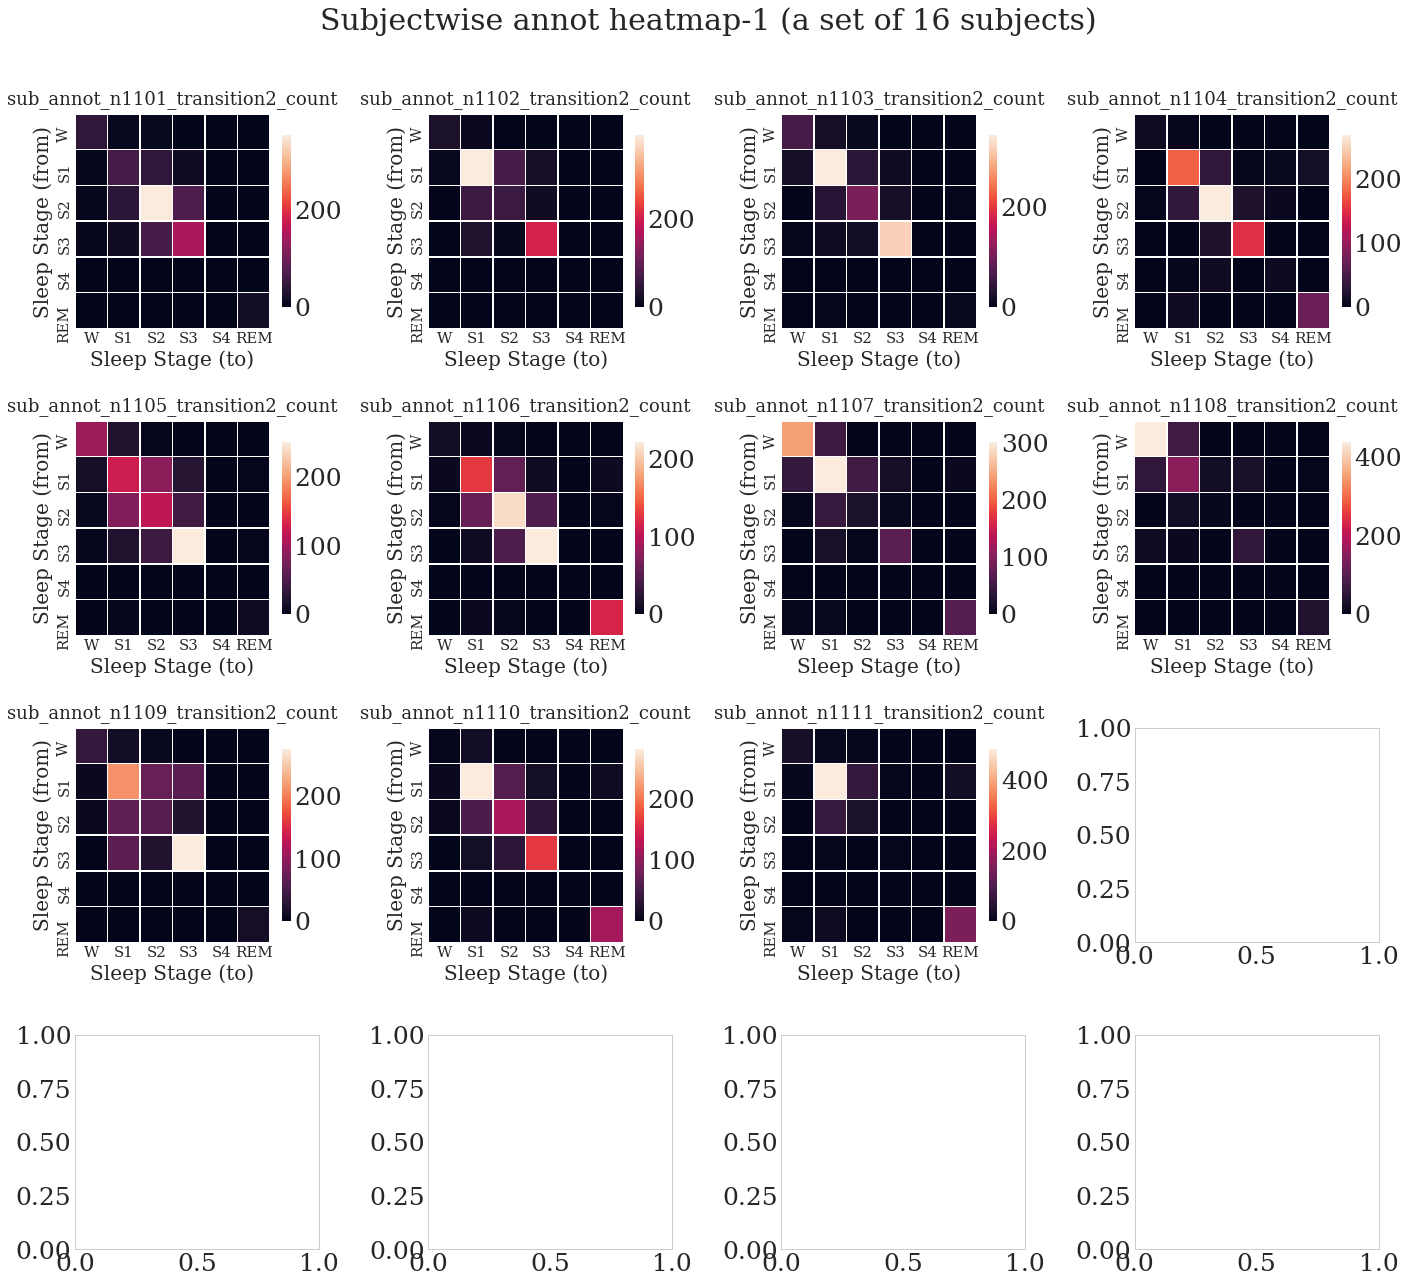

In [1493]:
draw_all_heatmaps(all_metrix_files, cat="n", annot_type=annot_type)

#### Draw heatmap for transition matric (count) - tran

In [1494]:
annot_type = "tran"
all_metrix_files = get_subjectwise_transition_count(annot_type = annot_type)
all_metrix_files

['annot', 'tran']
--- ['n', 'ins']
---a2 ['', '_sub', '_n', '_ins']
---a3 ['_n1101', '_n1102', '_n1103', '_n1104', '_n1105', '_n1106', '_n1107', '_n1108', '_n1109', '_n1110', '_n1111', '_ins1101', '_ins1102', '_ins1103', '_ins1104', '_ins1105', '_ins1106', '_ins1107', '_ins1108', '_ins1109', '_ins1110', '_ins1111']
+++++  0 11
---a4 ['_transition2_count.csv', '_transition2_proba.csv', '_transition2_dura.csv']
This:  ./Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_tran


['./Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_tran_n1101_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_tran_n1102_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_tran_n1103_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_tran_n1104_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_tran_n1105_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_tran_n1106_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_tran_n1107_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_tran_n1108_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_tran_n1109_transition2_count.csv',
 './Results/SDRC/STP_From_Same_Stages/Transition_Matrices/sub_tran_n1110_transition2_count.csv',
 './Results/SDRC/STP_From_Same

Drawing heatmap for index 0:11


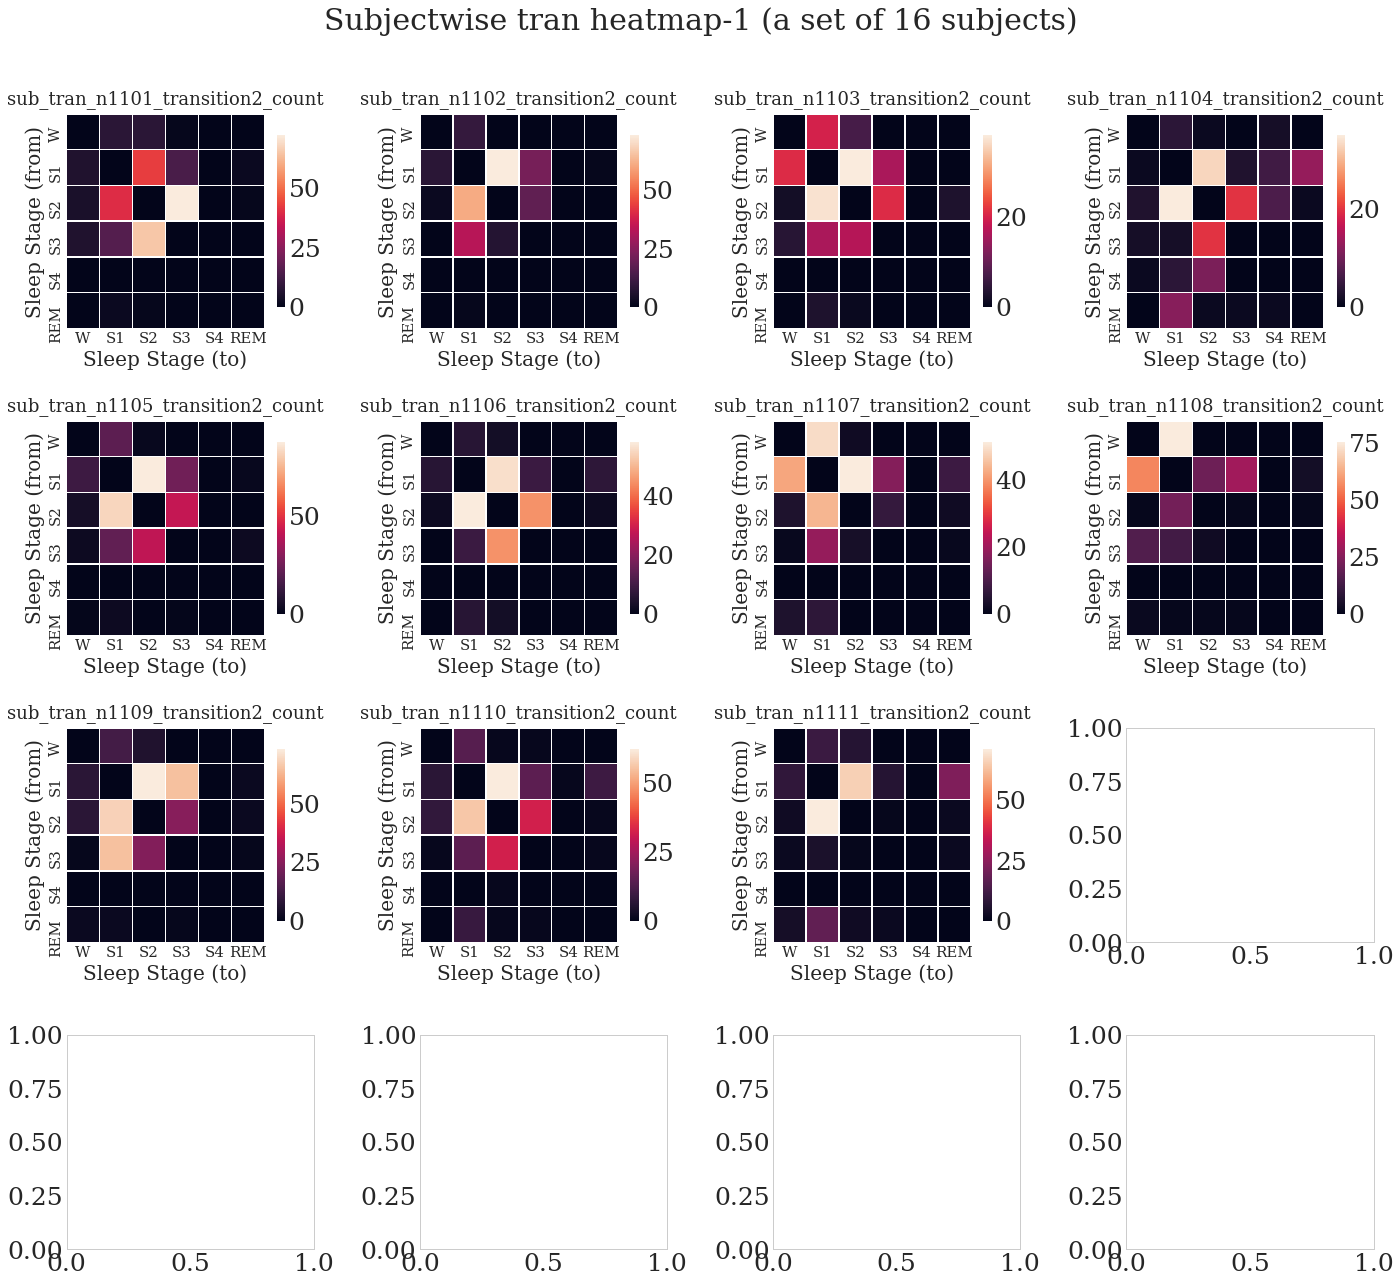

In [1495]:
draw_all_heatmaps(all_metrix_files, cat="n", annot_type=annot_type)

# Extras

In [ ]:
fig, axes = plt.subplots(4, 4)
slp_lbl = list(sleep_stage_labels_dict.keys())

for i, dat_file in enumerate(all_metrix_files):
    dat = pd.read_csv(dat_file)
    # print(dat.iloc[:, 1:].dtypes)
    data = dat.iloc[:, 1:].values 
    slp_lbl_y = dat.iloc[:, 0].values 
    x, y = (int)(i/4), i%4 
    # print(i, x, y, data)
    sns.heatmap(data, linewidth=0.5, ax=axes[x, y])
    axes[x, y].set_title( (dat_file.split("/")[-1]).split(".")[0] )
    axes[x, y].set_ylabel("Sleep Stage (from)")
    axes[x, y].set_xlabel("Sleep Stage (to)")
    axes[x, y].set_yticklabels(slp_lbl_y)
    #axes[x, y].set_yticklabels(slp_lbl)
    axes[x, y].set_xticklabels(slp_lbl) 
fig.suptitle(' Set a Single Main Title for All the Subplots', va='top', fontsize=20, y=1.0) 
fig.savefig(f"{result_directory}/Analytical_Graphs/n_subjectwise_heatmap.png") 
fig.savefig(f"{result_directory}/Analytical_Graphs/n_subjectwise_heatmap.pdf") 
plt.tight_layout(pad=2.0)
plt.show()

In [78]:
# fig.suptitle?

### Markov model for transition matrix

In [ ]:
!pip install networkx
!pip install graphviz
# !pip install pygraphviz

In [421]:
# modules from this repository
from markovchain import MarkovChain
plt.rcParams["figure.figsize"] = (25,20)

In [422]:
all_metrix_files

['./Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n1_transition2_count.csv',
 './Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n2_transition2_count.csv',
 './Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n3_transition2_count.csv',
 './Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n4_transition2_count.csv',
 './Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n5_transition2_count.csv',
 './Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n6_transition2_count.csv',
 './Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n7_transition2_count.csv',
 './Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n8_transition2_count.csv',
 './Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n9_transition2_count.csv',
 './Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n10_transition2_count.csv',
 './Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n11_transition2_count.csv',
 './Results/CAP_Sleep/Transition_Matrices/all_tran_sub_n12_transition2_count.csv',
 './Results/C

In [424]:
# plt.rcParams["figure.figsize"] = (20,6)
# plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams["figure.figsize"] = (25,20)
list(sleep_stage_names_dict.keys()), list(sleep_stage_labels_dict.keys())

(['W', 'S1', 'S2', 'S3', 'S4', 'R', 'MT'],
 ['W', 'S1', 'S2', 'S3', 'S4', 'REM', 'MT'])

In [426]:
# fig, axes = plt.subplots(4, 4)
# slp_lbl = list(sleep_stage_names_dict.keys())

# for i, dat_file in enumerate(all_metrix_files):
#     data = pd.read_csv(dat_file).values
#     x, y = (int)(i/4), i%4 
# #     print(i, x, y)
#     sns.heatmap(data, linewidth=0.5, ax=axes[x, y])
#     axes[x, y].set_title( (dat_file.split("/")[-1]).split(".")[0] )
#     axes[x, y].set_ylabel("Sleep Stage (from)")
#     axes[x, y].set_xlabel("Sleep Stage (to)")
#     axes[x, y].set_yticklabels(slp_lbl)
#     axes[x, y].set_xticklabels(slp_lbl) 
# fig.savefig(f"{result_directory}/Analytical_Graphs/n_subjectwise_heatmap.png") 
# fig.savefig(f"{result_directory}/Analytical_Graphs/n_subjectwise_heatmap.pdf") 
# plt.show()

In [433]:
plt.rcParams["figure.figsize"] = (5,4)
# plt.rcParams["figure.figsize"] = (25,20)

In [429]:
count_arr = pd.read_csv('./Results/Transition_Matrices/all_tran_sub_n1_transition_count.csv').values
count_arr

array([[ 0,  7,  0,  0,  0,  0,  0],
       [ 1,  0, 10,  0,  0,  0,  0],
       [ 4,  2,  0,  9,  0,  5,  3],
       [ 0,  0,  6,  0,  6,  0,  1],
       [ 2,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0],
       [ 0,  2,  2,  0,  0,  0,  0]], dtype=int64)

In [ ]:
mc = MarkovChain(count_arr, sleep_stage_labels) 
mc.draw("./all_annot_tDiagram_result_.png") 

In [434]:
proba_arr = pd.read_csv('./Results/Transition_Matrices/all_tran_sub_n1_transition_proba.csv').values
proba_arr

array([[0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.091, 0.   , 0.909, 0.   , 0.   , 0.   , 0.   ],
       [0.174, 0.087, 0.   , 0.391, 0.   , 0.217, 0.13 ],
       [0.   , 0.   , 0.462, 0.   , 0.462, 0.   , 0.077],
       [0.333, 0.   , 0.   , 0.667, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.5  , 0.5  , 0.   , 0.   , 0.   , 0.   ]])

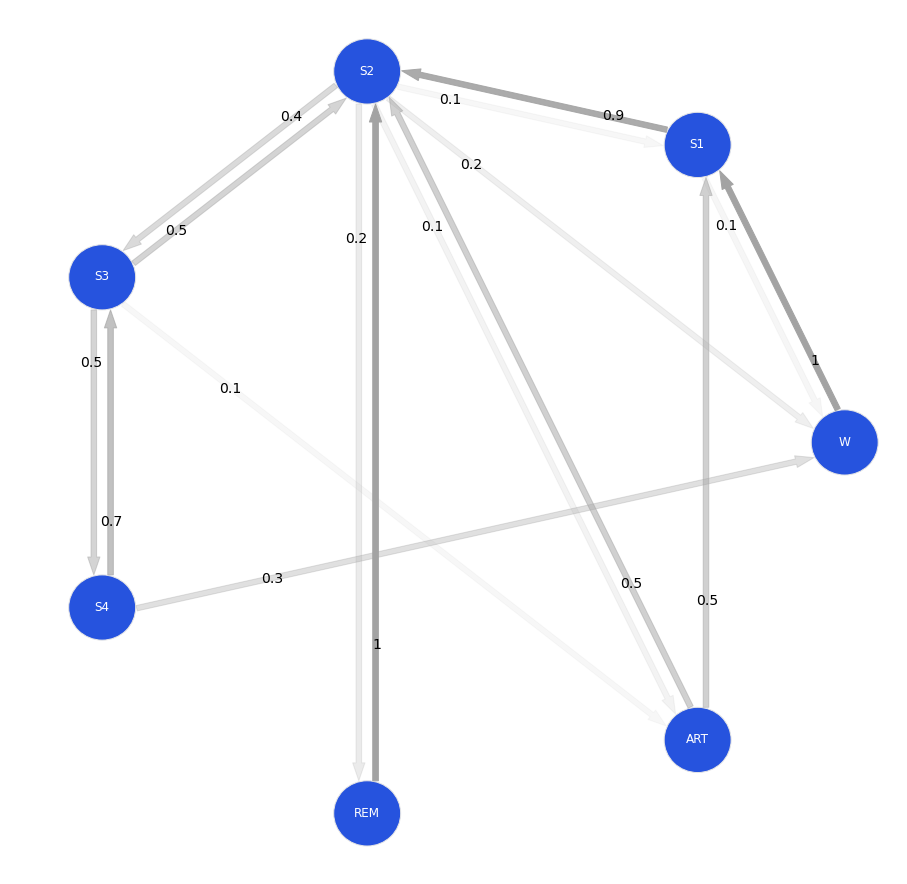

In [435]:
mc = MarkovChain(proba_arr, sleep_stage_labels) 
mc.draw("./all_annot_tDiagram_result_.png") 

### Visualise transition matrix - Network X

In [436]:
import networkx as nx

# create state space and initial state probabilities

states = ['sleeping', 'eating', 'pooping']
pi = [0.35, 0.35, 0.3]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

sleeping    0.35
eating      0.35
pooping     0.30
Name: states, dtype: float64
1.0


In [437]:
# create transition matrix
# equals transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.4, 0.2, 0.4]
q_df.loc[states[1]] = [0.45, 0.45, 0.1]
q_df.loc[states[2]] = [0.45, 0.25, .3]

print(q_df)

q = q_df.values
print('\n', q, q.shape, '\n')
print(q_df.sum(axis=1))

         sleeping eating pooping
sleeping      0.4    0.2     0.4
eating       0.45   0.45     0.1
pooping      0.45   0.25     0.3

 [[0.4 0.2 0.4]
 [0.45 0.45 0.1]
 [0.45 0.25 0.3]] (3, 3) 

sleeping    1.0
eating      1.0
pooping     1.0
dtype: float64


In [438]:
from pprint import pprint 

# create a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

{('eating', 'eating'): 0.45,
 ('eating', 'pooping'): 0.1,
 ('eating', 'sleeping'): 0.45,
 ('pooping', 'eating'): 0.25,
 ('pooping', 'pooping'): 0.3,
 ('pooping', 'sleeping'): 0.45,
 ('sleeping', 'eating'): 0.2,
 ('sleeping', 'pooping'): 0.4,
 ('sleeping', 'sleeping'): 0.4}


In [439]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
# G.add_nodes_from(states_)
G.add_nodes_from(edges_wts)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_markov.dot')

Nodes:
[('sleeping', 'sleeping'), ('eating', 'sleeping'), ('pooping', 'sleeping'), ('sleeping', 'eating'), ('eating', 'eating'), ('pooping', 'eating'), ('sleeping', 'pooping'), ('eating', 'pooping'), ('pooping', 'pooping')]

Edges:
OutMultiEdgeDataView([('sleeping', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('sleeping', 'eating', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'pooping', {'weight': 0.4, 'label': 0.4}), ('eating', 'sleeping', {'weight': 0.45, 'label': 0.45}), ('eating', 'eating', {'weight': 0.45, 'label': 0.45}), ('eating', 'pooping', {'weight': 0.1, 'label': 0.1}), ('pooping', 'sleeping', {'weight': 0.45, 'label': 0.45}), ('pooping', 'eating', {'weight': 0.25, 'label': 0.25}), ('pooping', 'pooping', {'weight': 0.3, 'label': 0.3})])


ModuleNotFoundError: No module named 'pydot'

In [440]:
# plt.rcParams["figure.figsize"] = (25,20)

plt.rcParams["figure.figsize"] = (10,6)

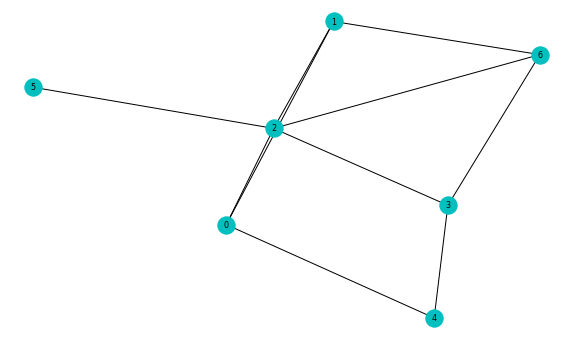

In [441]:
import networkx as nx

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

def read_graph():
    graph_adjacency_list = { }
    for line in open("input.txt"):
        line = map(int, line.rstrip("\t\r\n").split("\t"))
        graph_adjacency_list.update({ line[0]: { e: 1 for e in line[1:] } })

    return graph_adjacency_list

graph_data = count_arr #read_graph()
G = nx.Graph(graph_data)
nx.draw_networkx(G, with_labels = True, node_color = "c", edge_color = "k", font_size = 8)

plt.axis('off')
plt.draw()
plt.savefig("graph.pdf")

In [442]:
sleep_stage_labels_dict

{'W': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'REM': 5, 'MT': 6}

In [443]:
slp_stgs = list(sleep_stage_labels_dict.keys())
slp_stgs

['W', 'S1', 'S2', 'S3', 'S4', 'REM', 'MT']

In [444]:
tst_arr = pd.read_csv('./Results/Transition_Matrices/all_tran_sub_n1_transition_count.csv')
tst_arr.index = slp_stgs
tst_arr

W  S1  S2  S3  S4  REM  MT
W    0   7   0   0   0    0   0
S1   1   0  10   0   0    0   0
S2   4   2   0   9   0    5   3
S3   0   0   6   0   6    0   1
S4   2   0   0   4   0    0   0
REM  0   0   5   0   0    0   0
MT   0   2   2   0   0    0   0

In [445]:
tst_arr.at['W', 'S1']

7

In [446]:
E = []
for i in slp_stgs:
    for j in slp_stgs:
        # print(tst_arr.at[i, j])
        if tst_arr.at[i, j]>0:
            E.append((i, j, tst_arr.at[i, j]))
        
E

[('W', 'S1', 7),
 ('S1', 'W', 1),
 ('S1', 'S2', 10),
 ('S2', 'W', 4),
 ('S2', 'S1', 2),
 ('S2', 'S3', 9),
 ('S2', 'REM', 5),
 ('S2', 'MT', 3),
 ('S3', 'S2', 6),
 ('S3', 'S4', 6),
 ('S3', 'MT', 1),
 ('S4', 'W', 2),
 ('S4', 'S3', 4),
 ('REM', 'S2', 5),
 ('MT', 'S1', 2),
 ('MT', 'S2', 2)]

In [447]:
V = slp_stgs.copy()
V

['W', 'S1', 'S2', 'S3', 'S4', 'REM', 'MT']

In [448]:
# E = [('A', 'B', 6), ('B', 'C', 7), ('C', 'D', 8), ('D','E', 4), ('E', 'F', 9), ('F','A', 6)]
E

[('W', 'S1', 7),
 ('S1', 'W', 1),
 ('S1', 'S2', 10),
 ('S2', 'W', 4),
 ('S2', 'S1', 2),
 ('S2', 'S3', 9),
 ('S2', 'REM', 5),
 ('S2', 'MT', 3),
 ('S3', 'S2', 6),
 ('S3', 'S4', 6),
 ('S3', 'MT', 1),
 ('S4', 'W', 2),
 ('S4', 'S3', 4),
 ('REM', 'S2', 5),
 ('MT', 'S1', 2),
 ('MT', 'S2', 2)]

In [449]:
G =  nx.MultiDiGraph() 

In [450]:
G.add_nodes_from(V)

In [451]:
G.add_weighted_edges_from(E)

In [452]:
G.nodes

NodeView(('W', 'S1', 'S2', 'S3', 'S4', 'REM', 'MT'))

In [453]:
G.edges

OutMultiEdgeView([('W', 'S1', 0), ('S1', 'W', 0), ('S1', 'S2', 0), ('S2', 'W', 0), ('S2', 'S1', 0), ('S2', 'S3', 0), ('S2', 'REM', 0), ('S2', 'MT', 0), ('S3', 'S2', 0), ('S3', 'S4', 0), ('S3', 'MT', 0), ('S4', 'W', 0), ('S4', 'S3', 0), ('REM', 'S2', 0), ('MT', 'S1', 0), ('MT', 'S2', 0)])

In [454]:
# G.__dict__
# nx.draw_networkx_edge_labels?

In [455]:
pos = {'W':[1,1], 'S1':[2,2], 'S2':[3,1], 'S3':[3, 2], 'S4':[3,3], 'MT':[1,3], 'REM':[4,2]}

In [456]:
weight = nx.get_edge_attributes(G, 'weight')
weight

{('W', 'S1', 0): 7,
 ('S1', 'W', 0): 1,
 ('S1', 'S2', 0): 10,
 ('S2', 'W', 0): 4,
 ('S2', 'S1', 0): 2,
 ('S2', 'S3', 0): 9,
 ('S2', 'REM', 0): 5,
 ('S2', 'MT', 0): 3,
 ('S3', 'S2', 0): 6,
 ('S3', 'S4', 0): 6,
 ('S3', 'MT', 0): 1,
 ('S4', 'W', 0): 2,
 ('S4', 'S3', 0): 4,
 ('REM', 'S2', 0): 5,
 ('MT', 'S1', 0): 2,
 ('MT', 'S2', 0): 2}

In [457]:
weight = {}
for u, v, keys, data in G.edges(keys=True, data=True):
    if 'weight' in data:
        if (u, v) in weight:
            weight[(u, v)].append(data['weight'])
        else:
            weight[(v, u)] = [data['weight']]
weight

{('S1', 'W'): [7, 1],
 ('S2', 'S1'): [10, 2],
 ('W', 'S2'): [4],
 ('S3', 'S2'): [9, 6],
 ('REM', 'S2'): [5, 5],
 ('MT', 'S2'): [3, 2],
 ('S4', 'S3'): [6, 4],
 ('MT', 'S3'): [1],
 ('W', 'S4'): [2],
 ('S1', 'MT'): [2]}

In [458]:
arc_size = 0.1

{('S1', 'W'): Text(1.5, 1.5, '[7, 1]'),
 ('S2', 'S1'): Text(2.5, 1.5, '[10, 2]'),
 ('W', 'S2'): Text(2.0, 1.0, '[4]'),
 ('S3', 'S2'): Text(3.0, 1.5, '[9, 6]'),
 ('REM', 'S2'): Text(3.5, 1.5, '[5, 5]'),
 ('MT', 'S2'): Text(2.0, 2.0, '[3, 2]'),
 ('S4', 'S3'): Text(3.0, 2.5, '[6, 4]'),
 ('MT', 'S3'): Text(2.0, 2.5, '[1]'),
 ('W', 'S4'): Text(2.0, 2.0, '[2]'),
 ('S1', 'MT'): Text(1.5, 2.5, '[2]')}

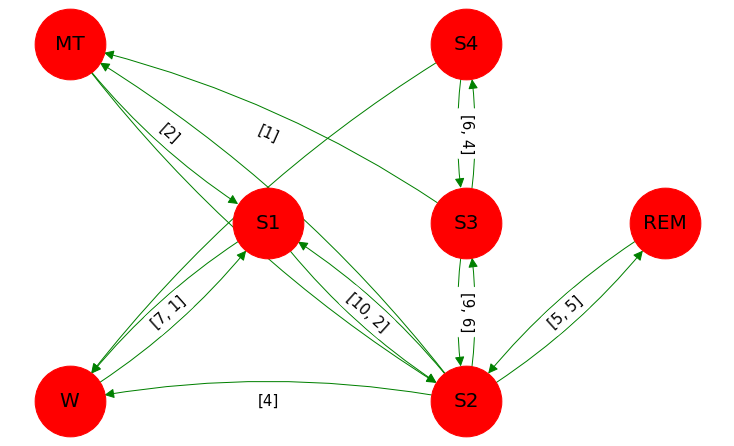

In [459]:
nx.draw(G, pos=pos, with_labels=True, node_size=5000, node_color='r', edge_color='g', arrowsize=20, font_size=20, connectionstyle=f"arc3,rad={arc_size}")
# nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G), edge_labels=weight, font_size=15) #nx.spring_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight, font_size=15) #nx.spring_layout(G)

In [460]:
nx.draw_networkx_nodes?

Signature:
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=None,
    node_size=300,
    node_color='#1f78b4',
    node_shape='o',
    alpha=None,
    cmap=None,
    vmin=None,
    vmax=None,
    ax=None,
    linewidths=None,
    edgecolors=None,
    label=None,
)
Docstring:
Draw the nodes of the graph G.

This draws only the nodes of the graph G.

Parameters
----------
G : graph
   A networkx graph

pos : dictionary
   A dictionary with nodes as keys and positions as values.
   Positions should be sequences of length 2.

ax : Matplotlib Axes object, optional
   Draw the graph in the specified Matplotlib axes.

nodelist : list, optional
   Draw only specified nodes (default G.nodes())

node_size : scalar or array
   Size of nodes (default=300).  If an array is specified it must be the
   same length as nodelist.

node_color : color or array of colors (default='#1f78b4')
   Node color. Can be a single color or a sequence of colors with the same
   length as nodelist. Color can be st

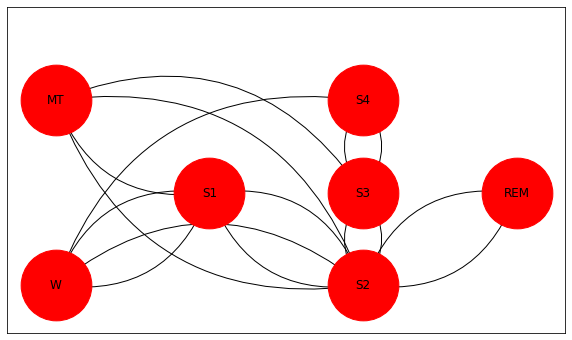

In [461]:
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=5000, node_color='#ff0000')
nx.draw_networkx_labels(G, pos, ax=ax)
nx.draw_networkx_edges(G, pos, connectionstyle="arc3,rad=0.4") 

TypeError: draw_networkx_edges() got an unexpected keyword argument 'with_labels'

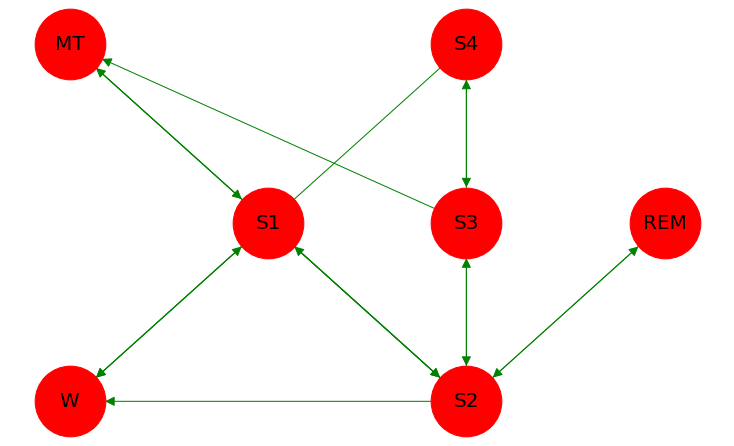

In [462]:
nx.draw(G, pos=pos, with_labels=True,node_size=5000, node_color='r', edge_color='g', arrowsize=20, font_size=20)
# nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G), edge_labels=weight, font_size=15) #nx.spring_layout(G)
# nx.draw_networkx_edge_labels(G, pos, edge_labels=weight, font_size=15) #nx.spring_layout(G)


curved_edges = G.edges# [edge for edge in G.edges() if reversed(edge) in G.edges()]
# straight_edges = list(set(G.edges()) - set(curved_edges))
# nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
arc_rad = 0.25
nx.draw_networkx_edges(G, pos, with_labels=True, connectionstyle="arc3,rad=0.4")

C:\Users\aliem\.conda\envs\MyPython37Work\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


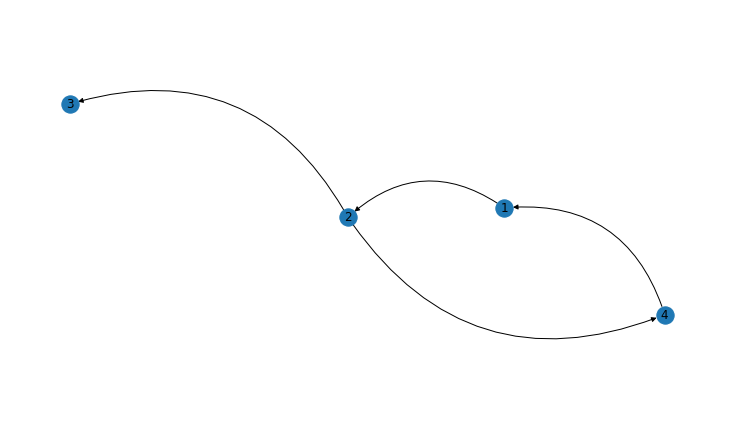

In [463]:
G = nx.DiGraph()

pos = nx.spring_layout(G)
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (2, 4), (2, 3), (4, 1)])

nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.4")

plt.show()


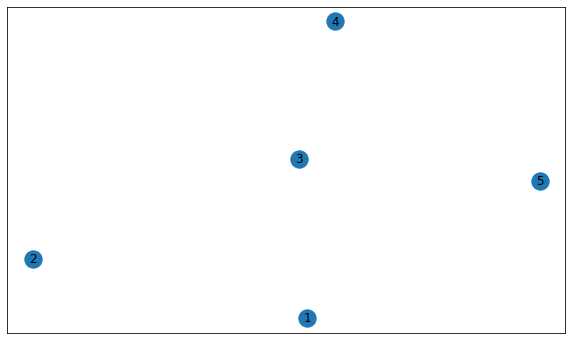

In [464]:
G = nx.DiGraph()
edge_list = [(1,2,{'w':'A1'}),(2,1,{'w':'A2'}),(2,3,{'w':'B'}),(3,1,{'w':'C'}),
             (3,4,{'w':'D1'}),(4,3,{'w':'D2'}),(1,5,{'w':'E1'}),(5,1,{'w':'E2'}),
             (3,5,{'w':'F'}),(5,4,{'w':'G'})]
G.add_edges_from(edge_list)
pos=nx.spring_layout(G,seed=5)
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
fig.savefig("1.png", bbox_inches='tight',pad_inches=0)

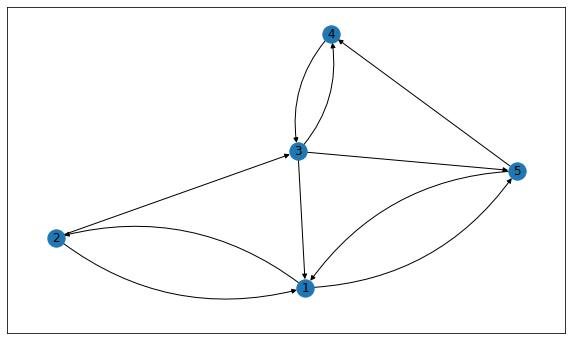

In [465]:
G = nx.DiGraph()
edge_list = [(1,2,{'w':'A1'}),(2,1,{'w':'A2'}),(2,3,{'w':'B'}),(3,1,{'w':'C'}),
             (3,4,{'w':'D1'}),(4,3,{'w':'D2'}),(1,5,{'w':'E1'}),(5,1,{'w':'E2'}),
             (3,5,{'w':'F'}),(5,4,{'w':'G'})]
G.add_edges_from(edge_list)
pos=nx.spring_layout(G,seed=5)
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)

curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
arc_rad = 0.25
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')
fig.savefig("2.png", bbox_inches='tight',pad_inches=0)

### Visualise transition matrix - Example

In [ ]:
!pip install networkx
!pip install graphviz
# !pip install pygraphviz

In [ ]:
# !pip install networkx
# !pip install graphviz
# !pip install pygraphviz

# modules from this repository
from markovchain import MarkovChain

In [469]:
directory, result_directory

('E:/aliem/CAP_Sleep_Dataset', './Results/CAP_Sleep')

In [471]:
trans_file_path = f"{result_directory}/Transition_Matrices/all_annot_transition{tran_step}"
count, proba, dura = pd.read_csv(f"{trans_file_path}_count.csv"), pd.read_csv(f"{trans_file_path}_proba.csv"), pd.read_csv(f"{trans_file_path}_dura.csv") 


In [481]:
proba

From         W        S1        S2        S3        S4       REM        MT
0    W  0.946284  0.042474  0.010326  0.000305  0.000051  0.000560  0.000000
1   S1  0.035518  0.824465  0.130417  0.000274  0.000274  0.007131  0.001920
2   S2  0.006527  0.003403  0.966234  0.013920  0.000044  0.007407  0.002464
3   S3  0.002401  0.000612  0.026087  0.938974  0.028865  0.000377  0.002684
4   S4  0.003315  0.000889  0.004852  0.012574  0.974609  0.000202  0.003558
5  REM  0.007238  0.006137  0.016470  0.000157  0.000000  0.969420  0.000577
6   MT  0.213720  0.160950  0.422164  0.065963  0.023747  0.005277  0.108179

In [482]:
sleep_stage_labels

['W', 'S1', 'S2', 'S3', 'S4', 'REM', 'ART']

In [483]:
proba_arr = proba.iloc[:, 1:].values
# count_arr = proba.values
proba_arr

array([[0.946, 0.042, 0.01 , 0.   , 0.   , 0.001, 0.   ],
       [0.036, 0.824, 0.13 , 0.   , 0.   , 0.007, 0.002],
       [0.007, 0.003, 0.966, 0.014, 0.   , 0.007, 0.002],
       [0.002, 0.001, 0.026, 0.939, 0.029, 0.   , 0.003],
       [0.003, 0.001, 0.005, 0.013, 0.975, 0.   , 0.004],
       [0.007, 0.006, 0.016, 0.   , 0.   , 0.969, 0.001],
       [0.214, 0.161, 0.422, 0.066, 0.024, 0.005, 0.108]])

C:\Users\aliem\Desktop\aliem\My Research\HML_IHC_Sleep_Data_Analysis\markovchain.py:228: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


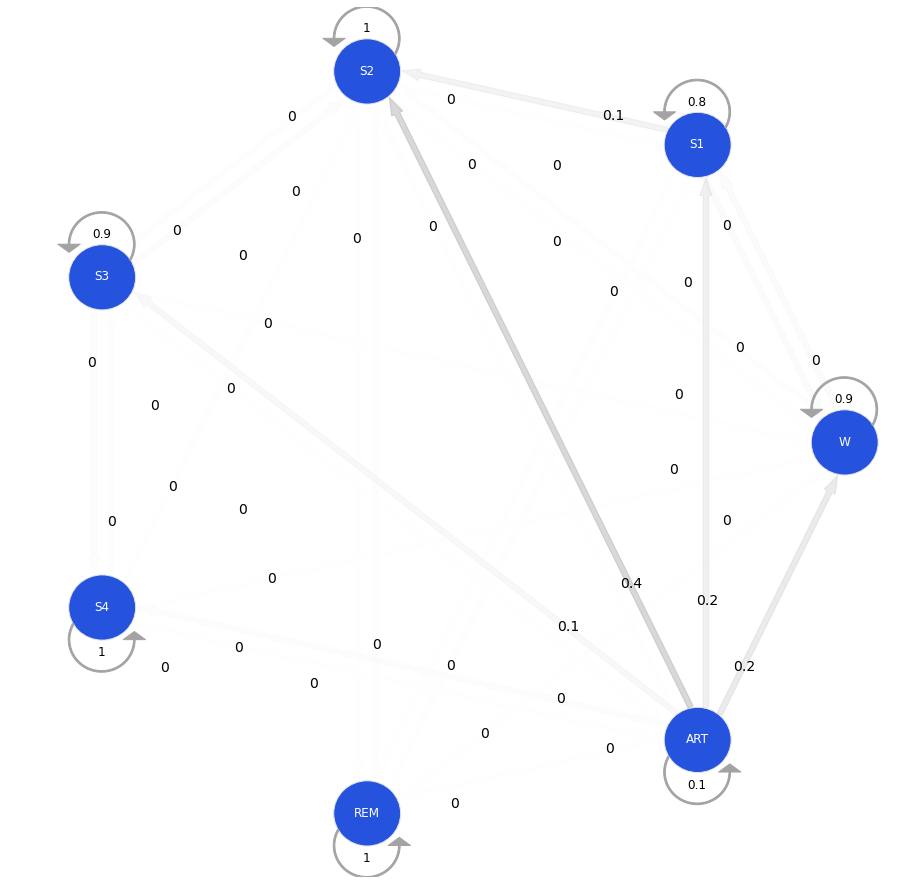

In [492]:
mc = MarkovChain(proba_arr, sleep_stage_labels)
mc.draw(f"{result_directory}/all_annot_tDiagram.png")

In [487]:
trans_file_path = f"{result_directory}/Transition_Matrices/all_tran_transition{tran_step}"
count2, proba2, dura2 = pd.read_csv(f"{trans_file_path}_count.csv"), pd.read_csv(f"{trans_file_path}_proba.csv"), pd.read_csv(f"{trans_file_path}_dura.csv") 


In [493]:
proba2

From         W        S1        S2        S3        S4       REM        MT
0    W  0.079337  0.727986  0.176983  0.005231  0.000872  0.009590  0.000000
1   S1  0.202344  0.000000  0.742969  0.001563  0.001563  0.040625  0.010937
2   S2  0.192960  0.100826  0.000000  0.412429  0.001304  0.219470  0.073012
3   S3  0.039352  0.010031  0.427469  0.000000  0.472994  0.006173  0.043981
4   S4  0.130573  0.035032  0.191083  0.495223  0.000000  0.007962  0.140127
5  REM  0.236707  0.200686  0.538593  0.005146  0.000000  0.000000  0.018868
6   MT  0.239645  0.180473  0.473373  0.073964  0.026627  0.005917  0.000000

In [494]:
sleep_stage_labels

['W', 'S1', 'S2', 'S3', 'S4', 'REM', 'ART']

In [495]:
proba_arr2 = proba2.iloc[:, 1:].values
# proba_arr2 = proba2.values
proba_arr2

array([[0.079, 0.728, 0.177, 0.005, 0.001, 0.01 , 0.   ],
       [0.202, 0.   , 0.743, 0.002, 0.002, 0.041, 0.011],
       [0.193, 0.101, 0.   , 0.412, 0.001, 0.219, 0.073],
       [0.039, 0.01 , 0.427, 0.   , 0.473, 0.006, 0.044],
       [0.131, 0.035, 0.191, 0.495, 0.   , 0.008, 0.14 ],
       [0.237, 0.201, 0.539, 0.005, 0.   , 0.   , 0.019],
       [0.24 , 0.18 , 0.473, 0.074, 0.027, 0.006, 0.   ]])

C:\Users\aliem\Desktop\aliem\My Research\HML_IHC_Sleep_Data_Analysis\markovchain.py:228: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


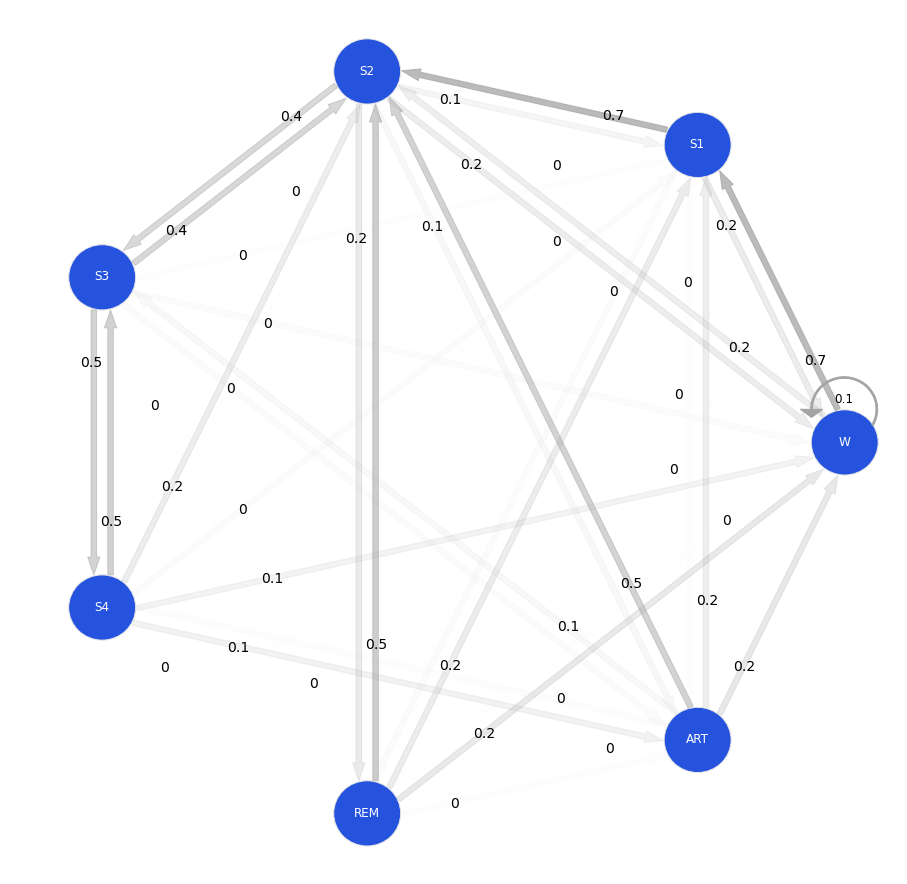

In [496]:
mc = MarkovChain(proba_arr2, sleep_stage_labels)
mc.draw("./all_tran_tDiagram_result_.png")

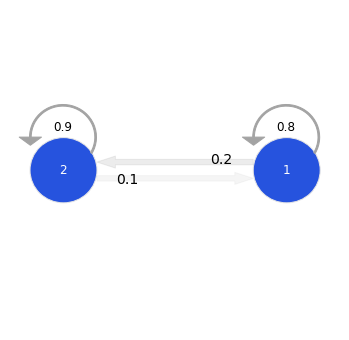

In [497]:
P = np.array([[0.8, 0.2], [0.1, 0.9]]) # Transition matrix
mc = MarkovChain(P, ['1', '2'])
mc.draw("./markov-chain-two-states.png")
# mc.draw("./markov-chain-two-states.pdf")

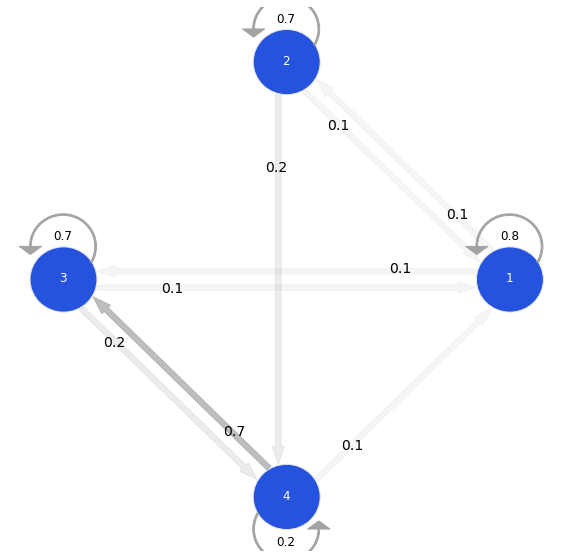

In [498]:
P = np.array([
    [0.8, 0.1, 0.1, 0.0], 
    [0.1, 0.7, 0.0, 0.2],
    [0.1, 0.0, 0.7, 0.2],
    [0.1, 0.0, 0.7, 0.2]
])
mc = MarkovChain(P, ['1', '2', '3', '4'])
mc.draw("./markov-chain-four-states.png")

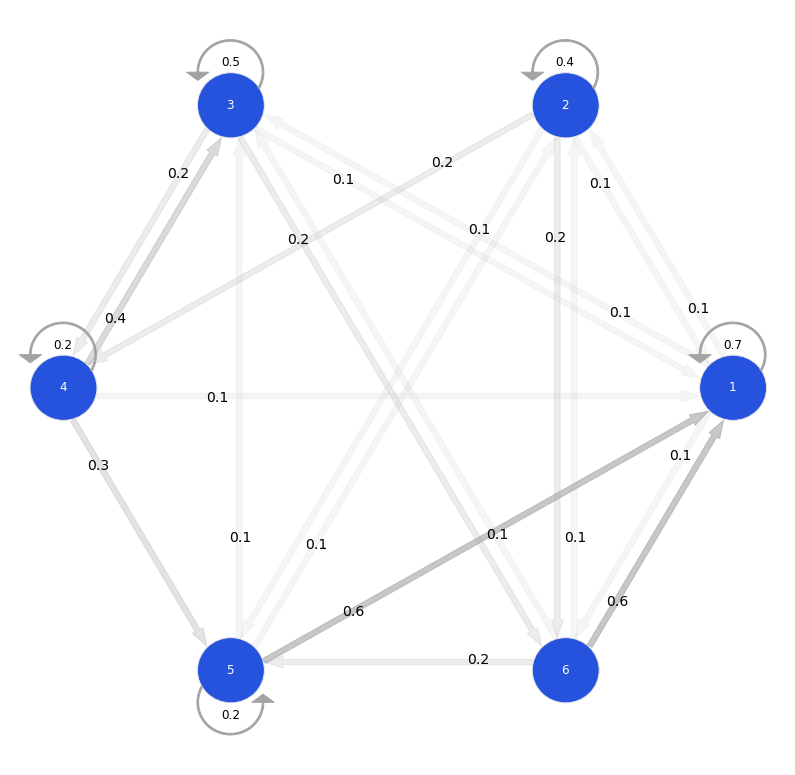

In [499]:
P = np.array([
    [0.7, 0.1, 0.1, 0.0, 0.0, 0.1], 
    [0.1, 0.4, 0.0, 0.2, 0.1, 0.2],
    [0.1, 0.0, 0.5, 0.2, 0.0, 0.2],
    [0.1, 0.0, 0.4, 0.2, 0.3, 0.0],
    [0.6, 0.1, 0.1, 0.0, 0.2, 0.0], 
    [0.6, 0.1, 0.1, 0.0, 0.2, 0.0], 
])
mc = MarkovChain(P, ['1', '2', '3', '4', '5', '6'])
mc.draw("./markov-chain-six-states.png")

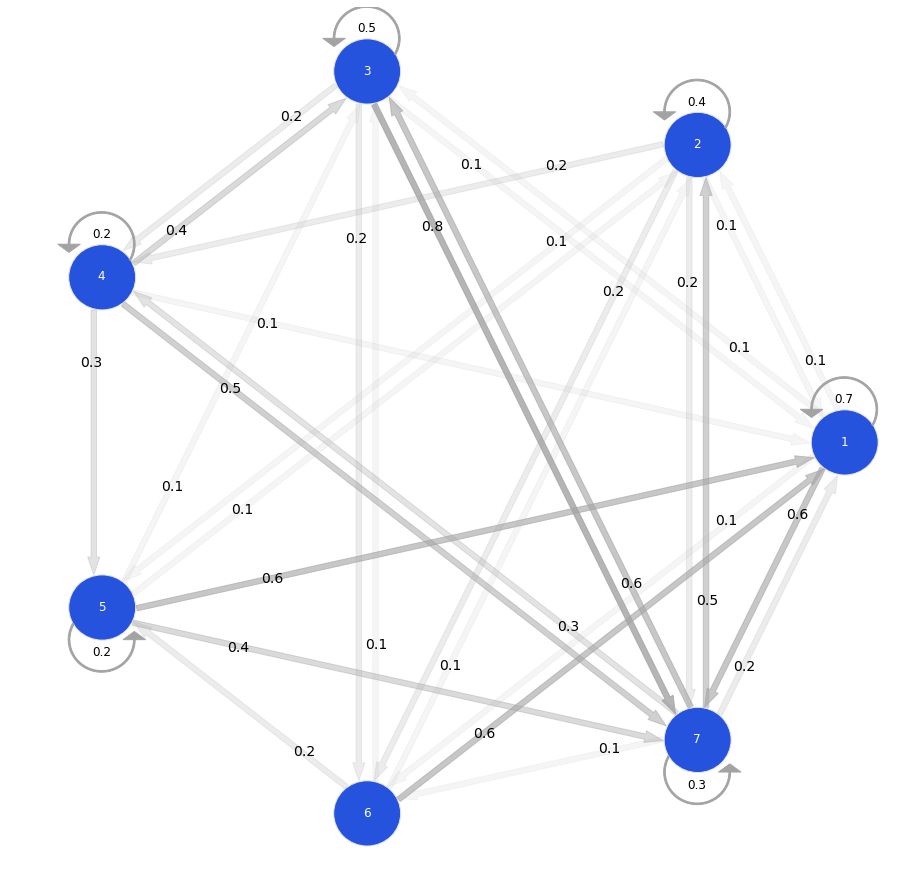

In [500]:
P = np.array([
    [0.7, 0.1, 0.1, 0.0, 0.0, 0.1, 0.6], 
    [0.1, 0.4, 0.0, 0.2, 0.1, 0.2, 0.2],
    [0.1, 0.0, 0.5, 0.2, 0.0, 0.2, 0.8],
    [0.1, 0.0, 0.4, 0.2, 0.3, 0.0, 0.5],
    [0.6, 0.1, 0.1, 0.0, 0.2, 0.0, 0.4], 
    [0.6, 0.1, 0.1, 0.0, 0.2, 0.0, 0.0], 
    [0.2, 0.5, 0.6, 0.3, 0.0, 0.1, 0.3], 
])
mc = MarkovChain(P, ['1', '2', '3', '4', '5', '6', '7'])
mc.draw("./markov-chain-seven-states.png")

## Rough

In [163]:
directory = result_directory
directory, f"{directory}/Demography_Details.csv"

('./Results/CAP_Sleep', './Results/CAP_Sleep/Demography_Details.csv')

In [164]:
df = pd.read_csv(f"{directory}/Demography_Details.csv")
df

File_Name Category  Subject_ID Gender  Age
0       brux1     brux           1      M   34
1       brux2     brux           2      M   23
2        sdb1      sdb           1      M   65
3        sdb2      sdb           2      M   77
4        sdb3      sdb           3      M   78
..        ...      ...         ...    ...  ...
103       n12        n          12      M   29
104       n13        n          13      F   24
105       n14        n          14      F   35
106       n15        n          15      M   34
107       n16        n          16      F   41

[108 rows x 5 columns]

In [ ]:
df["File_Name1"] = df["Category"].str.cat(df["Subject_ID"].astype(str), sep = "")
df.insert(loc=0, column="File_Name", value=df["File_Name1"].values.tolist())
df = df.drop("File_Name1", axis=1)
df

In [ ]:
df.dtypes

In [ ]:
df['Category'] = df['Category'].apply(str.lower)
df

In [ ]:
df[["dummy1", "Disease_Name1", "Subject_ID1", "dummy2"]] = df['Category_Short'].str.split(r"([a-z]+)([0-9]+)", expand=True)
# df[["Disease_Name", "Subject_ID"]] = df['Pat_ID'].split(r"([a-z]+)([0-9]+)", expand=True)
# df = df.drop('Pat_ID', axis=1)
# df = df.drop("dummy", axis=1)
df = df.drop(['Category', "dummy1", "dummy2"], axis=1)
df

In [ ]:
df.insert(loc=0, column="Subject_ID", value=df["Subject_ID1"].values.tolist())
df = df.drop("Subject_ID1", axis=1)
df.insert(loc=0, column="Category", value=df["Disease_Name1"].values.tolist())
df = df.drop("Disease_Name1", axis=1)
df

In [165]:
f"{directory}/Demography_Details.csv"

'./Results/CAP_Sleep/Demography_Details.csv'

In [ ]:
df.to_csv(f"{directory}/Demography_Details.csv", index=False)

## Extra

In [ ]:
import matplotlib.pyplot as plt

from visbrain.io import write_fig_hyp, read_hypno, download_file

In [ ]:
grid = True     # display the grid
ascolor = True  # plt as color or in black and white
file = None     # Name of the file to be saved example : 'myfile.png'

In [ ]:
path_to_hypno = download_file("s101_jbe.hyp", astype='example_data')
data, sf = read_hypno(path_to_hypno)

In [ ]:
write_fig_hyp(data, sf, grid=grid, ascolor=ascolor, file=file)
plt.show()

In [ ]:
import yasa
import numpy as np
import matplotlib.pyplot as plt
hypno = np.loadtxt("https://github.com/raphaelvallat/yasa/raw/master/notebooks/data_full_6hrs_100Hz_hypno_30s.txt")
fig, ax = plt.subplots(1, 1, figsize=(7, 3), constrained_layout=True)
ax = yasa.plot_hypnogram(hypno, fill_color="gainsboro", ax=ax)